In [256]:
import os

# Set the environment variable
os.environ['DATA_DIRECTORY'] = '/Users/liamk/research-project-erc20-governance/data'

# Now you can access it
path = os.environ['DATA_DIRECTORY']
print(f"The data directory is set to: {path}")

The data directory is set to: /Users/liamk/research-project-erc20-governance/data


In [257]:
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()  

# Set the base data directory path from environment variable
data_directory = os.environ.get('DATA_DIRECTORY')

# Verify if the DATA_DIRECTORY environment variable is set
if not data_directory:
    raise EnvironmentError("DATA_DIRECTORY environment variable is not set.")

# Define file paths
snapshot_file_path = os.path.join(data_directory, 'snapshot_selection.csv')
token_file_path = os.path.join(data_directory, 'final_token_selection.csv')

# Check if the files exist
if not os.path.exists(snapshot_file_path):
    print(f"File does not exist: {snapshot_file_path}")
else:
    print(f"File exists: {snapshot_file_path}")

if not os.path.exists(token_file_path):
    print(f"File does not exist: {token_file_path}")
else:
    print(f"File exists: {token_file_path}")

# Read the snapshot selection CSV file
try:
    df_snapshots = pd.read_csv(snapshot_file_path)
    df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
    print("Snapshot selection file loaded successfully. Here are the first few rows:")
    print(df_snapshots.head())
except Exception as e:
    print(f"Error reading snapshot selection file: {e}")

# Read the final token selection CSV file
try:
    df_tokens = pd.read_csv(token_file_path)
    print("Final token selection file loaded successfully. Here are the first few rows:")
    print(df_tokens.head())
except Exception as e:
    print(f"Error reading final token selection file: {e}")

# Convert DataFrame to a dictionary where keys are addresses and values are symbols
try:
    address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
    print("Address to symbol dictionary created successfully.")
    print(list(address_to_symbol.items())[:5])  # Print the first 5 items
except Exception as e:
    print(f"Error creating address to symbol dictionary: {e}")

# Known burner addresses
known_burner_addresses = [
    '0x0000000000000000000000000000000000000000',
    '0x0000000000000000000000000000000000000001',
    '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003',
    '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005',
    '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007',
    '0x000000000000000000000000000000000000dead'
]

print("Known burner addresses list:")
print(known_burner_addresses)

File exists: /Users/liamk/research-project-erc20-governance/data/snapshot_selection.csv
File exists: /Users/liamk/research-project-erc20-governance/data/final_token_selection.csv
Snapshot selection file loaded successfully. Here are the first few rows:
   Nr.  Block Height       Date
0    1       7962629 2019-06-15
1    2       8155117 2019-07-15
2    3       8354625 2019-08-15
3    4       8553607 2019-09-15
4    5       8745378 2019-10-15
Final token selection file loaded successfully. Here are the first few rows:
      coingecko_id     name    VL    MC  \
0          uniswap  Uniswap  True  True   
1             aave     Aave  True  True   
2         lido-dao     Lido  True  True   
3            maker    Maker  True  True   
4  curve-dao-token    Curve  True  True   

                                      address symbol  
0  0x1f9840a85d5af5bf1d1762f925bdaddc4201f984    UNI  
1  0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9   AAVE  
2  0x5a98fcbea516cf06857215779fd812ca3bef1b32    LDO  

In [258]:
import sys

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.analysis.clique_analysis import * 
from src.visualisations.wallet_network_projections_visualisations import * 

In [259]:
import networkx as nx
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory directly to the local folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Print the loaded graphs for verification
print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

In [260]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import pandas as pd
import numpy as np 
from src.utilities.metrics_and_tests import jaccard_similarity


def load_token_graphs_from_snapshots(df_snapshots, input_directory):
    """
    Load graphs from the given snapshots and store them in a dictionary.

    Parameters:
    df_snapshots (pd.DataFrame): DataFrame containing snapshot information with 'Block Height' and 'Date' columns.
    path (str): Base directory path where the graph files are located.

    Returns:
    dict: A dictionary containing loaded graphs with snapshot as the key.
    dict: A dictionary containing dates with snapshot as the key.
    """
    
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_token_projection_graph_{snapshot}.graphml")
        
        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
        else:
            print(f"Graph file for snapshot {snapshot} does not exist.")
    
    return graphs, dates

def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    """
    Load graphs from the given snapshots and store them in a dictionary.

    Parameters:
    df_snapshots (pd.DataFrame): DataFrame containing snapshot information with 'Block Height' and 'Date' columns.
    path (str): Base directory path where the graph files are located.

    Returns:
    dict: A dictionary containing loaded graphs with snapshot as the key.
    dict: A dictionary containing dates with snapshot as the key.
    """
    
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
        else:
            print(f"Graph file for snapshot {snapshot} does not exist.")
    
    return graphs, dates


def calculate_similarity_matrix(graphs):
    """
    Calculate the Jaccard Similarity matrix for a dictionary of graphs.

    Parameters:
    graphs (dict): A dictionary of graphs with snapshots as keys.

    Returns:
    np.ndarray: A 2D numpy array representing the similarity matrix.
    list: A sorted list of snapshot keys.
    """
    snapshot_list = sorted(graphs.keys())
    similarity_matrix = np.zeros((len(snapshot_list), len(snapshot_list)))

    for i, snapshot1 in enumerate(snapshot_list):
        for j, snapshot2 in enumerate(snapshot_list):
            if i <= j:
                similarity = jaccard_similarity(graphs[snapshot1], graphs[snapshot2])
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity  # Symmetric matrix

    return similarity_matrix, snapshot_list


def visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory, layout=nx.kamada_kawai_layout):
    # Define the grid size
    rows, cols = 3, 6  # Adjust based on the number of graphs
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to iterate easily
    
    for ax, (snapshot, graph) in zip(axes, graphs.items()):
        # Relabel nodes with symbols using the mapping
        relabeled_graph = nx.relabel_nodes(graph, address_to_symbol)
        
        # Compute layout
        pos = layout(relabeled_graph)  
        
        # Draw the graph with relabeled nodes
        nx.draw(relabeled_graph, pos, ax=ax, with_labels=False, node_size=50, node_color='skyblue', edge_color='gray', font_size=8)
        ax.set_title(dates[snapshot], fontsize=10)
        ax.set_axis_off()  # Hide axis for clarity
        
        # Draw a rectangle around the plot area
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)
        ax.add_patch(rect)

    # Turn off any unused subplots
    for i in range(len(graphs), len(axes)):
        axes[i].set_axis_off()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing to accommodate title if necessary
    
    # Save the figure
    fig.suptitle('Validated Wallet Projections Over Time', fontsize=16)
    plt.savefig(os.path.join(output_directory, "wallet_projection_grid.png"), format='png', dpi=300)
    plt.show()
    

def plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory):
    """
    Plot a heatmap of the Jaccard Similarity matrix.

    Parameters:
    similarity_matrix (np.ndarray): A 2D numpy array representing the similarity matrix.
    snapshot_list (list): A sorted list of snapshot keys.
    dates (dict): A dictionary of dates with snapshots as keys.
    """
    fig, ax = plt.subplots(figsize=(12, 10))  # Adjusted size to better fit more labels
    cax = ax.matshow(similarity_matrix, interpolation='nearest', cmap='coolwarm')
    fig.colorbar(cax)

    # Set the ticks and labels with dates
    date_labels = [dates[snapshot] for snapshot in snapshot_list]
    ax.set_xticks(range(len(snapshot_list)))
    ax.set_xticklabels(date_labels, rotation=90)  # Rotate for better readability
    ax.set_yticks(range(len(snapshot_list)))
    ax.set_yticklabels(date_labels)

    ax.xaxis.set_ticks_position('bottom')  # X-axis labels on the bottom

    # Set title with padding
    ax.set_title('Jaccard Similarity Heatmap of Graph Snapshots', size=16, pad=20)

    ax.set_xlabel('Snapshot Date')
    ax.set_ylabel('Snapshot Date')
    
    plt.savefig(os.path.join(output_directory, "jaccard_similarity.png"), format='png', dpi=300)

    plt.show()

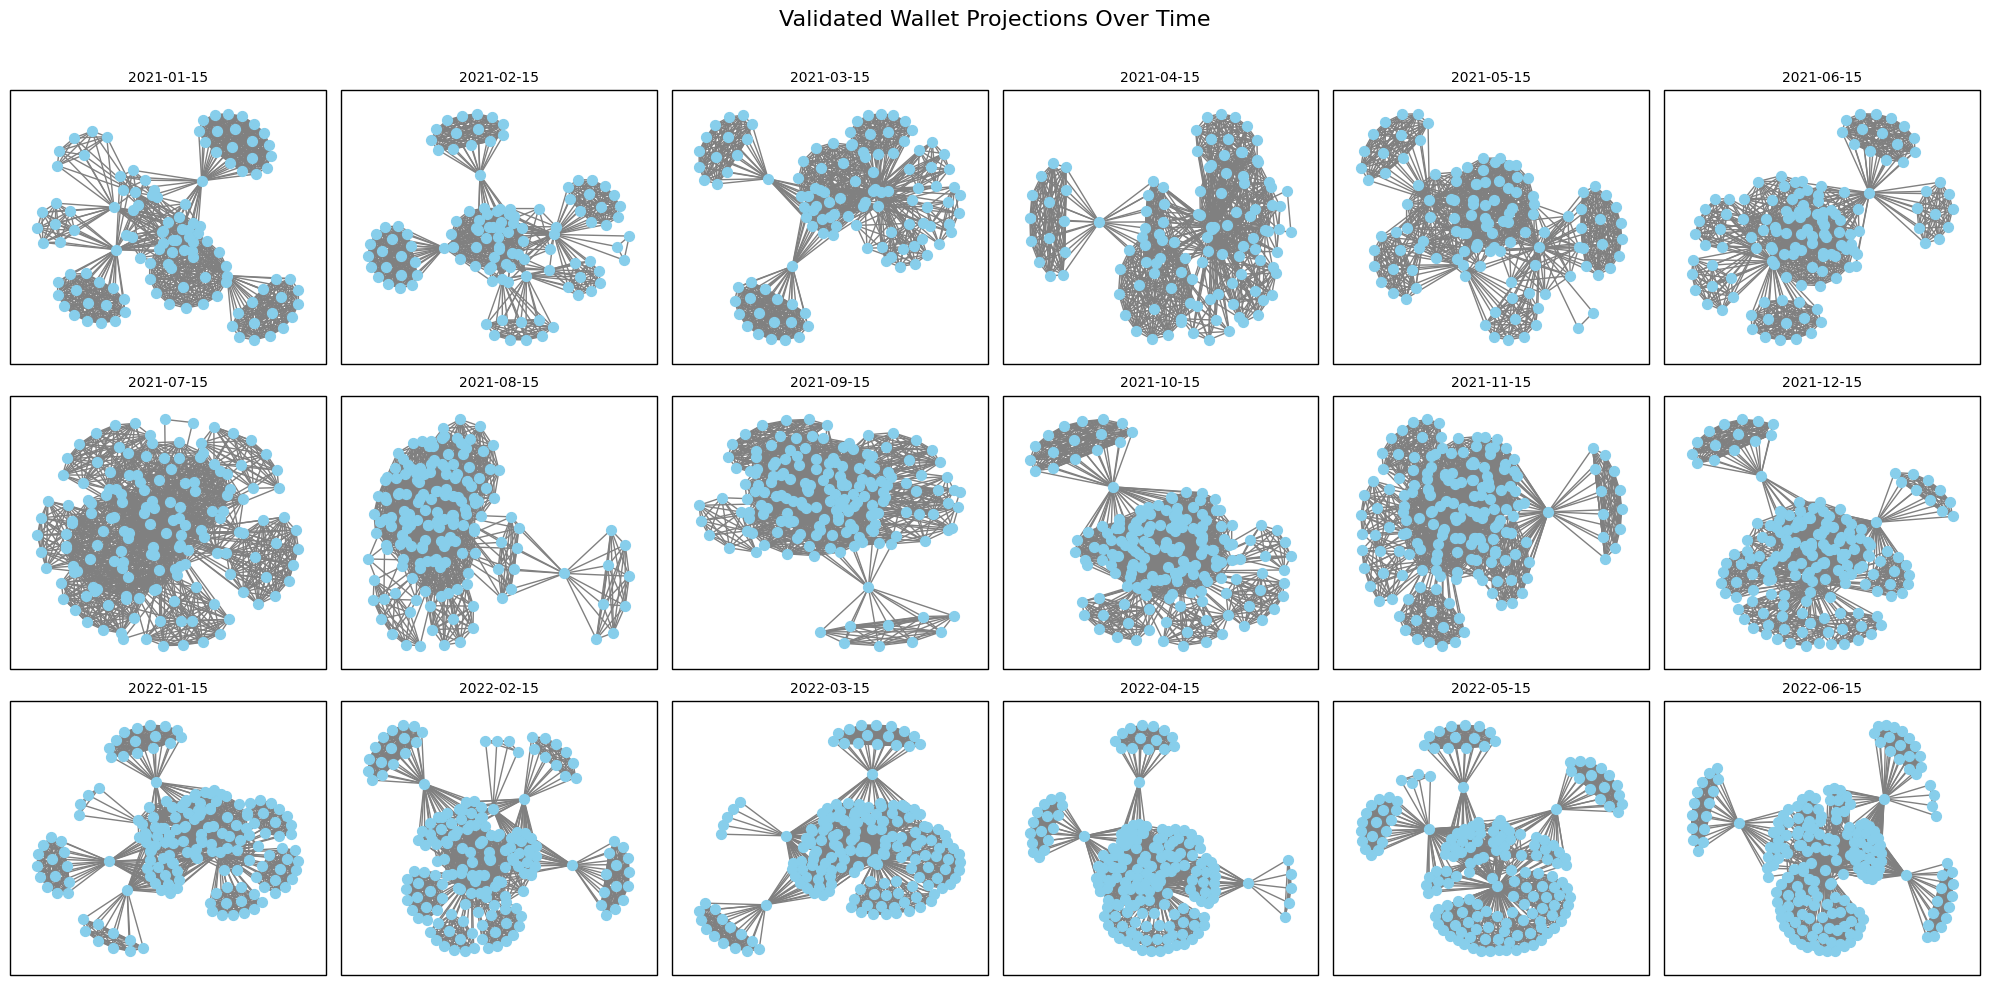

In [261]:
visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory='../output/wallet_network_projections/', layout=nx.kamada_kawai_layout)


          11659570  11861210  12043054  12244515  12438842  12638919  \
11659570  1.000000  0.261128  0.170127  0.188627  0.153590  0.125000   
11861210  0.261128  1.000000  0.254478  0.275542  0.219138  0.143336   
12043054  0.170127  0.254478  1.000000  0.312936  0.241679  0.200548   
12244515  0.188627  0.275542  0.312936  1.000000  0.297610  0.206872   
12438842  0.153590  0.219138  0.241679  0.297610  1.000000  0.269679   
12638919  0.125000  0.143336  0.200548  0.206872  0.269679  1.000000   
12831436  0.118465  0.164671  0.150780  0.186554  0.245283  0.240320   
13029639  0.096060  0.122857  0.165701  0.234560  0.246883  0.275344   
13230157  0.119395  0.169679  0.133002  0.201666  0.217780  0.197581   
13422506  0.129735  0.129481  0.103836  0.130921  0.204941  0.208633   
13620205  0.109780  0.098219  0.098655  0.147992  0.154818  0.213159   
13809597  0.076923  0.076762  0.114693  0.111944  0.147155  0.168582   
14009885  0.101285  0.089192  0.093766  0.100000  0.135557  0.15

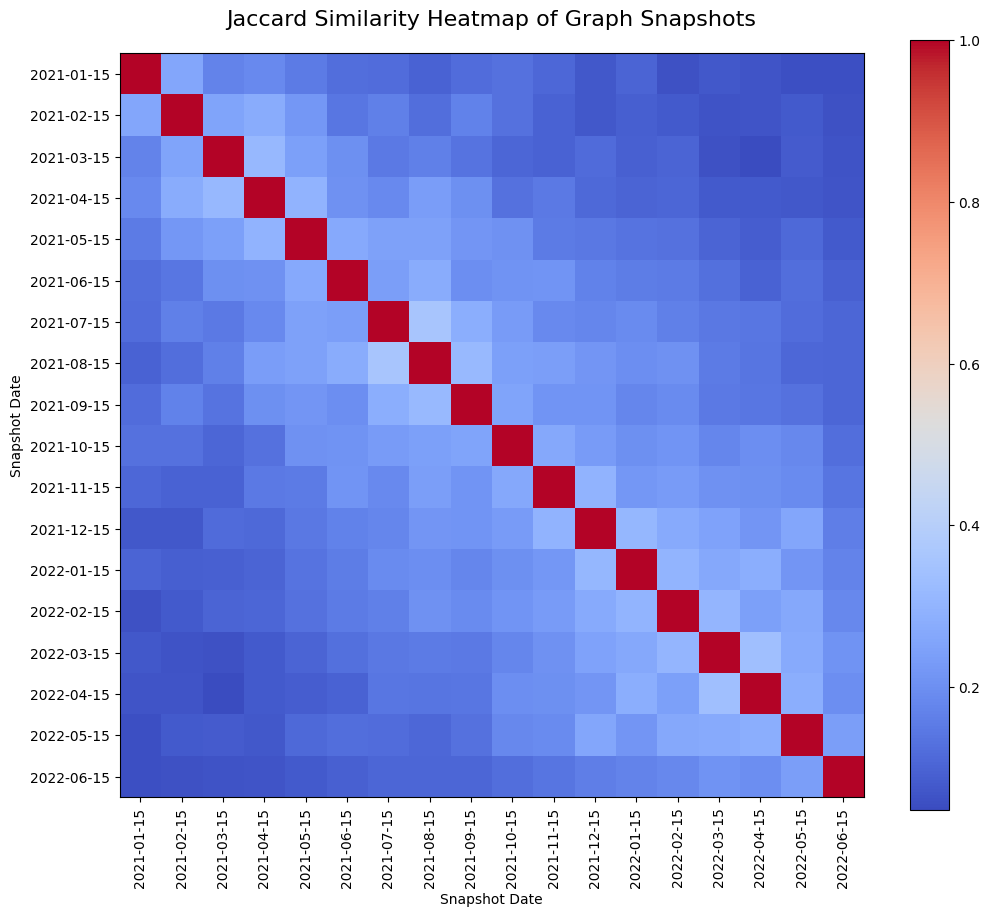

In [262]:
import numpy as np
import pandas as pd

def calculate_similarity_matrix(graphs):
    """
    Calculate the Jaccard Similarity matrix for a dictionary of graphs.

    Parameters:
    graphs (dict): A dictionary of graphs with snapshots as keys.

    Returns:
    np.ndarray: A 2D numpy array representing the similarity matrix.
    list: A sorted list of snapshot keys.
    """
    snapshot_list = sorted(graphs.keys())
    similarity_matrix = np.zeros((len(snapshot_list), len(snapshot_list)))

    for i, snapshot1 in enumerate(snapshot_list):
        for j, snapshot2 in enumerate(snapshot_list):
            if i <= j:
                similarity = jaccard_similarity(graphs[snapshot1], graphs[snapshot2])
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity  # Symmetric matrix

    return similarity_matrix, snapshot_list

# Example usage
# Assuming 'graphs' is a dictionary of graphs, and 'dates' is a list of corresponding dates
similarity_matrix, snapshot_list = calculate_similarity_matrix(graphs)

# Convert the similarity matrix to a pandas DataFrame for easier reading and analysis
similarity_df = pd.DataFrame(similarity_matrix, index=snapshot_list, columns=snapshot_list)

# Output the DataFrame to see the numerical values
print(similarity_df)

# Optional: Save the DataFrame as a CSV file
# similarity_df.to_csv('similarity_matrix.csv')

# Plot the similarity heatmap
plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory='../output/wallet_network_projections/')

In [113]:
similarity_df = pd.DataFrame(similarity_matrix, index=snapshot_list, columns=snapshot_list)
print(similarity_df)


          11659570  11861210  12043054  12244515  12438842  12638919  \
11659570  1.000000  0.261128  0.170127  0.188627  0.153590  0.125000   
11861210  0.261128  1.000000  0.254478  0.275542  0.219138  0.143336   
12043054  0.170127  0.254478  1.000000  0.312936  0.241679  0.200548   
12244515  0.188627  0.275542  0.312936  1.000000  0.297610  0.206872   
12438842  0.153590  0.219138  0.241679  0.297610  1.000000  0.269679   
12638919  0.125000  0.143336  0.200548  0.206872  0.269679  1.000000   
12831436  0.118465  0.164671  0.150780  0.186554  0.245283  0.240320   
13029639  0.096060  0.122857  0.165701  0.234560  0.246883  0.275344   
13230157  0.119395  0.169679  0.133002  0.201666  0.217780  0.197581   
13422506  0.129735  0.129481  0.103836  0.130921  0.204941  0.208633   
13620205  0.109780  0.098219  0.098655  0.147992  0.154818  0.213159   
13809597  0.076923  0.076762  0.114693  0.111944  0.147155  0.168582   
14009885  0.101285  0.089192  0.093766  0.100000  0.135557  0.15

# General network analysis

In [114]:
import networkx as nx
import pandas as pd

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],

    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        
        data['Snapshot'].append(snapshot)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    
    return pd.DataFrame(data)

# Example usage
# Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

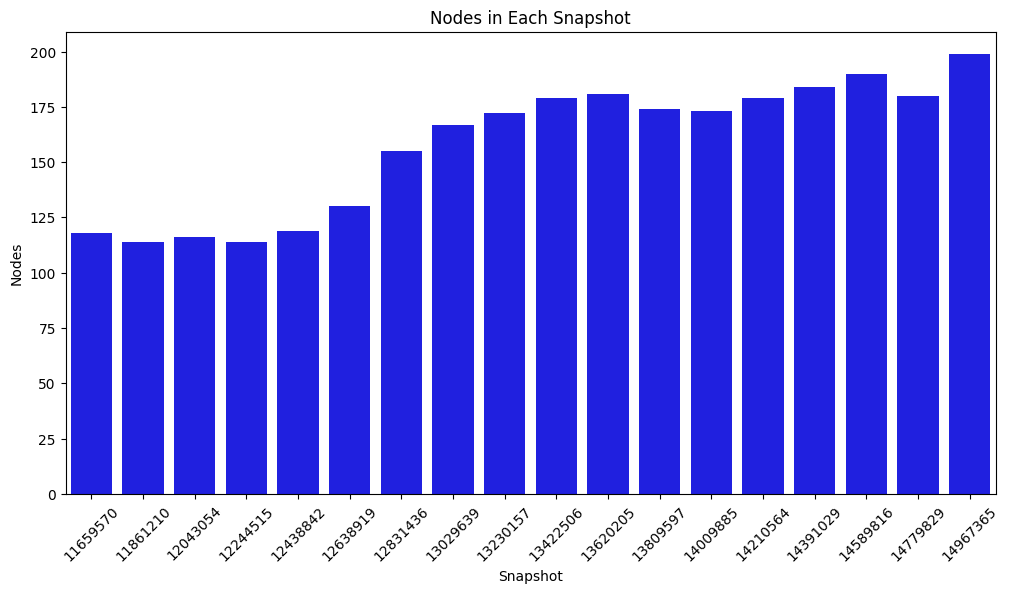

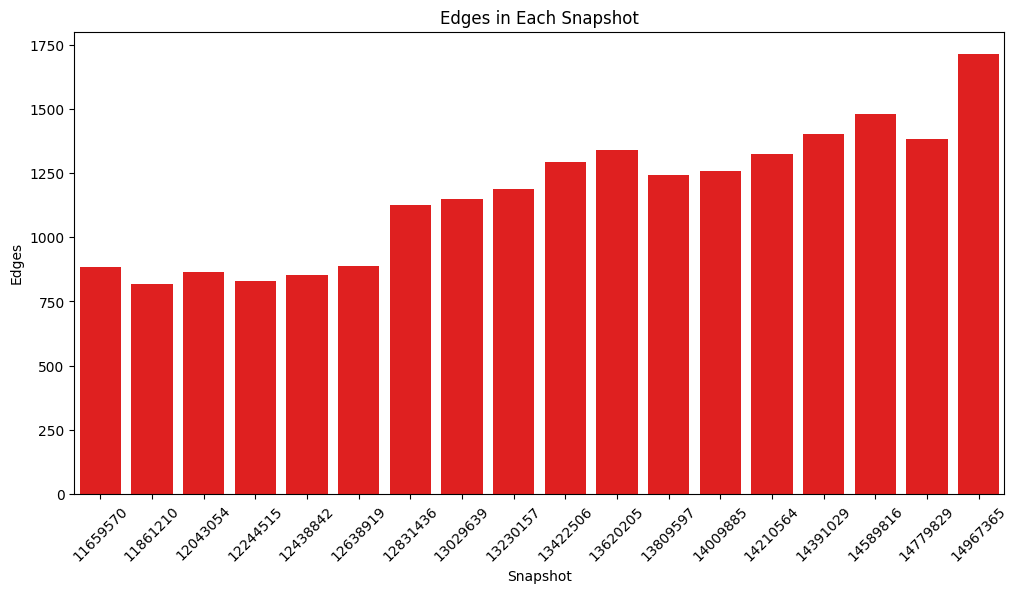

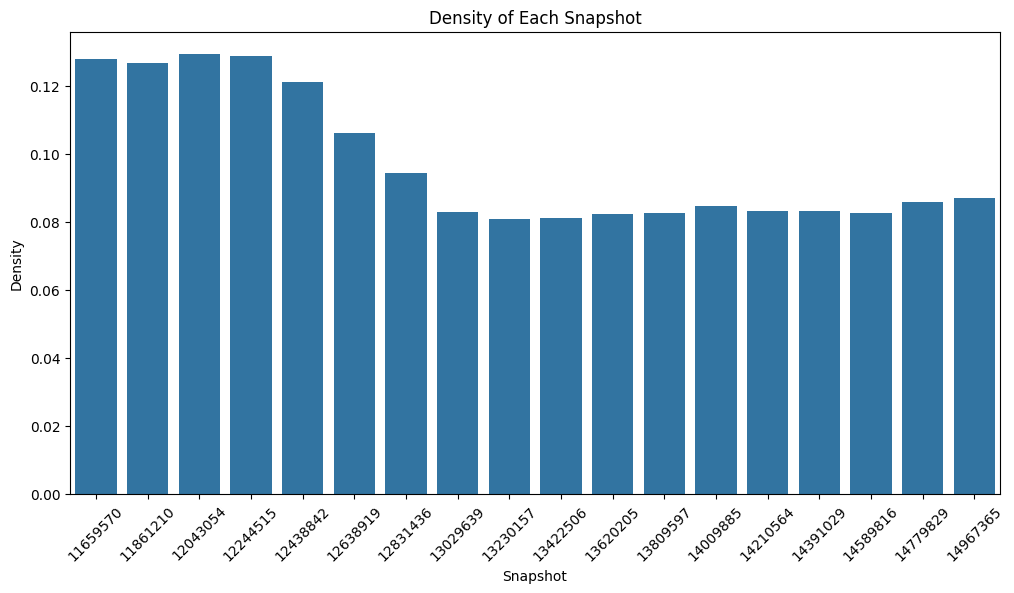

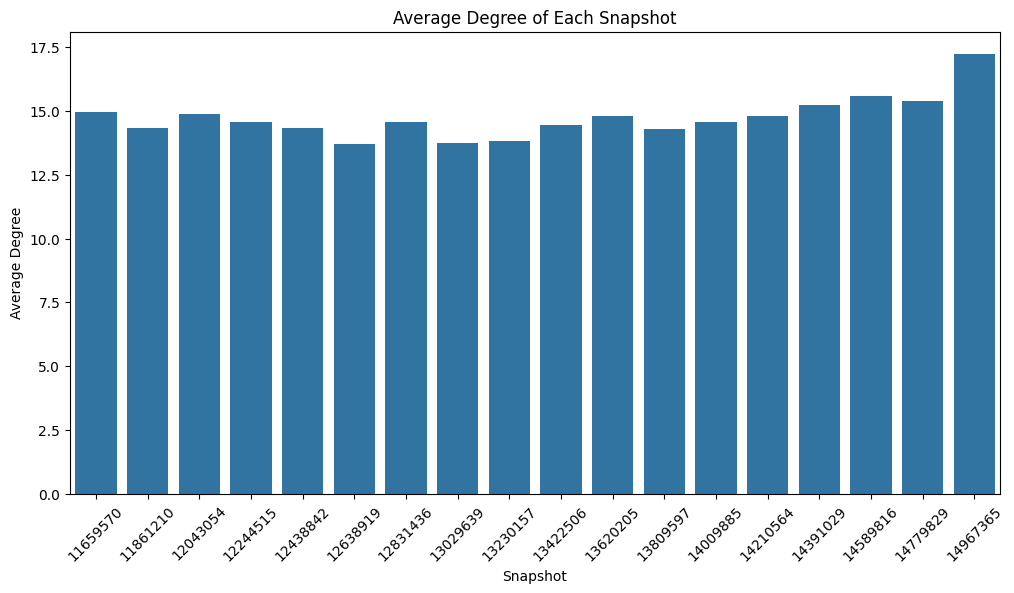

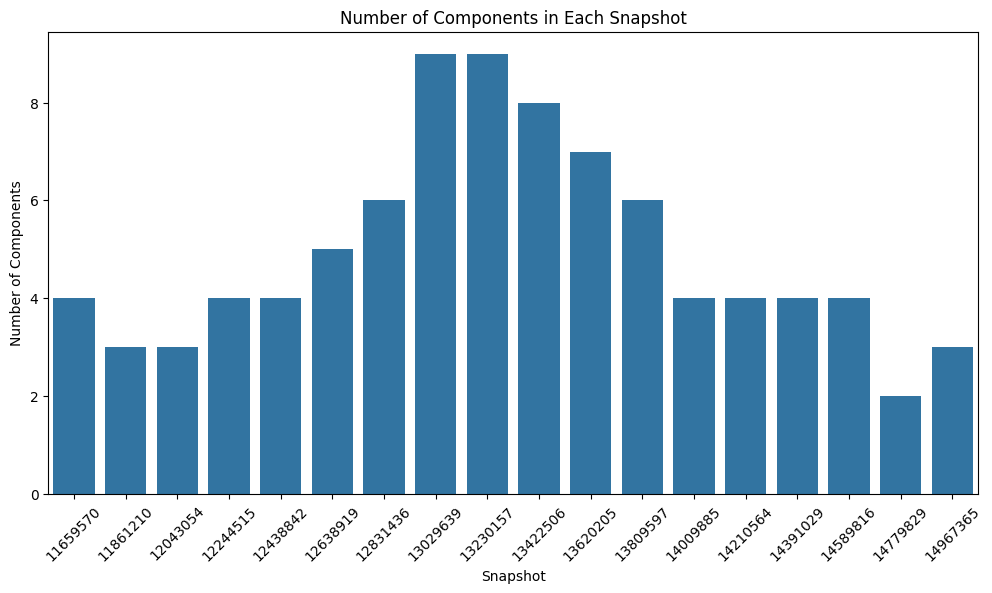

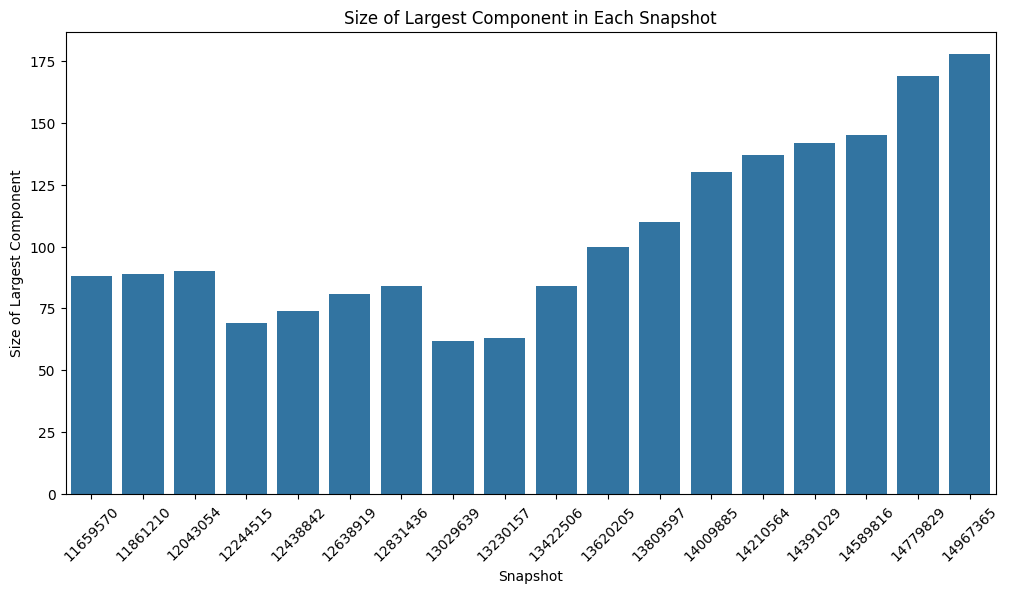

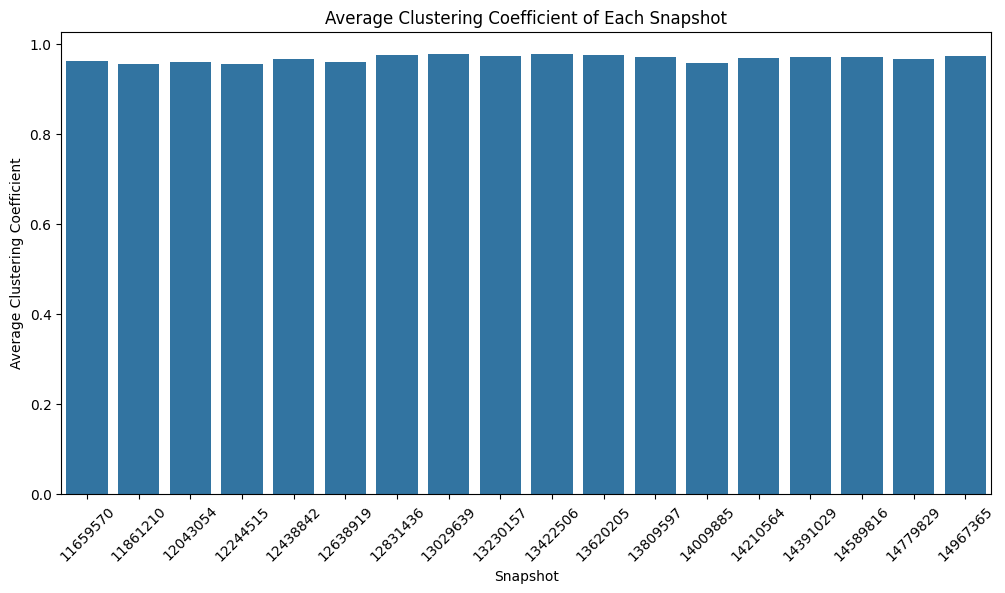

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting Nodes
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Nodes', data=graph_stats, color='b')
plt.title('Nodes in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Nodes')
plt.xticks(rotation=45)
plt.show()

# Plotting Edges
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Edges', data=graph_stats, color='r')
plt.title('Edges in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Edges')
plt.xticks(rotation=45)
plt.show()

# Plotting Density
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Density', data=graph_stats)
plt.title('Density of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

# Plotting Average Degree
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='AvgDegree', data=graph_stats)
plt.title('Average Degree of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Average Degree')
plt.xticks(rotation=45)
plt.show()

# Plotting Number of Components
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='NumComponents', data=graph_stats)
plt.title('Number of Components in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Number of Components')
plt.xticks(rotation=45)
plt.show()

# Plotting Size of Largest Component
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='SizeLargestComponent', data=graph_stats)
plt.title('Size of Largest Component in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Size of Largest Component')
plt.xticks(rotation=45)
plt.show()

# Plotting Average Clustering Coefficient
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='AvgClusteringCoeff', data=graph_stats)
plt.title('Average Clustering Coefficient of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Average Clustering Coefficient')
plt.xticks(rotation=45)
plt.show()

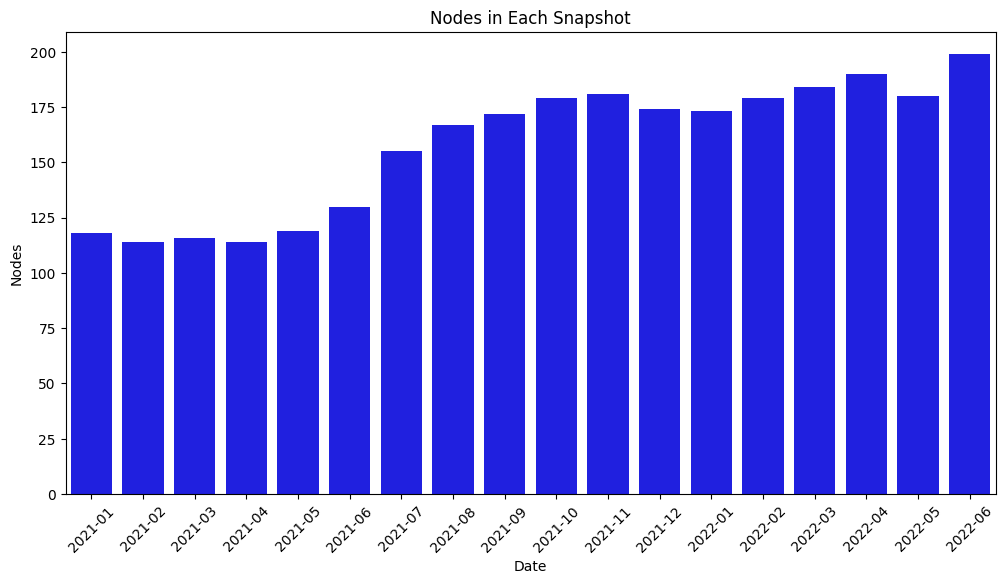

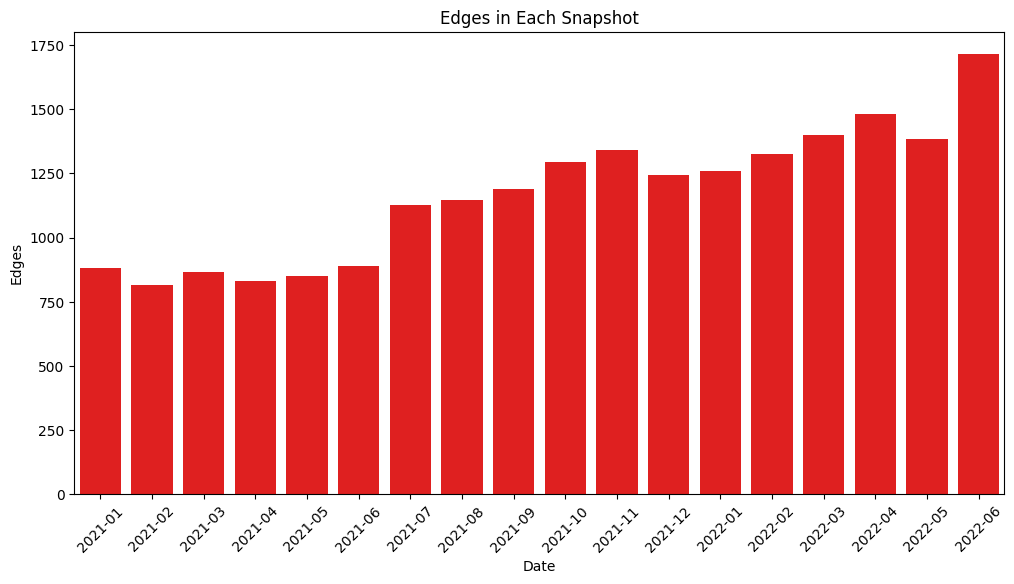

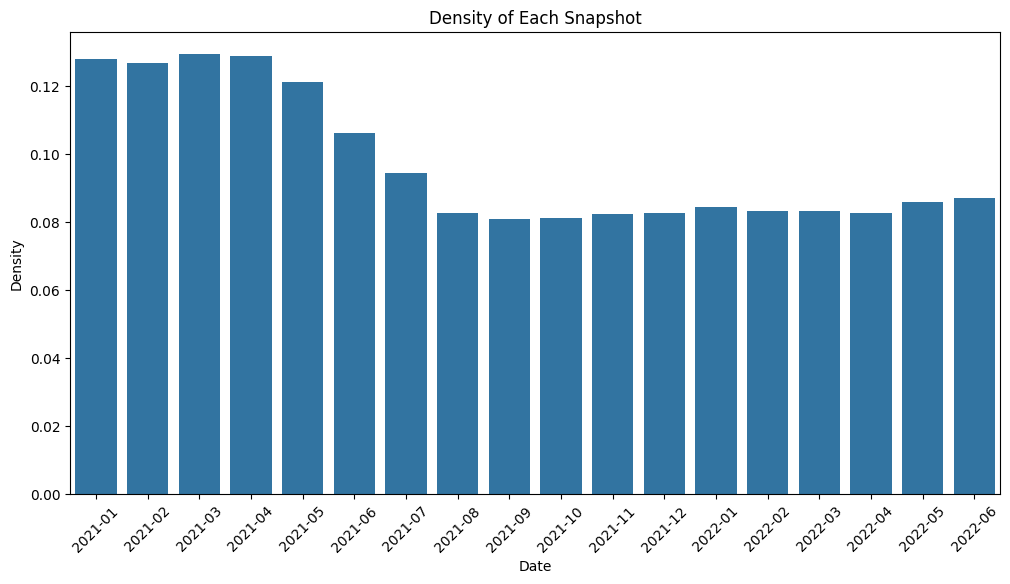

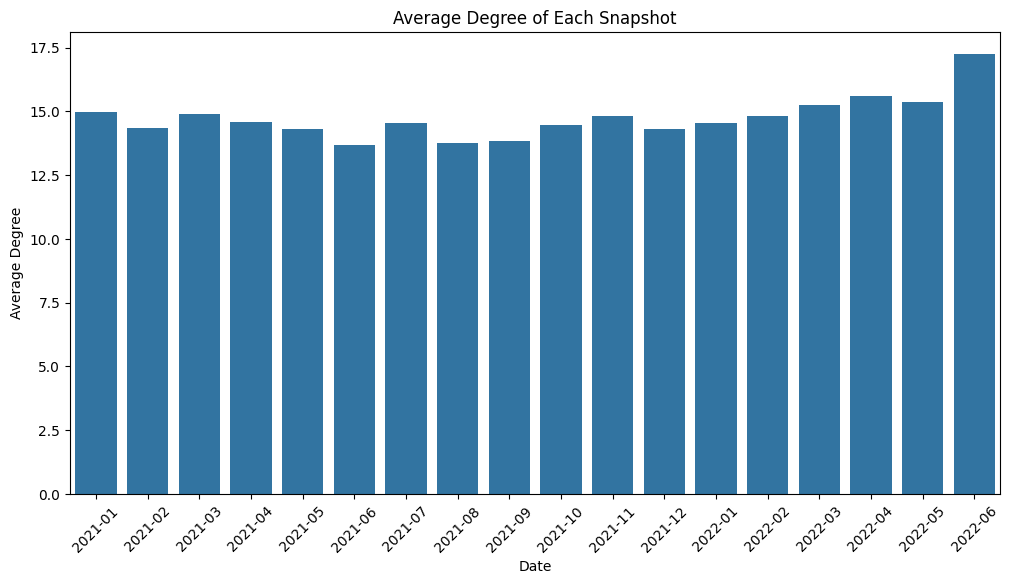

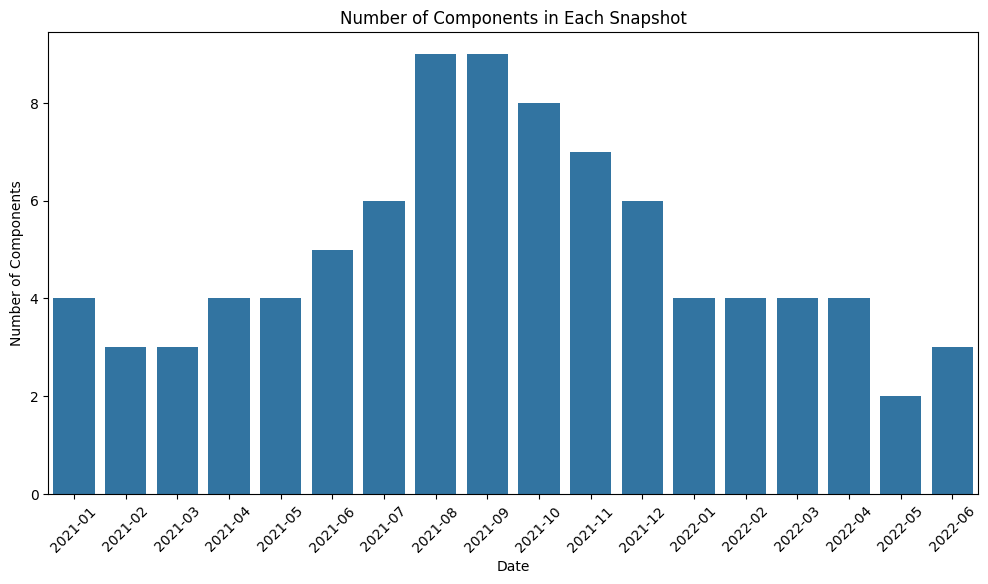

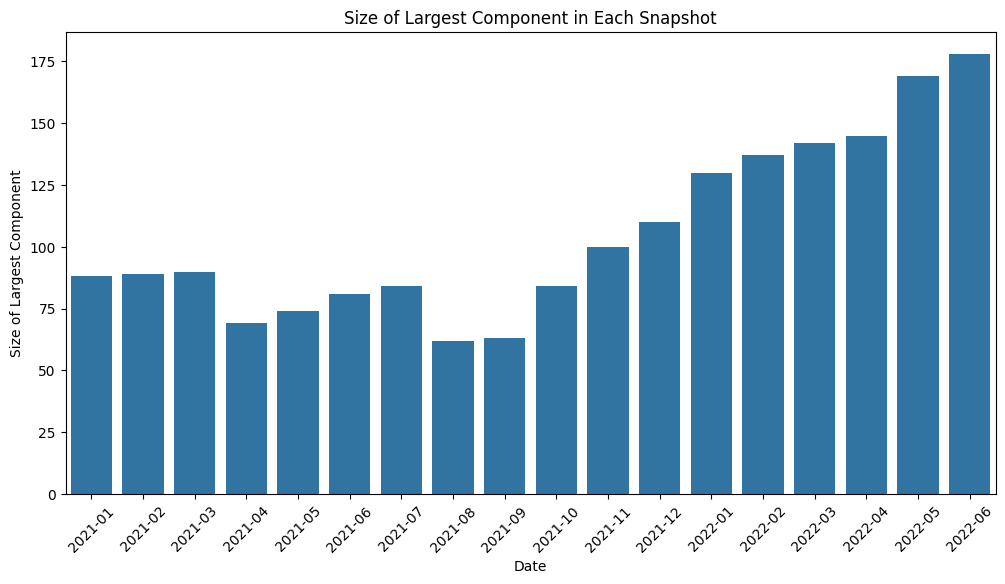

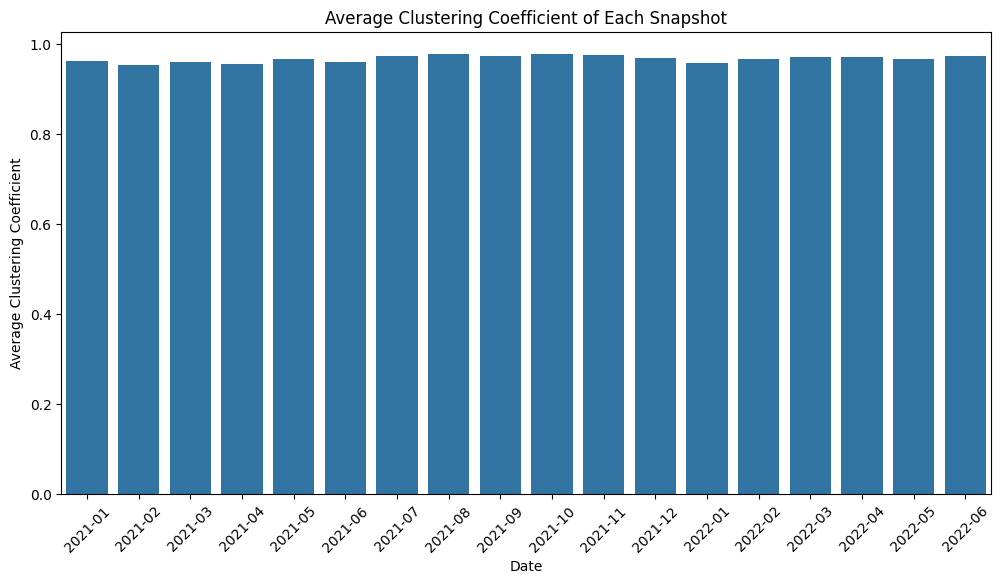

In [237]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping of snapshots to dates
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Date': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],
    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        # Map snapshot to date
        date = snapshot_dates.get(snapshot, 'Unknown')

        data['Snapshot'].append(snapshot)
        data['Date'].append(date)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    return pd.DataFrame(data)

# Example usage
# Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

# Plotting with Dates instead of Snapshot numbers
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Nodes', data=graph_stats, color='b')
plt.title('Nodes in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Nodes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Edges', data=graph_stats, color='r')
plt.title('Edges in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Edges')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Density', data=graph_stats)
plt.title('Density of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='AvgDegree', data=graph_stats)
plt.title('Average Degree of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Average Degree')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='NumComponents', data=graph_stats)
plt.title('Number of Components in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Number of Components')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='SizeLargestComponent', data=graph_stats)
plt.title('Size of Largest Component in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Size of Largest Component')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='AvgClusteringCoeff', data=graph_stats)
plt.title('Average Clustering Coefficient of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Average Clustering Coefficient')
plt.xticks(rotation=45)
plt.show()


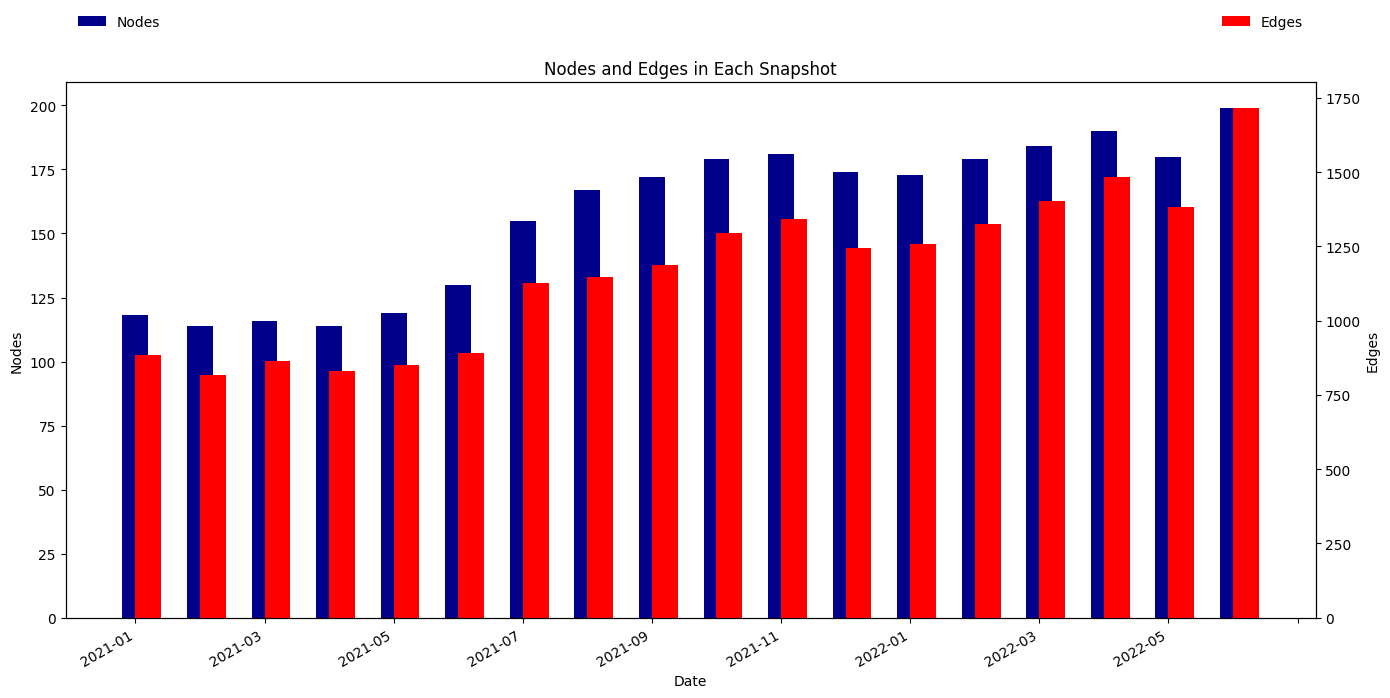

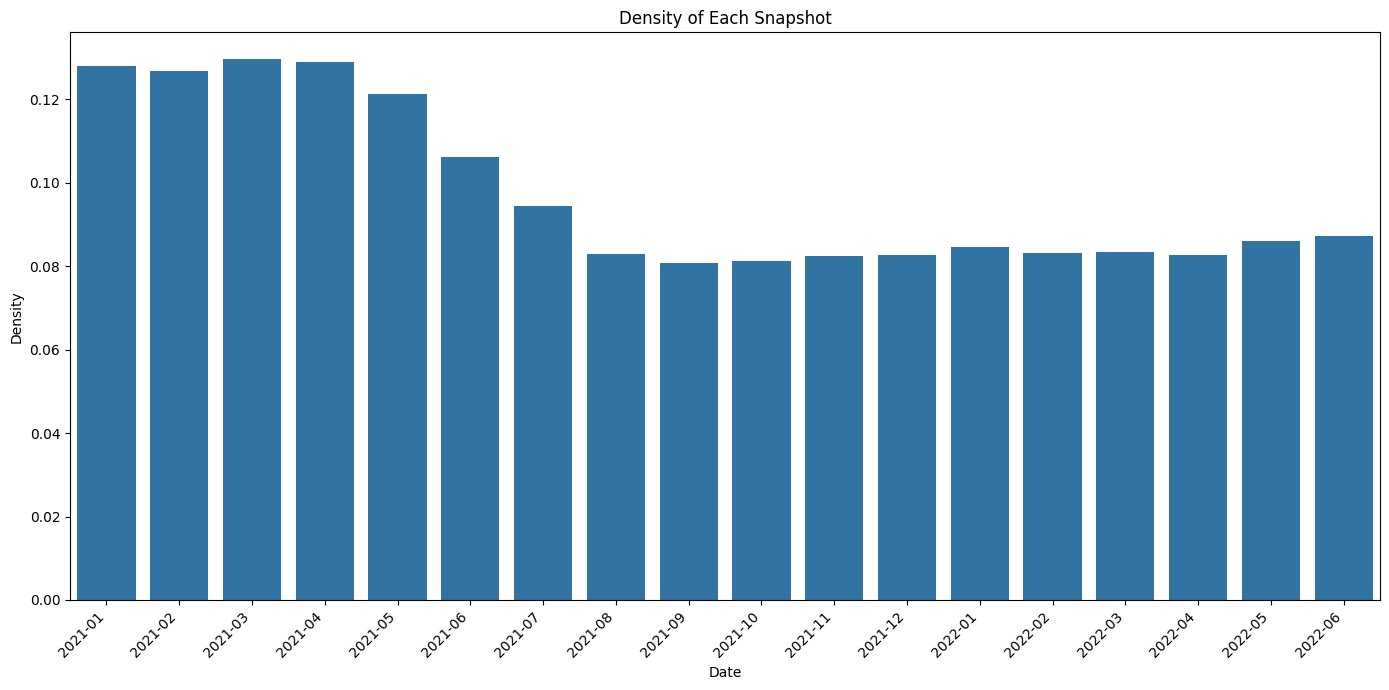

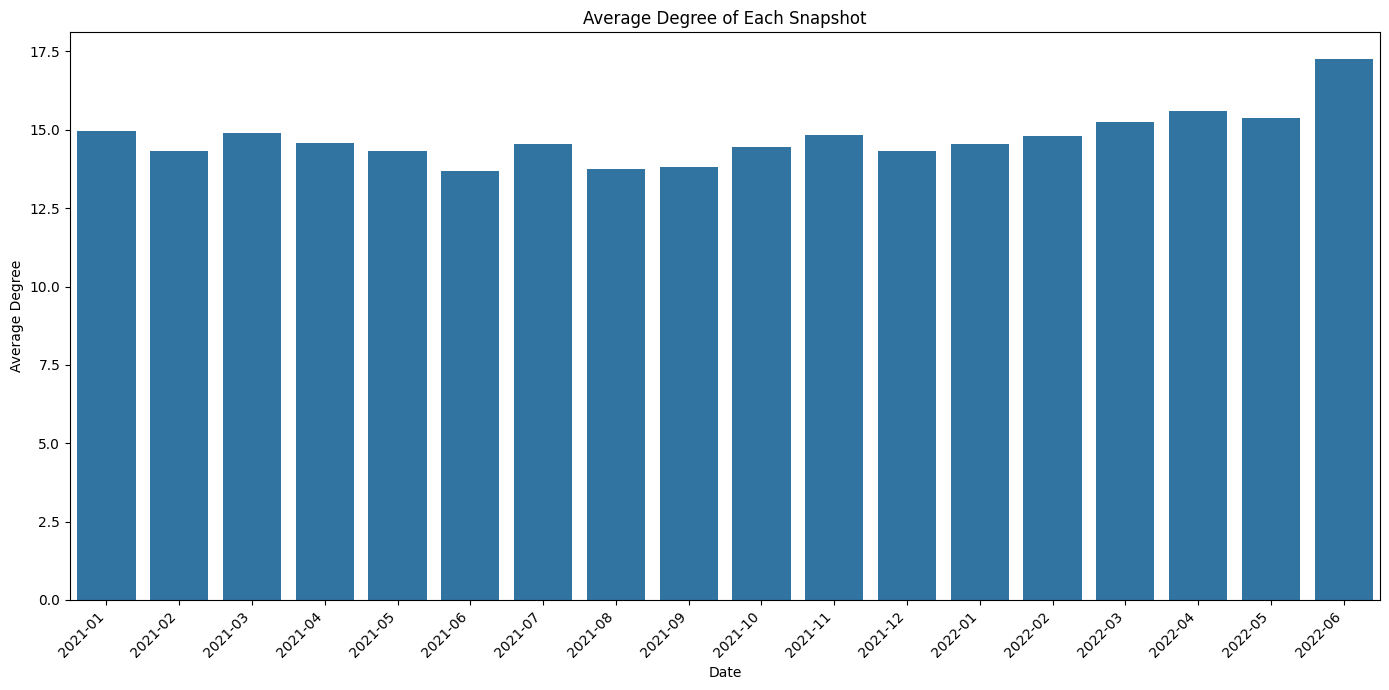

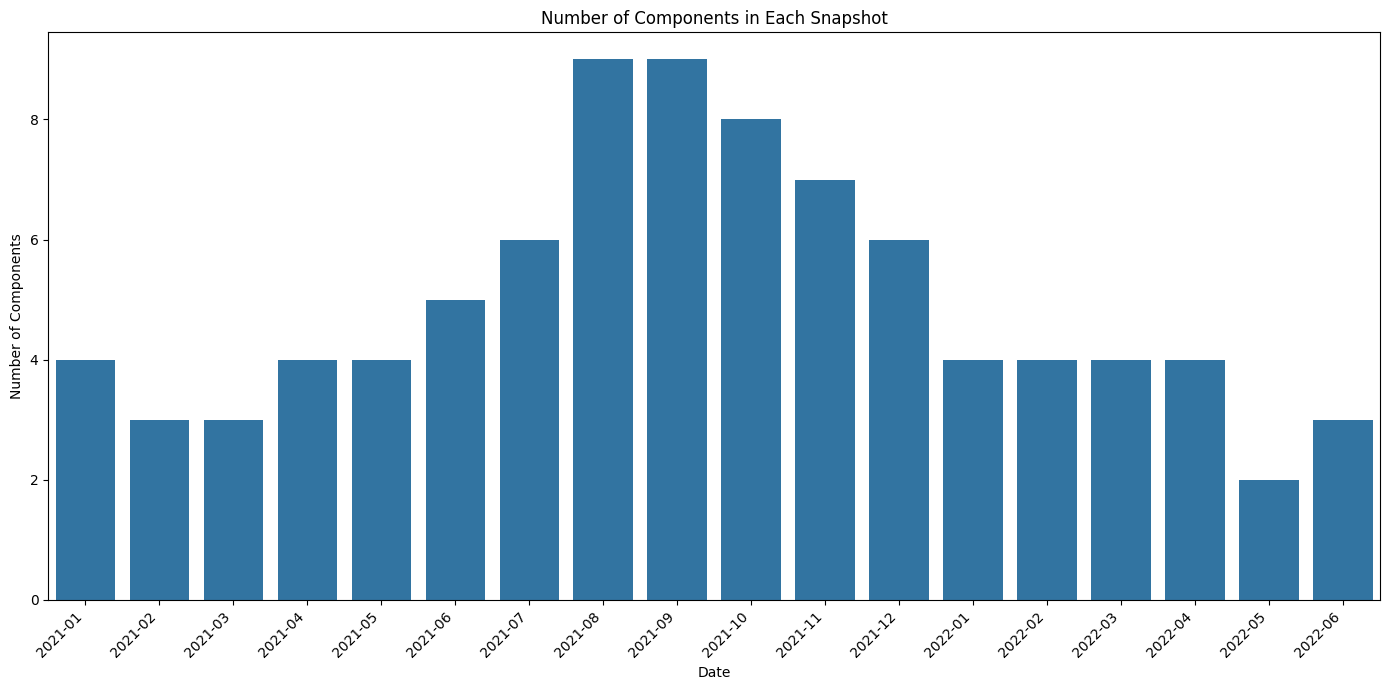

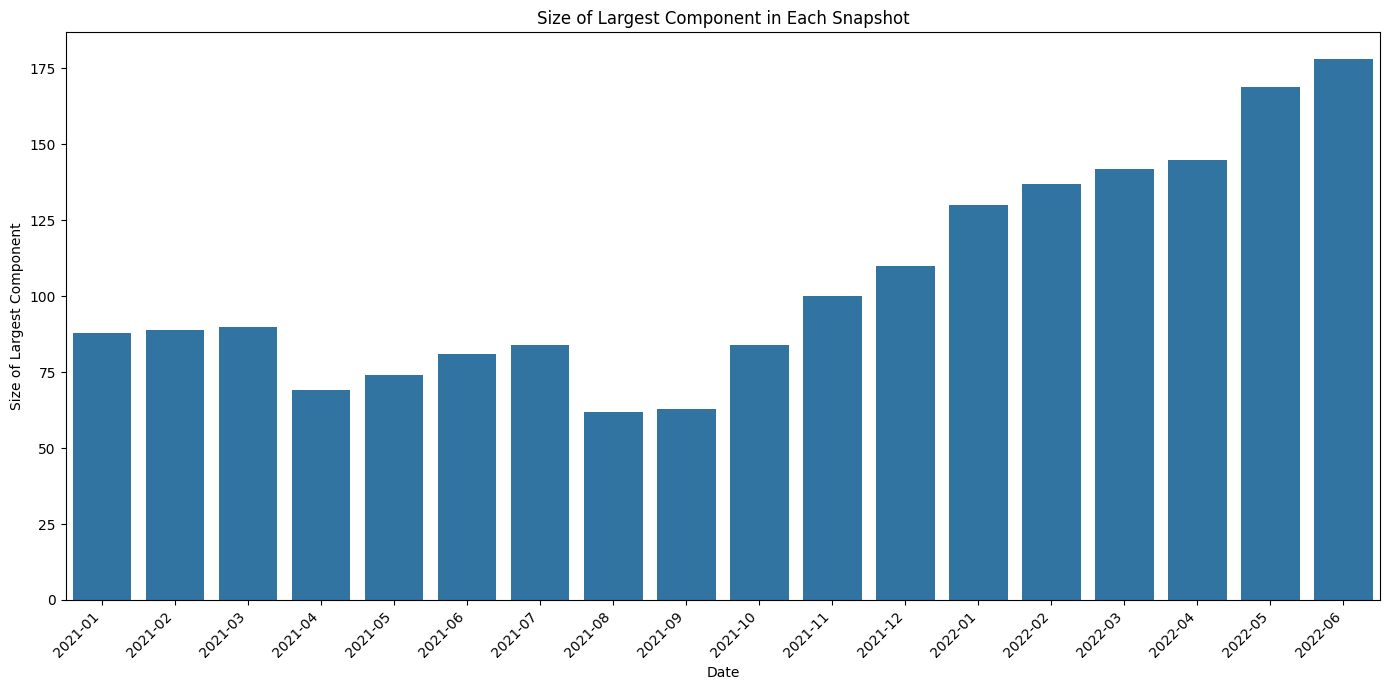

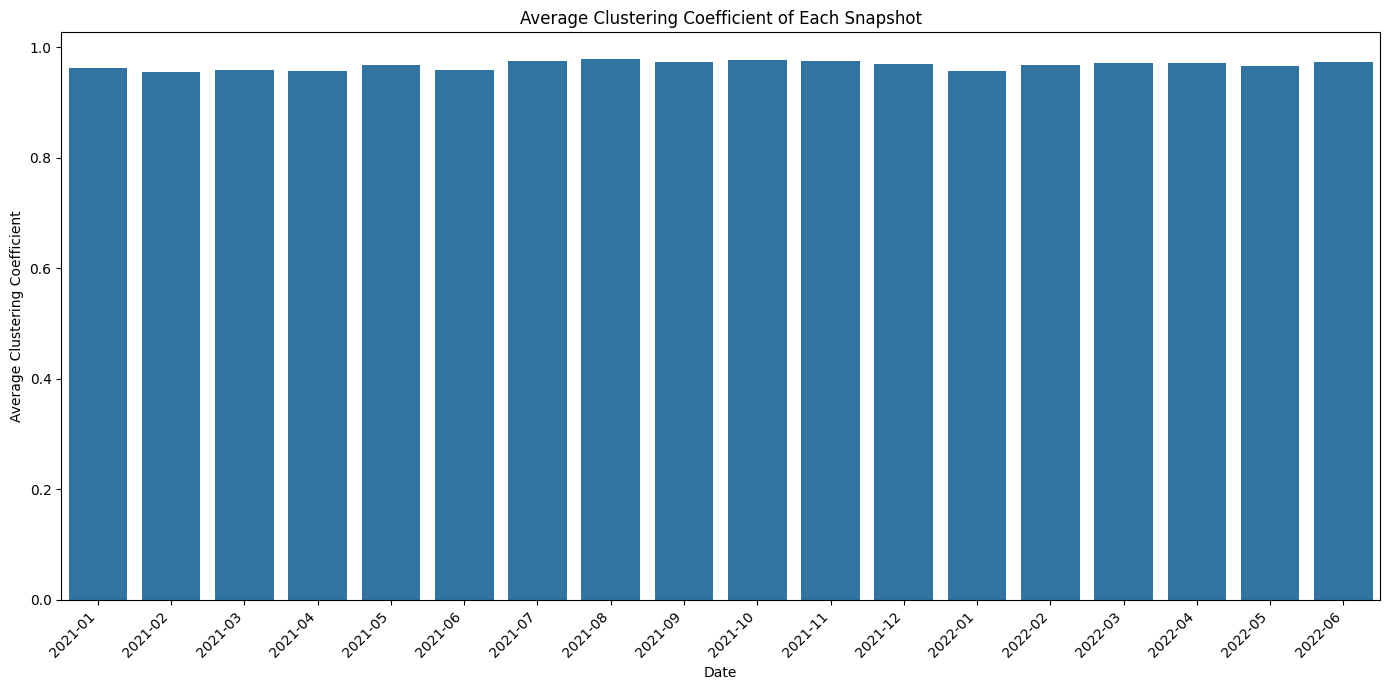

In [244]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Mapping of snapshots to dates
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Date': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],
    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        # Map snapshot to date
        date = snapshot_dates.get(snapshot, 'Unknown')

        data['Snapshot'].append(snapshot)
        data['Date'].append(date)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    return pd.DataFrame(data)

# Example usage
# Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

# Plotting Nodes and Edges as Twin Bar Charts
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Nodes as bar chart on the primary y-axis
ax1.bar(graph_stats['Date'], graph_stats['Nodes'], color='darkblue', width=0.4, align='center', label='Nodes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nodes', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for edges
ax2 = ax1.twinx()

# Plot Edges as a bar chart on the secondary y-axis
ax2.bar(graph_stats['Date'], graph_stats['Edges'], color='red', width=0.4, align='edge', label='Edges')
ax2.set_ylabel('Edges', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Format the x-axis labels
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right')
plt.gcf().autofmt_xdate()

# Adjust the legend to avoid overlapping the graph
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.15), frameon=False)

plt.title('Nodes and Edges in Each Snapshot')
plt.tight_layout()
plt.show()

# Plotting other metrics with Dates instead of Snapshot numbers
plt.figure(figsize=(14, 7))
sns.barplot(x='Date', y='Density', data=graph_stats)
plt.title('Density of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Density')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Date', y='AvgDegree', data=graph_stats)
plt.title('Average Degree of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Average Degree')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Date', y='NumComponents', data=graph_stats)
plt.title('Number of Components in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Number of Components')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Date', y='SizeLargestComponent', data=graph_stats)
plt.title('Size of Largest Component in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Size of Largest Component')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Date', y='AvgClusteringCoeff', data=graph_stats)
plt.title('Average Clustering Coefficient of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Average Clustering Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


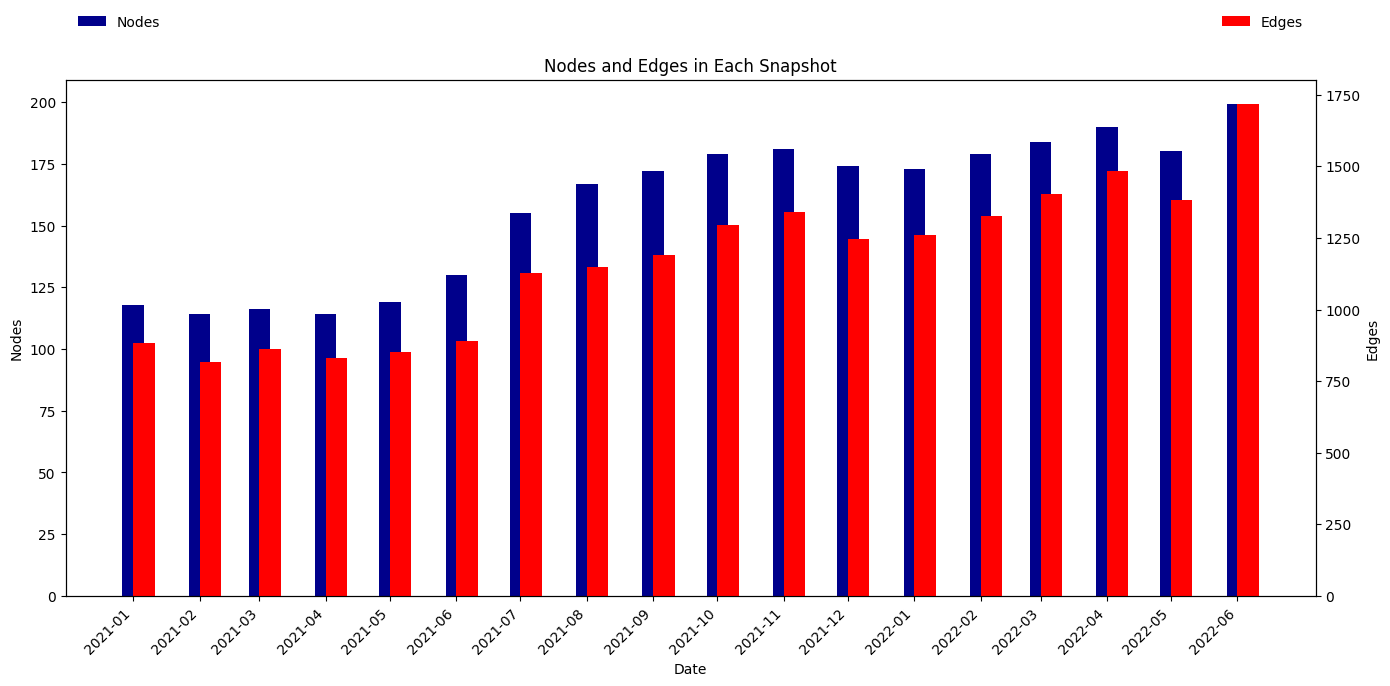

In [252]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping of snapshots to dates
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Date': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],
    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        # Map snapshot to date
        date = snapshot_dates.get(snapshot, 'Unknown')

        data['Snapshot'].append(snapshot)
        data['Date'].append(date)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    return pd.DataFrame(data)

# Example usage
# Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

# Convert 'Date' to datetime format for proper date handling
graph_stats['Date'] = pd.to_datetime(graph_stats['Date'])

# Plotting Nodes and Edges as Twin Bar Charts
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Nodes as bar chart on the primary y-axis
ax1.bar(graph_stats['Date'], graph_stats['Nodes'], color='darkblue', width=10, align='center', label='Nodes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nodes', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for edges
ax2 = ax1.twinx()

# Plot Edges as a bar chart on the secondary y-axis
ax2.bar(graph_stats['Date'], graph_stats['Edges'], color='red', width=10, align='edge', label='Edges')
ax2.set_ylabel('Edges', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set x-ticks to only the dates present in your dataset
ax1.set_xticks(graph_stats['Date'])
ax1.set_xticklabels(graph_stats['Date'].dt.strftime('%Y-%m'), rotation=45, ha='right')

# Adjust the legend to avoid overlapping the graph
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.15), frameon=False)

plt.title('Nodes and Edges in Each Snapshot')
plt.tight_layout()
plt.show()


In [116]:
# Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

import pandas as pd

# Assuming `graph_stats` is your DataFrame containing the statistics
# graph_stats.to_csv('graph_statistics.csv', index=False)

# Print the DataFrame to see the numerical data
print(graph_stats)


    Snapshot  Nodes  Edges   Density  AvgDegree  NumComponents  \
0   11659570    118    883  0.127915  14.966102              4   
1   11861210    114    817  0.126844  14.333333              3   
2   12043054    116    864  0.129535  14.896552              3   
3   12244515    114    831  0.129017  14.578947              4   
4   12438842    119    852  0.121350  14.319328              4   
5   12638919    130    890  0.106142  13.692308              5   
6   12831436    155   1128  0.094512  14.554839              6   
7   13029639    167   1148  0.082822  13.748503              9   
8   13230157    172   1189  0.080851  13.825581              9   
9   13422506    179   1294  0.081225  14.458101              8   
10  13620205    181   1341  0.082320  14.817680              7   
11  13809597    174   1245  0.082719  14.310345              6   
12  14009885    173   1259  0.084622  14.554913              4   
13  14210564    179   1326  0.083234  14.815642              4   
14  143910

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],
    }

    # Calculate graph statistics for each snapshot
    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        # Append the statistics to the data dictionary
        data['Snapshot'].append(snapshot)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    return pd.DataFrame(data)

# Example usage: Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

# Mapping snapshot IDs to dates
snapshot_dates = {
    '11659570': '2021-01', '11861210': '2021-02', '12043054': '2021-03', '12244515': '2021-04',
    '12438842': '2021-05', '12638919': '2021-06', '12831436': '2021-07', '13029639': '2021-08',
    '13230157': '2021-09', '13422506': '2021-10', '13620205': '2021-11', '13809597': '2021-12',
    '14009885': '2022-01', '14210564': '2022-02', '14391029': '2022-03', '14589816': '2022-04',
    '14779829': '2022-05', '14967365': '2022-06'
}

# Convert Snapshot IDs to dates
graph_stats['Date'] = graph_stats['Snapshot'].map(snapshot_dates)

# Convert the Date column to datetime format and sort by Date
graph_stats['Date'] = pd.to_datetime(graph_stats['Date'])
graph_stats = graph_stats.sort_values('Date')

# Plotting Nodes and Edges Over Time with Two Different Y-Axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Nodes as bars
ax1.bar(graph_stats['Date'], graph_stats['Nodes'], color='b', alpha=0.6, label='Nodes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nodes', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a twin axis for Edges
ax2 = ax1.twinx()
ax2.plot(graph_stats['Date'], graph_stats['Edges'], color='r', marker='o', label='Edges')
ax2.set_ylabel('Edges', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Nodes and Edges Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Generating normal graph

import os
from os.path import join
from dotenv import load_dotenv
import dask.dataframe as dd
from tqdm import tqdm
import pandas as pd
import time
import numpy as np
import networkx as nx

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

load_dotenv()

path = os.environ['DATA_DIRECTORY']

# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply

KNOWN_BURNER_ADDRESSES = set([
    '0x0000000000000000000000000000000000000000', '0x000000000000000000000000000000000000dead',
    '0x0000000000000000000000000000000000000001', '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003', '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005', '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007'
])

# Helper function to process each snapshot
def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    dtypes = {
        'label': 'object',  # Specify dtype for the label column
        # Add other columns with their expected dtypes if necessary
    }
    
    ddf = dd.read_csv(
        join(path, f'/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_token_balance_tables/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )   
    
    # Efficient filtering using Dask
    ddf = ddf[(ddf['value'] > 0) & 
              (ddf.pct_supply > SUPPLY_THRESHOLD) &
              (~ddf['address'].isin(KNOWN_BURNER_ADDRESSES)) & 
              (ddf['token_address'].isin(df_addresses['address']))]

    present_addresses = ddf['address'].unique().compute()
    pop_size = len(ddf['token_address'].unique().compute())

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf.compute(), pop_size)

    G = nx.Graph()
    G.add_edges_from(validated_links['combination'])

    # Store the graph with a name based on snapshot height
    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

# Main function to load, process data, and generate network graphs
def generate_network_graphs():
    df_snapshot = pd.read_csv(SNAPSHOT_CSV_PATH)
    df_addresses = pd.read_csv(ADDRESS_CSV_PATH)

    snapshots = df_snapshot[df_snapshot['Block Height'] >= 11659570]['Block Height']

    total_snapshots = len(snapshots)
    total_time = 0

    with tqdm(total=total_snapshots) as pbar:
        for snapshot in snapshots:
            snapshot, time_taken = process_snapshot(snapshot, df_addresses)
            total_time += time_taken
            avg_time_per_snapshot = total_time / (pbar.n + 1)
            estimated_total_time = avg_time_per_snapshot * total_snapshots
            remaining_time = estimated_total_time - total_time
            pbar.set_postfix({
                'Snapshot': snapshot,
                'Time per snapshot': f'{avg_time_per_snapshot:.2f}s',
                'Remaining time': f'{remaining_time:.2f}s'
            })
            pbar.update(1)

if __name__ == "__main__":
    generate_network_graphs()

# Generating enriched graph

import os
import pandas as pd
import dask.dataframe as dd
import networkx as nx
from tqdm import tqdm
import time
from os.path import join
from dotenv import load_dotenv

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    # Define data types for efficient loading
    dtypes = {
        'label': 'object',  # Specify dtype for the label column if used
        'value': 'float64',
        'pct_supply': 'float64',
        'address': 'object',
        'token_address': 'object'
    }
    
    # Load snapshot data
    ddf = dd.read_csv(
        join(path, f'/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )
    
    # Filter out unwanted addresses and low balances
    ddf_filtered = ddf[(ddf['value'] > 0) & 
                       (ddf.pct_supply > SUPPLY_THRESHOLD) &
                       (~ddf['address'].isin(known_burner_addresses)) & 
                       (ddf['token_address'].isin(df_addresses['address']))]

    # Compute unique addresses and their corresponding tokens
    present_addresses = ddf_filtered['address'].compute()
    address_to_token = ddf_filtered[['address', 'token_address']].drop_duplicates().compute().set_index('address')['token_address'].to_dict()

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf_filtered.compute(), len(present_addresses))

    G = nx.Graph()
    
    # Add nodes with token information
    for address in present_addresses:
        G.add_node(address, token_address=address_to_token.get(address, 'Unknown'))
    
    # Add validated links as edges
    G.add_edges_from(validated_links['combination'])

    # Store the graph with additional token information
    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

if __name__ == "__main__":
    load_dotenv()
    
   
# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply


os.makedirs(OUTPUT_PATH, exist_ok=True)  # Ensure the output directory exists
    
df_snapshot = pd.read_csv(SNAPSHOT_CSV_PATH)
df_addresses = pd.read_csv(ADDRESS_CSV_PATH)
snapshots = df_snapshot[df_snapshot['Block Height'] >= 11659570]['Block Height']
total_snapshots = len(snapshots)
total_time = 0

with tqdm(total=total_snapshots) as pbar:
    for snapshot in snapshots:
            snapshot, time_taken = process_snapshot(snapshot, df_addresses)
            total_time += time_taken
            avg_time_per_snapshot = total_time / (pbar.n + 1)
            estimated_total_time = avg_time_per_snapshot * total_snapshots
            remaining_time = estimated_total_time - total_time
            pbar.set_postfix({
                'Snapshot': snapshot,
                'Time per snapshot': f'{avg_time_per_snapshot:.2f}s',
                'Remaining time': f'{remaining_time:.2f}s'
            })
            pbar.update(1)


# Checking basic graph properties

#### Normal graph

In [117]:
import networkx as nx

# Path to the .graphml file
graphml_file_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml'

# Load the graph from the .graphml file
G = nx.read_graphml(graphml_file_path)

# Function to inspect and print graph information
def inspect_graph(G):
    # Print basic graph information
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Graph is directed: {G.is_directed()}\n")

    # Print node attributes (sample of 5 nodes)
    print("Sample of node attributes (first 5 nodes):")
    for node, attrs in list(G.nodes(data=True))[:5]:
        print(f"Node: {node}")
        for attr_name, attr_value in attrs.items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    # Print edge attributes (sample of 5 edges)
    print("Sample of edge attributes (first 5 edges):")
    for edge in list(G.edges(data=True))[:5]:
        print(f"Edge: {edge}")
        for attr_name, attr_value in edge[2].items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    # Print all node and edge attributes
    node_attr_keys = set().union(*(d.keys() for n, d in G.nodes(data=True)))
    edge_attr_keys = set().union(*(d.keys() for u, v, d in G.edges(data=True)))

    print(f"Node attributes: {node_attr_keys}")
    print(f"Edge attributes: {edge_attr_keys}")

# Call the function to inspect the graph
inspect_graph(G)



Number of nodes: 118
Number of edges: 883
Graph is directed: False

Sample of node attributes (first 5 nodes):
Node: 0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d

Node: 0xd6868b23905009d859cc232f7c008c13bc527702

Node: 0x2775b1c75658be0f640272ccb8c72ac986009e38

Node: 0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7

Node: 0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10

Sample of edge attributes (first 5 edges):
Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xd6868b23905009d859cc232f7c008c13bc527702', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xca8d6f69d8f32516a109df68b623452cc9f5e64d', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xc2adda861f89bbb333c90c492cb837741916a225', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0x9ef05f7f6deb616fd37ac3c959a2ddd25a54e4f5', {})

Node attributes: set()
Edge attributes: set()


#### Enriched graph

In [118]:
import networkx as nx

# Path to the enriched .graphml file
graphml_file_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_11659570.graphml'

# Load the graph from the .graphml file
G = nx.read_graphml(graphml_file_path)

# Function to inspect and print graph information
def inspect_graph(G):
    # Print basic graph information
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Graph is directed: {G.is_directed()}\n")

    # Print node attributes (sample of 5 nodes)
    print("Sample of node attributes (first 5 nodes):")
    for node, attrs in list(G.nodes(data=True))[:5]:
        print(f"Node: {node}")
        for attr_name, attr_value in attrs.items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    # Print edge attributes (sample of 5 edges)
    print("Sample of edge attributes (first 5 edges):")
    for edge in list(G.edges(data=True))[:5]:
        print(f"Edge: {edge}")
        for attr_name, attr_value in edge[2].items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    # Print all node and edge attributes
    node_attr_keys = set().union(*(d.keys() for n, d in G.nodes(data=True)))
    edge_attr_keys = set().union(*(d.keys() for u, v, d in G.edges(data=True)))

    print(f"Node attributes: {node_attr_keys}")
    print(f"Edge attributes: {edge_attr_keys}")

# Call the function to inspect the graph
inspect_graph(G)


Number of nodes: 118
Number of edges: 888
Graph is directed: False

Sample of node attributes (first 5 nodes):
Node: 0x000be27f560fef0253cac4da8411611184356549
  - token_address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2

Node: 0x0248374df0bf742386a278430cdf2cf8a95d6dd9
  - token_address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2

Node: 0x05e793ce0c6027323ac150f6d45c2344d28b6019
  - token_address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2

Node: 0x088ee5007c98a9677165d78dd2109ae4a3d04d0c
  - token_address: 0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e

Node: 0x090d4613473dee047c3f2706764f49e0821d256e
  - token_address: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984

Sample of edge attributes (first 5 edges):
Edge: ('0x000be27f560fef0253cac4da8411611184356549', '0x0a3f6849f78076aefadf113f5bed87720274ddc0', {})

Edge: ('0x000be27f560fef0253cac4da8411611184356549', '0x0248374df0bf742386a278430cdf2cf8a95d6dd9', {})

Edge: ('0x000be27f560fef0253cac4da8411611184356549', '0x05e793ce0c6027323ac150

In [119]:
import networkx as nx
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory directly to the local folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Print the loaded graphs for verification
print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

# Aligning the token labeling


In [120]:
import os
import networkx as nx
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load a specific snapshot for comparison
snapshot = '11659570'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Get nodes from both graphs
normal_nodes = set(normal_graph.nodes())
enriched_nodes = set(enriched_graph.nodes())

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# Output some examples of unmatched nodes if any
if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

Total nodes in normal graph: 118
Total nodes in enriched graph: 118
Matched nodes: 118
Unmatched nodes: 0


In [121]:
import os
import networkx as nx
import pandas as pd
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load token information
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Load a specific snapshot for comparison
snapshot = '11659570'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Extract token addresses from the enriched graph and map to token names
for node in normal_graph.nodes():
    if 'token_address' in enriched_graph.nodes[node]:
        token_address = enriched_graph.nodes[node]['token_address'].lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name
    else:
        normal_graph.nodes[node]['token_name'] = 'Unknown Token'

# Verify the token names in the normal graph
token_names = nx.get_node_attributes(normal_graph, 'token_name')
print("Token names associated with nodes:")
for node, token_name in token_names.items():
    print(f"Node: {node}, Token: {token_name}")

# Optionally, save the graph with token names for further analysis
#output_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')
#nx.write_graphml(normal_graph, output_graph_file)

Token names associated with nodes:
Node: 0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d, Token: Maker
Node: 0xd6868b23905009d859cc232f7c008c13bc527702, Token: Maker
Node: 0x2775b1c75658be0f640272ccb8c72ac986009e38, Token: Compound
Node: 0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7, Token: Compound
Node: 0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10, Token: Maker
Node: 0x7587caefc8096f5f40acb83a09df031a018c66ec, Token: Compound
Node: 0xf584f8728b874a6a5c7a8d4d387c9aae9172d621, Token: Compound
Node: 0xca8d6f69d8f32516a109df68b623452cc9f5e64d, Token: Maker
Node: 0xc2adda861f89bbb333c90c492cb837741916a225, Token: Maker
Node: 0x6cc5f688a315f3dc28a7781717a9a798a59fda7b, Token: Sushi
Node: 0x795065dcc9f64b5614c407a6efdc400da6221fb0, Token: Sushi
Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Token: Compound
Node: 0x9ef05f7f6deb616fd37ac3c959a2ddd25a54e4f5, Token: Maker
Node: 0x7b5cc9cea37f66f8e21a4c393234a84e458a8d2d, Token: Compound
Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Token: Maker
No

In [122]:
import os
import networkx as nx
from os.path import join
import pandas as pd

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load the token mapping for reference
df_tokens = pd.read_csv(token_info_path)
df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
token_map = df_tokens.set_index('address')['name'].to_dict()

# Load a specific snapshot for comparison
snapshot = '14210564'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Normalize node identifiers (addresses) to lowercase
normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# Let's try matching nodes and retrieving token information with debugging
token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph.nodes():
        token_address = enriched_graph.nodes[normalized_node].get('token_address', '').lower()
        
        # Debugging: Check if the token address exists in token_map
        if token_address in token_map:
            token_info[node] = token_map[token_address]
        else:
            print(f"Token address not found in token_map: {token_address}")
            token_info[node] = 'Unknown Token'
    else:
        print(f"Node {normalized_node} not found in enriched graph.")
        token_info[node] = 'Unknown Token'

# Print a sample of the results
print("\nSample of matched nodes and their tokens:")
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Total nodes in normal graph: 179
Total nodes in enriched graph: 179
Matched nodes: 179
Unmatched nodes: 0

Sample of matched nodes and their tokens:
Node: 0x61c808d82a3ac53231750dadc13c777b59310bd9, Token: Lido
Node: 0xc24da173a250e9ca5c54870639ebe5f88be5102d, Token: Lido
Node: 0x7a2e4aa4f2f6ab66594fff84dcabac67fb9773c8, Token: Balancer
Node: 0xb129f73f1afd3a49c701241f374db17ae63b20eb, Token: Balancer
Node: 0x7d64f03a7a15e6082d1371c82c59770d73b4f8aa, Token: Balancer
Node: 0xa3a7b6f88361f48403514059f1f16c8e78d60eec, Token: Balancer
Node: 0x583f6878eccbcf41d5126938647dc74fcce34e31, Token: Instadapp
Node: 0xba540205a5bb53e648e994be815a3a55d8367da2, Token: Instadapp
Node: 0xb1dc62ec38e6e3857a887210c38418e4a17da5b2, Token: Instadapp
Node: 0x02c2e03c5f241794909d953f5b8fa630856f172c, Token: Bitdao


In [123]:
import os
import networkx as nx
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load a specific snapshot for comparison
snapshot = '13230157'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Normalize node identifiers (addresses) to lowercase
normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# If unmatched, output some examples
if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

# Match nodes and retrieve token information
token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph:
        token_info[node] = enriched_graph.nodes[normalized_node].get('token_name', 'Unknown Token')
    else:
        token_info[node] = 'Unknown Token'

# Print a sample of the results
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Total nodes in normal graph: 172
Total nodes in enriched graph: 172
Matched nodes: 172
Unmatched nodes: 0
Node: 0x2a7d59e327759acd5d11a8fb652bf4072d28ac04, Token: Curve
Node: 0xb1cff81b9305166ff1efc49a129ad2afcd7bcf19, Token: Curve
Node: 0x08a90fe0741b7def03fb290cc7b273f1855767d8, Token: Dydx
Node: 0xf95746b2c3d120b78fd1cb3f9954cb451c2163e4, Token: Dydx
Node: 0x0ec9e8aa56e0425b60dee347c8efbad959579d0f, Token: Uniswap
Node: 0x4b4e140d1f131fdad6fb59c13af796fd194e4135, Token: Uniswap
Node: 0x5f3b5dfeb7b28cdbd7faba78963ee202a494e2a2, Token: Curve
Node: 0x679fcb9b33fc4ae10ff4f96caef49c1ae3f8fa67, Token: Curve
Node: 0x25f2226b597e8f9514b3f68f00f494cf4f286491, Token: Aave
Node: 0xffc97d72e13e01096502cb8eb52dee56f74dad7b, Token: Aave


In [124]:
# Find nodes with 'Unknown Token'
unknown_tokens = {node: token for node, token in token_info.items() if token == 'Unknown Token'}

# Print the number of nodes with 'Unknown Token'
print(f"Number of nodes with 'Unknown Token': {len(unknown_tokens)}")

# If there are any, print a sample of them
if unknown_tokens:
    print("Sample of nodes with 'Unknown Token':")
    for node, token in list(unknown_tokens.items())[:10]:
        print(f"Node: {node}, Token: {token}")


Number of nodes with 'Unknown Token': 0


In [125]:
import os
import networkx as nx
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load a specific snapshot for comparison
snapshot = '14589816'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')

# Load graphs
normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

# Normalize node identifiers (addresses) to lowercase
normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

# Print out some node attributes in the enriched graph
print("Sample node attributes from the enriched graph:")
for node in list(enriched_graph.nodes())[:10]:  # Print attributes for the first 10 nodes
    print(f"Node: {node}, Attributes: {enriched_graph.nodes[node]}")

# Compare nodes
matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

# If unmatched, output some examples
if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

# Match nodes and retrieve token information
token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph.nodes():
        token_info[node] = enriched_graph.nodes[normalized_node].get('token_name', 'Unknown Token')
    else:
        token_info[node] = 'Unknown Token'

# Print a sample of the results
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Sample node attributes from the enriched graph:
Node: 0x69076e44a9c70a67d5b79d95795aba299083c275, Attributes: {'token_name': 'Maker'}
Node: 0xca8d6f69d8f32516a109df68b623452cc9f5e64d, Attributes: {'token_name': 'Maker'}
Node: 0x4048c47b546b68ad226ea20b5f0acac49b086a21, Attributes: {'token_name': 'Aave'}
Node: 0xc697051d1c6296c24ae3bcef39aca743861d9a81, Attributes: {'token_name': 'Aave'}
Node: 0xc713e5e149d5d0715dcd1c156a020976e7e56b88, Attributes: {'token_name': 'Maker'}
Node: 0x9849c2c1b73b41aee843a002c332a2d16aaab611, Attributes: {'token_name': 'Lido'}
Node: 0xa2dfc431297aee387c05beef507e5335e684fbcd, Attributes: {'token_name': 'Lido'}
Node: 0xb1dc62ec38e6e3857a887210c38418e4a17da5b2, Attributes: {'token_name': 'Instadapp'}
Node: 0xe48cd70f7072fd0c21a3b2c323efabe7ed223e02, Attributes: {'token_name': 'Instadapp'}
Node: 0x11577a8a5baf1e25b9a2d89f39670f447d75c3cd, Attributes: {'token_name': 'Maker'}
Total nodes in normal graph: 190
Total nodes in enriched graph: 190
Matched nodes: 190
U

In [126]:
import os
import networkx as nx
import pandas as pd
from os.path import join

# Paths
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load the token information CSV
df_tokens = pd.read_csv(token_info_path)
token_map = df_tokens.set_index('address')['name'].to_dict()

# Load snapshots
snapshots = sorted([f.split('_')[-1].replace('.graphml', '') for f in os.listdir(normal_graph_path) if f.endswith('.graphml')])

# Process each snapshot
for snapshot in snapshots:
    print(f"\nProcessing snapshot {snapshot}...")

    normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
    enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

    # Load graphs
    normal_graph = nx.read_graphml(normal_graph_file)
    enriched_graph = nx.read_graphml(enriched_graph_file)

    # Compare nodes
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())
    unmatched_nodes = set(normal_graph.nodes()) - set(enriched_graph.nodes())

    known_tokens_count = 0
    unknown_tokens_count = 0

    print(f"Total nodes in normal graph: {len(normal_graph.nodes())}")
    print(f"Total nodes in enriched graph: {len(enriched_graph.nodes())}")
    print(f"Matched nodes: {len(matched_nodes)}")
    print(f"Unmatched nodes: {len(unmatched_nodes)}")

    # Check token names for matched nodes
    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')

        if token_name == 'Unknown Token':
            unknown_tokens_count += 1
        else:
            known_tokens_count += 1

        # Print out a few examples
        if known_tokens_count + unknown_tokens_count <= 10:  # Limit output for readability
            print(f"Node: {node}, Token Address: {token_address}, Token Name: {token_name}")

    print(f"Known tokens in snapshot {snapshot}: {known_tokens_count}")
    print(f"Unknown tokens in snapshot {snapshot}: {unknown_tokens_count}")


Processing snapshot 11659570...
Total nodes in normal graph: 118
Total nodes in enriched graph: 118
Matched nodes: 118
Unmatched nodes: 0
Node: 0x6d19b2bf3a36a61530909ae65445a906d98a2fa8, Token Address: 0xba100000625a3754423978a60c9317c58a424e3d, Token Name: Balancer
Node: 0x9f41cecc435101045ea9f41d4ee8c5353f77e5d5, Token Address: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984, Token Name: Uniswap
Node: 0x5608169973d639649196a84ee4085a708bcbf397, Token Address: 0xc00e94cb662c3520282e6f5717214004a7f26888, Token Name: Compound
Node: 0xe3997288987e6297ad550a69b31439504f513267, Token Address: 0xd533a949740bb3306d119cc777fa900ba034cd52, Token Name: Curve
Node: 0xf584f8728b874a6a5c7a8d4d387c9aae9172d621, Token Address: 0xc00e94cb662c3520282e6f5717214004a7f26888, Token Name: Compound
Node: 0x8b1674a617f103897fb82ec6b8eb749ba0b9765b, Token Address: 0x5a98fcbea516cf06857215779fd812ca3bef1b32, Token Name: Lido
Node: 0x0f89d54b02ca570de82f770d33c7b7cf7b3c3394, Token Address: 0x5a98fcbea516cf06857215

In [127]:
import os
import pandas as pd
import networkx as nx
from os.path import join

# Paths
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Load the token information CSV
df_tokens = pd.read_csv(token_info_path)
token_map = df_tokens.set_index('address')['name'].to_dict()

# Function to check token mapping
def check_token_mapping():
    all_token_addresses = set()
    unmatched_token_addresses = set()

    # Process each enriched graph file
    for filename in os.listdir(enriched_graph_path):
        if filename.endswith('.graphml'):
            graph_file = join(enriched_graph_path, filename)
            graph = nx.read_graphml(graph_file)
            
            # Collect all token addresses used in the graph
            for node in graph.nodes():
                token_address = graph.nodes[node].get('token_address', None)
                if token_address:
                    all_token_addresses.add(token_address)
                    # Check if token address is in the token map
                    if token_address not in token_map:
                        unmatched_token_addresses.add(token_address)
    
    # Report findings
    print(f"Total unique token addresses in enriched graphs: {len(all_token_addresses)}")
    print(f"Total unmatched token addresses: {len(unmatched_token_addresses)}")
    
    if unmatched_token_addresses:
        print("\nUnmatched token addresses:")
        for address in unmatched_token_addresses:
            print(address)
    else:
        print("All token addresses are matched correctly.")

# Run the token mapping check
check_token_mapping()



Total unique token addresses in enriched graphs: 15
Total unmatched token addresses: 0
All token addresses are matched correctly.


In [128]:
import os
import networkx as nx
import pandas as pd
from os.path import join

# Paths
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'  # Path to the uploaded CSV

# Load the token mapping
df_tokens = pd.read_csv(token_info_path)
df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
token_map = df_tokens.set_index('address')['name'].to_dict()

# Function to check for unmatched token addresses
def check_unmatched_token_addresses(enriched_graph_path, token_map):
    unmatched_addresses = set()
    
    # Iterate over all enriched graph files in the directory
    for filename in sorted(os.listdir(enriched_graph_path)):
        if filename.endswith('.graphml'):
            graph_path = join(enriched_graph_path, filename)
            G = nx.read_graphml(graph_path)

            # Extract token addresses from the enriched graph
            for node, data in G.nodes(data=True):
                token_address = data.get('token_address', '').lower()
                
                # Check if the token address is in the token map
                if token_address and token_address not in token_map:
                    unmatched_addresses.add(token_address)

    return unmatched_addresses

# Run the check
unmatched_addresses = check_unmatched_token_addresses(enriched_graph_path, token_map)

# Output the results
if unmatched_addresses:
    print(f"Unmatched token addresses found: {len(unmatched_addresses)}")
    print("Examples of unmatched token addresses:", list(unmatched_addresses)[:10])
else:
    print("All token addresses are matched successfully.")


All token addresses are matched successfully.


# Checking address labelling

In [129]:
import networkx as nx

# Load the graph from a .graphml file
graph_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml'
G = nx.read_graphml(graph_file)

# Function to check if node labels are wallet addresses
def check_node_labels_are_wallet_addresses(G):
    for node in G.nodes():
        if not isinstance(node, str) or not node.startswith('0x'):
            print(f"Warning: Node label '{node}' does not look like a wallet address!")
        else:
            print(f"Node '{node}' is correctly labeled as a wallet address.")

# Check the first few node labels
check_node_labels_are_wallet_addresses(G)


Node '0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d' is correctly labeled as a wallet address.
Node '0xd6868b23905009d859cc232f7c008c13bc527702' is correctly labeled as a wallet address.
Node '0x2775b1c75658be0f640272ccb8c72ac986009e38' is correctly labeled as a wallet address.
Node '0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7' is correctly labeled as a wallet address.
Node '0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10' is correctly labeled as a wallet address.
Node '0x7587caefc8096f5f40acb83a09df031a018c66ec' is correctly labeled as a wallet address.
Node '0xf584f8728b874a6a5c7a8d4d387c9aae9172d621' is correctly labeled as a wallet address.
Node '0xca8d6f69d8f32516a109df68b623452cc9f5e64d' is correctly labeled as a wallet address.
Node '0xc2adda861f89bbb333c90c492cb837741916a225' is correctly labeled as a wallet address.
Node '0x6cc5f688a315f3dc28a7781717a9a798a59fda7b' is correctly labeled as a wallet address.
Node '0x795065dcc9f64b5614c407a6efdc400da6221fb0' is correctly labeled as a wall

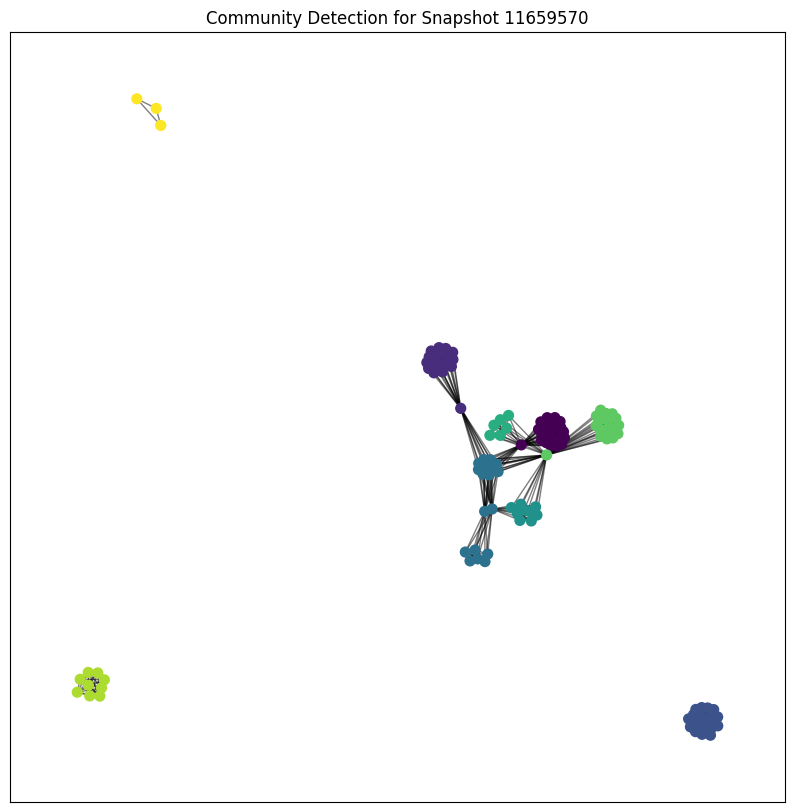

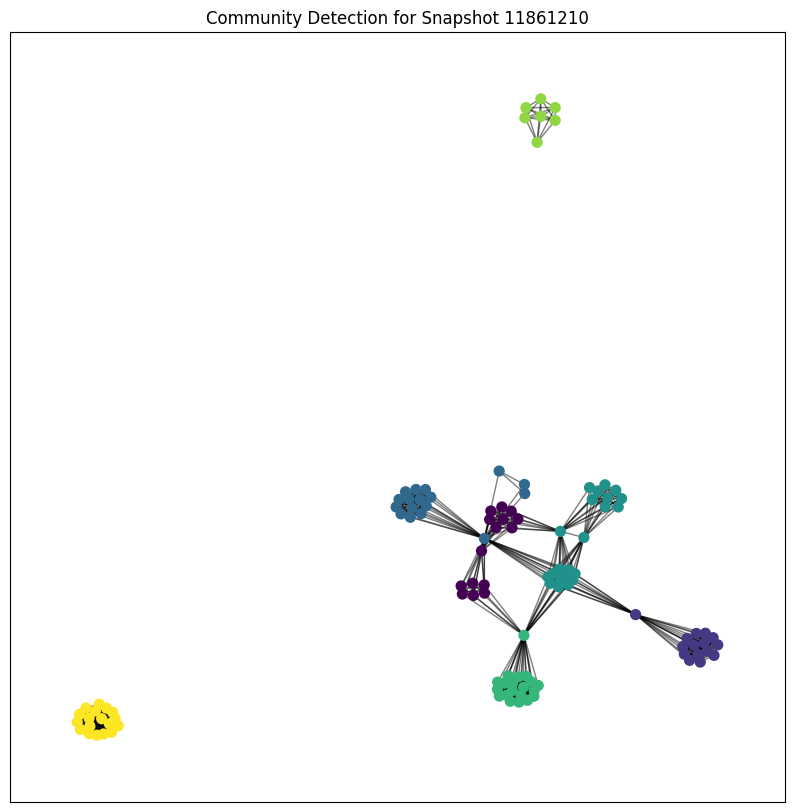

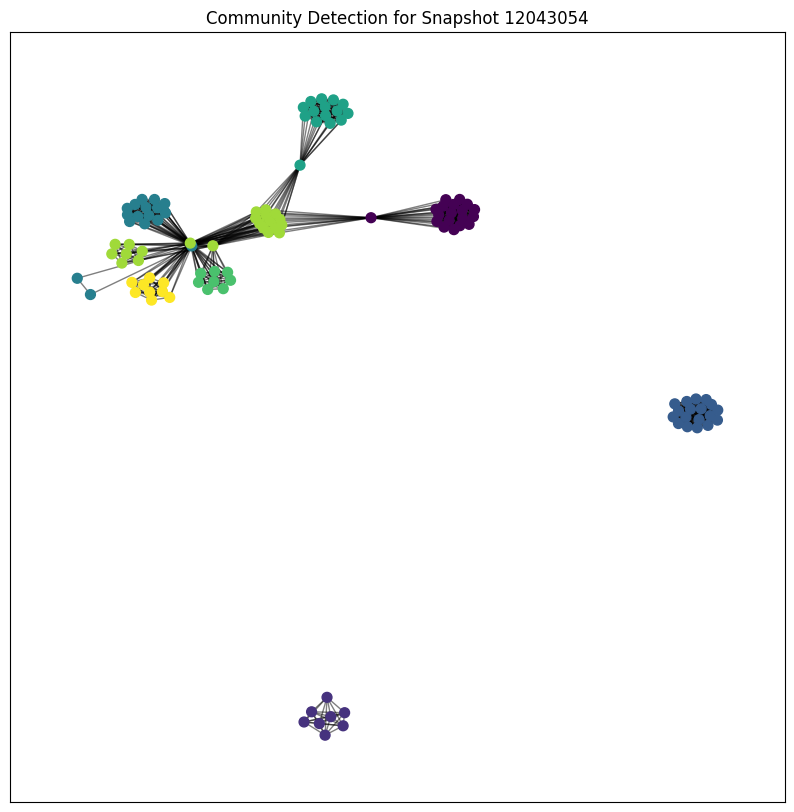

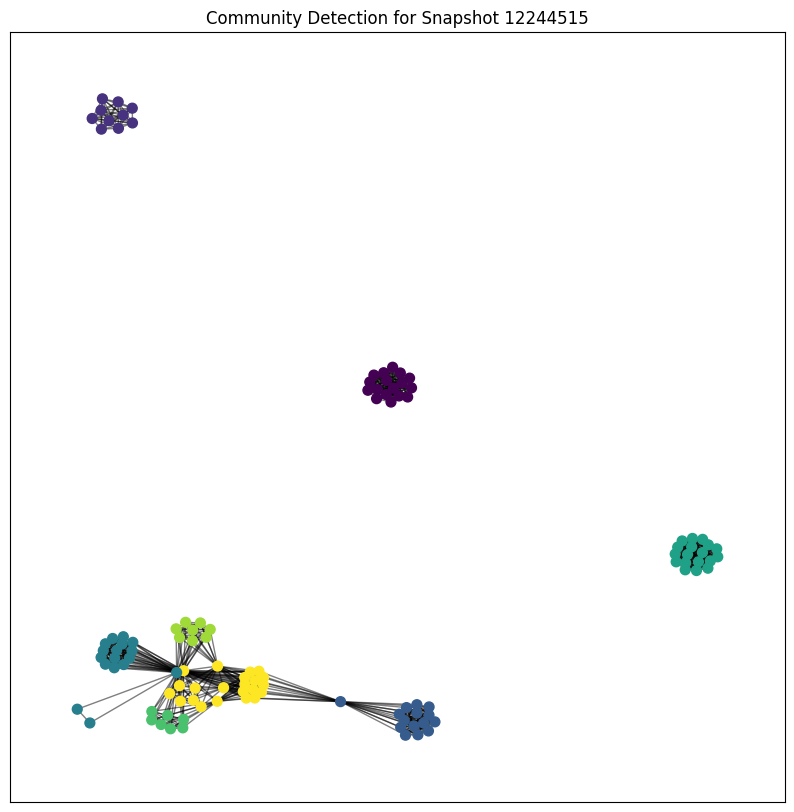

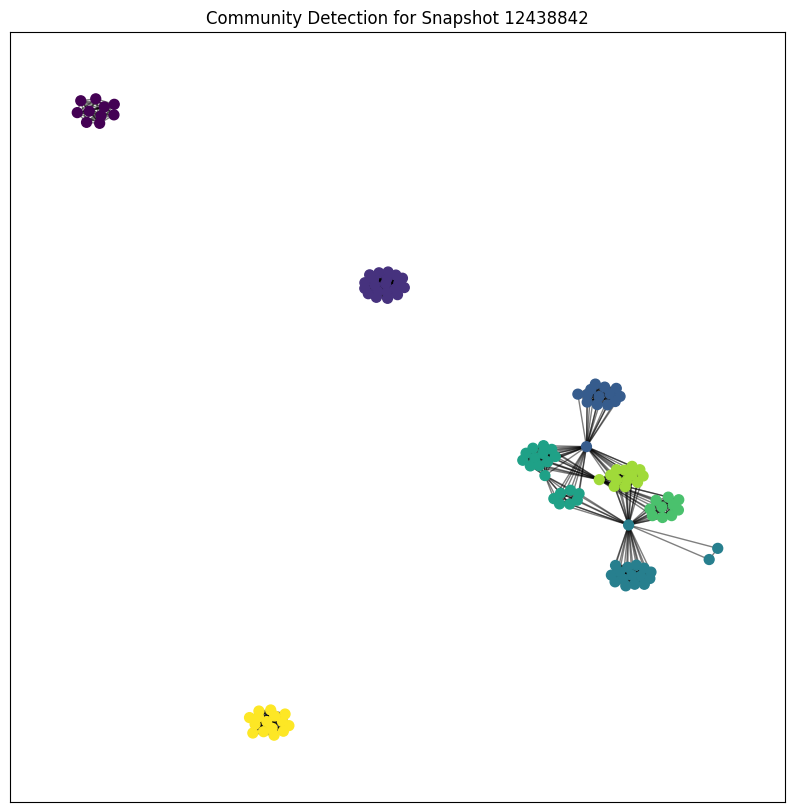

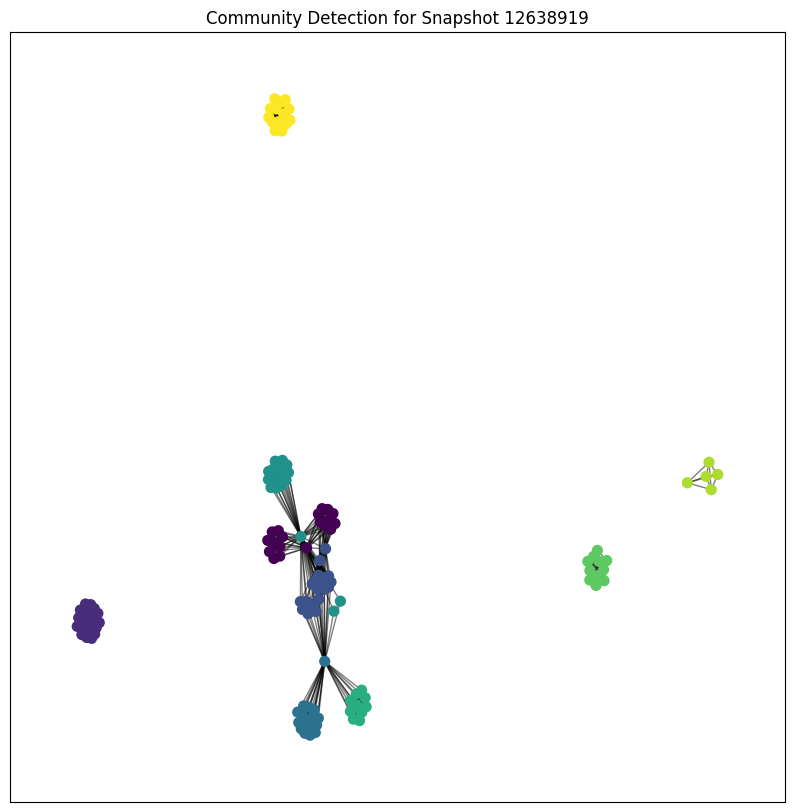

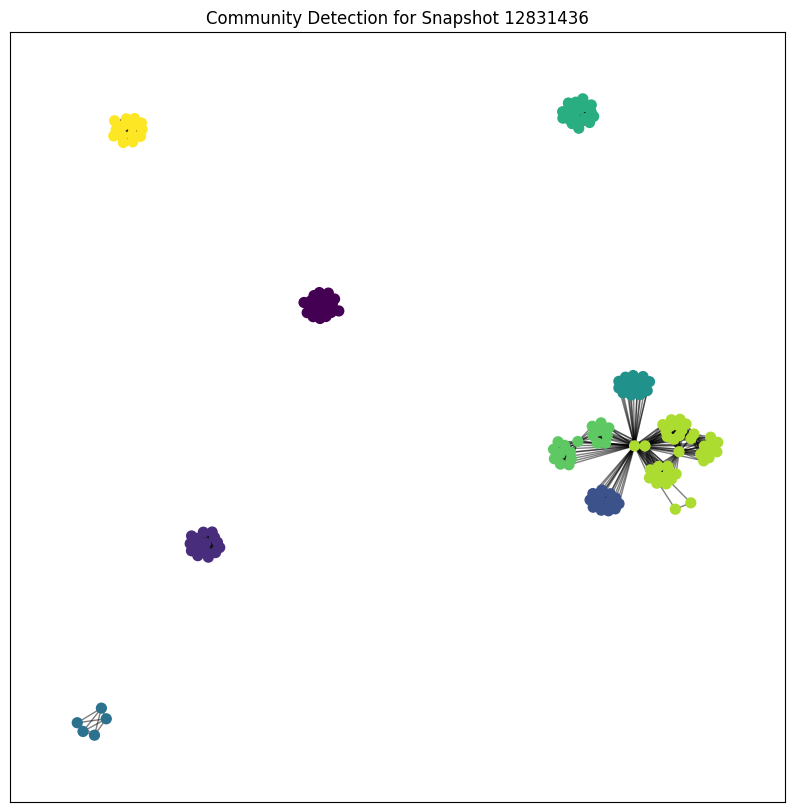

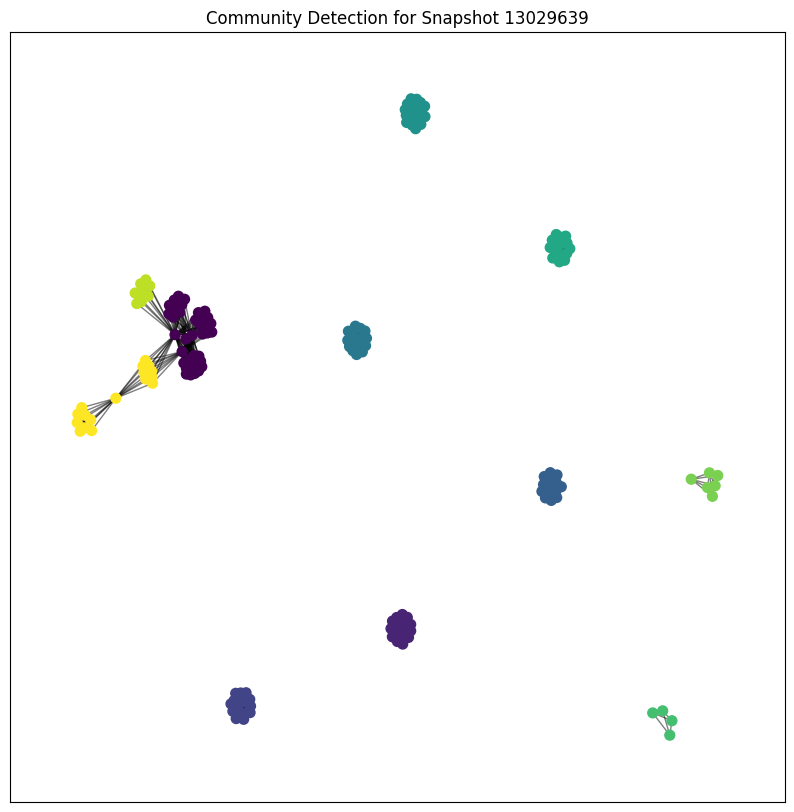

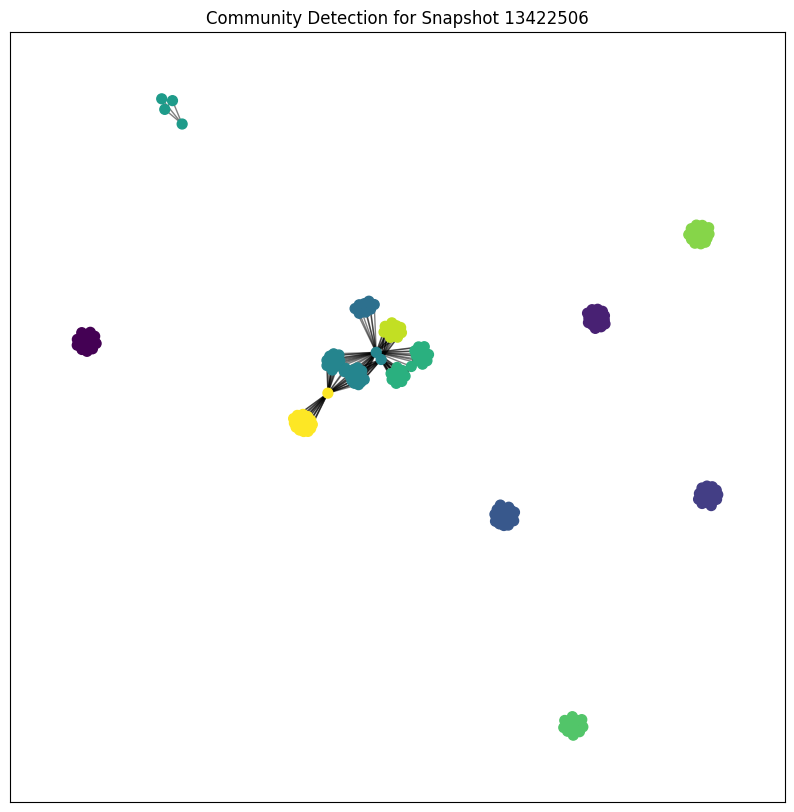

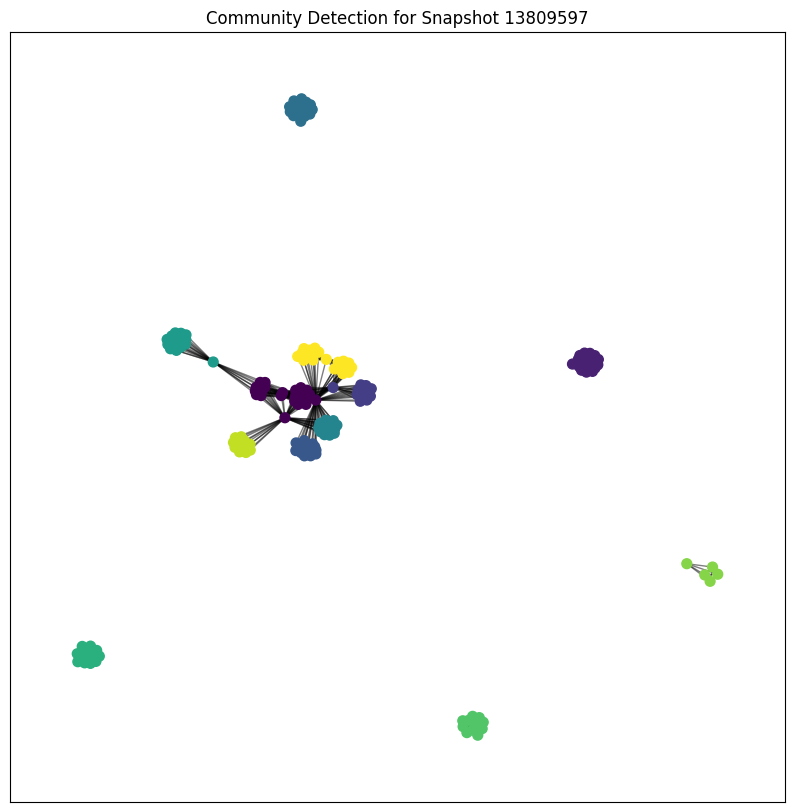

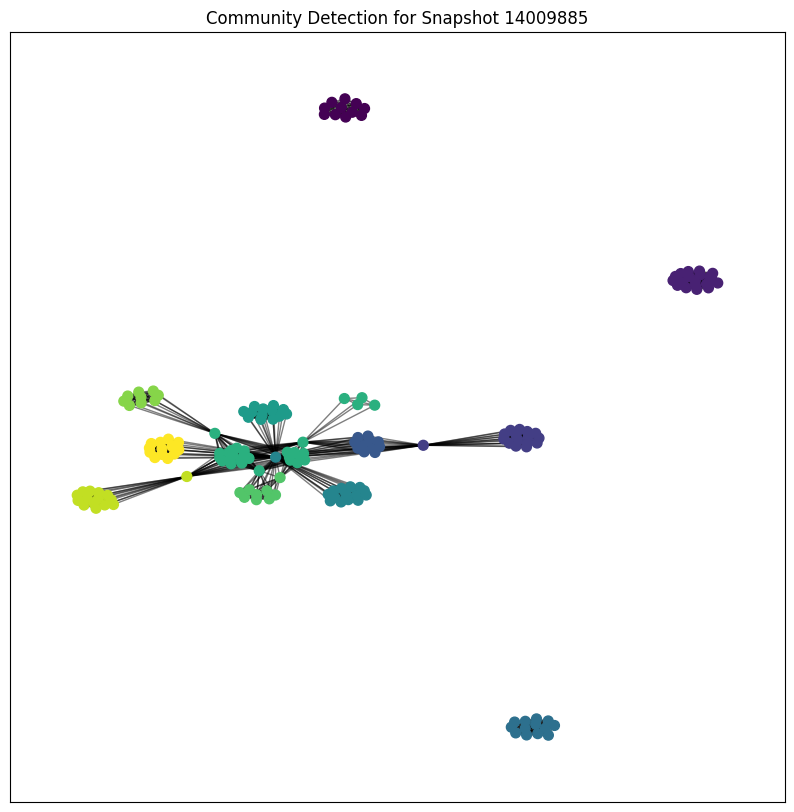

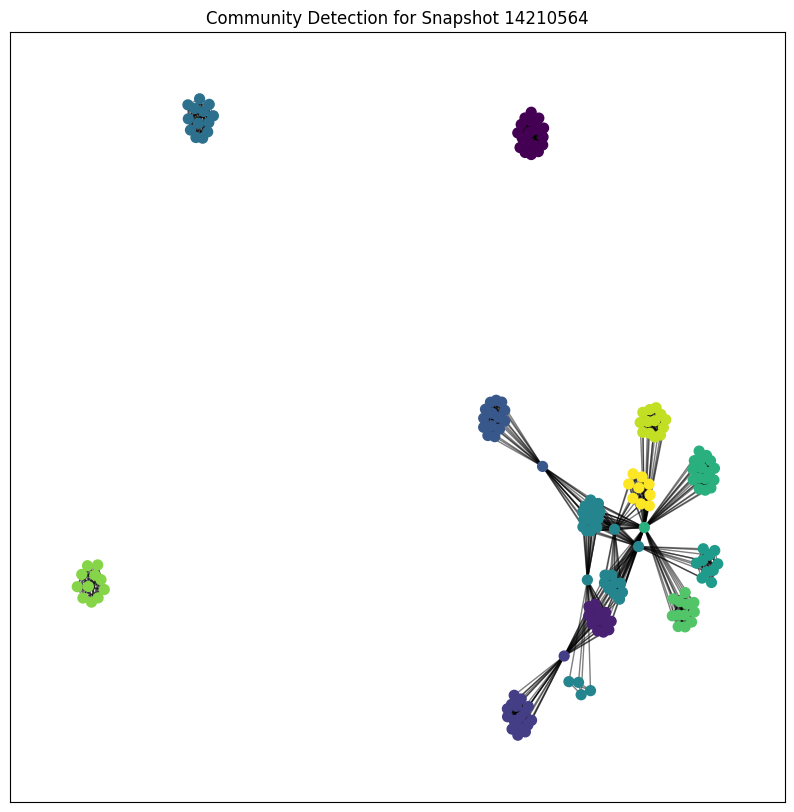

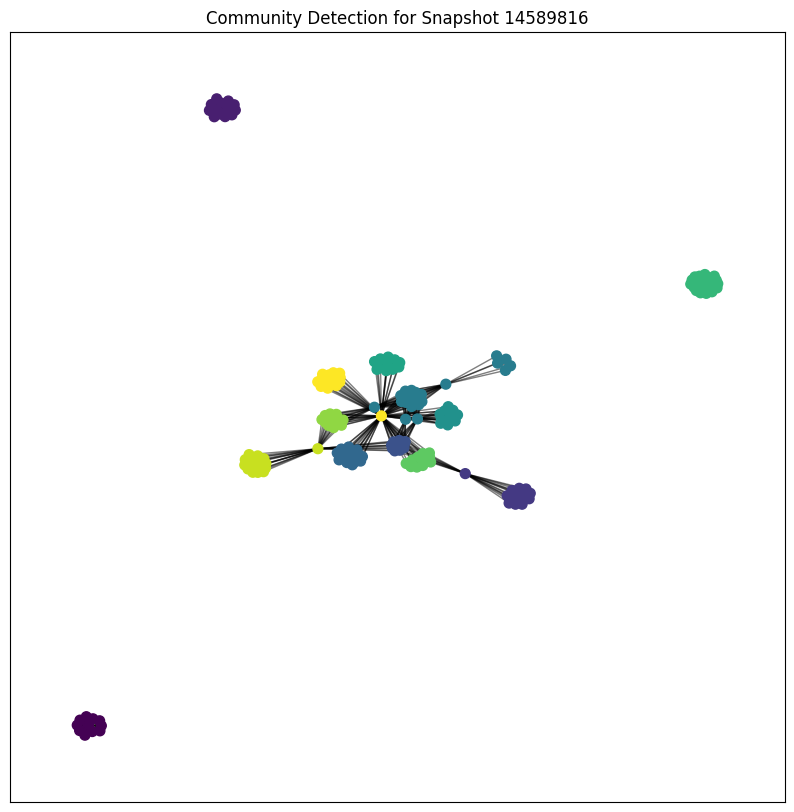

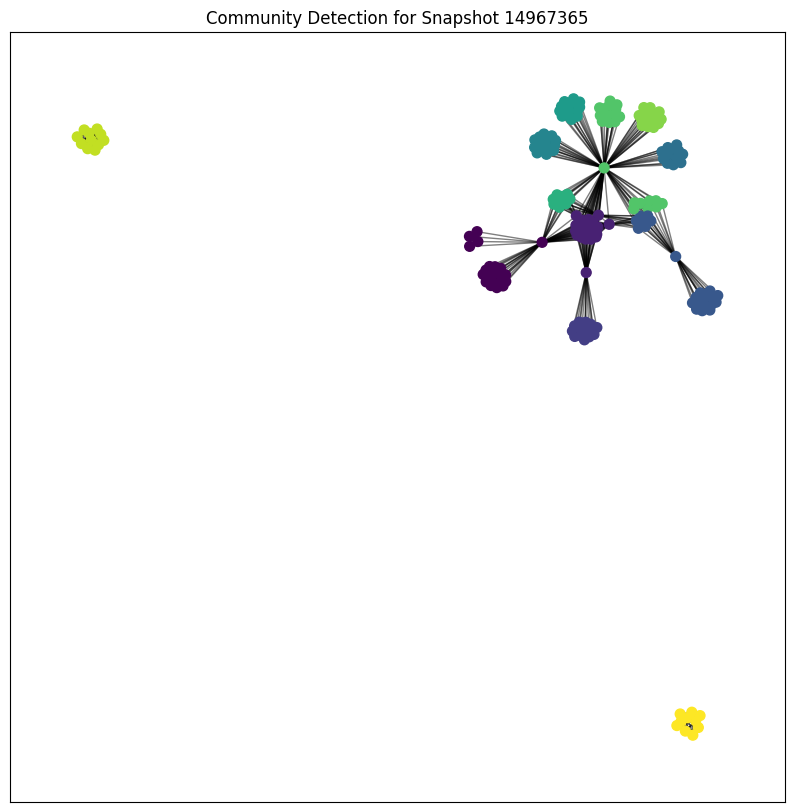

In [130]:
import os
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from os.path import join

# Step 1: Load the Graph Data
def load_graphs(graph_directory):
    graphs = {}
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            graphs[snapshot_time] = G
    return graphs

# Step 2: Apply Louvain Method for Community Detection
def detect_communities(graphs):
    communities = {}
    for snapshot_time, G in graphs.items():
        partition = community_louvain.best_partition(G)
        communities[snapshot_time] = partition
        # Set the community as an attribute for each node
        nx.set_node_attributes(G, partition, 'community')
    return communities

# Step 3: Visualize the Communities
def visualize_communities(graphs, communities):
    for snapshot_time, G in graphs.items():
        partition = communities[snapshot_time]
        pos = nx.spring_layout(G)
        plt.figure(figsize=(10, 10))
        cmap = plt.get_cmap('viridis')
        nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=list(partition.values()))
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        plt.title(f"Community Detection for Snapshot {snapshot_time}")
        plt.show()

# Path setup
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Load the graphs
graphs = load_graphs(graph_directory)

# Detect communities using Louvain method
communities = detect_communities(graphs)

# Visualize the communities
visualize_communities(graphs, communities)

# generating communities and saving them

import json

def save_communities(partition, filename):
    with open(filename, 'w') as file:
        json.dump(partition, file)

def load_communities(filename):
    with open(filename, 'r') as file:
        return json.load(file)

def generate_temporal_communities(graph_directory, enriched_graph_directory, token_info_path, save_directory):
    """
    Detect communities using the Louvain algorithm and adapt them across time.
    Save the community assignments to ensure consistency across runs.
    """
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    temporal_community_stats = []
    prev_partition = None

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            # Load the graphs using the correct naming convention
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)  # Match names exactly

            # Check if the enriched graph file exists
            if not os.path.exists(enriched_graph_file):
                print(f"Enriched graph file not found: {enriched_graph_file}")
                continue

            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Define path to save the community assignments
            community_file = join(save_directory, f"{filename}_communities.json")

            # Load existing community assignments if they exist, otherwise detect and save
            if os.path.exists(community_file):
                curr_partition = load_communities(community_file)
            else:
                # Apply community detection
                curr_partition = community_louvain.best_partition(G)
                save_communities(curr_partition, community_file)

            # Temporal smoothing: match communities with the previous snapshot
            if prev_partition is not None:
                curr_partition = match_communities_across_snapshots(prev_partition, curr_partition, G)

            # Update the graph with new community labels
            nx.set_node_attributes(G, curr_partition, 'community')

            # Label nodes with token names from the enriched graph
            community_token_stats = defaultdict(lambda: defaultdict(int))
            for node, data in G.nodes(data=True):
                community = data['community']
                if node in enriched_G.nodes():
                    token_address = enriched_G.nodes[node].get('token_address', '').lower()
                    token_name = token_map.get(token_address, 'Unknown Token')
                    community_token_stats[community][token_name] += 1

            # Store results for the current snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_token_stats.items():
                for token_name, count in tokens.items():
                    temporal_community_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Update previous partition for the next snapshot
            prev_partition = curr_partition

    # Convert to DataFrame for better display and analysis
    return pd.DataFrame(temporal_community_stats)


# Calculating modularity in temporal bound communities 

# Different approach do not run this code do not change this file

import os
import networkx as nx
import pandas as pd
from os.path import join
import community as community_louvain

def match_communities_across_snapshots(prev_partition, curr_partition):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def detect_and_save_temporal_communities_with_tokens(graph_directory, enriched_graph_directory, output_file, snapshot_dates, token_info_path):
    community_data = []
    prev_partition = None  # Initialize previous partition for temporal matching
    
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            G = nx.read_graphml(graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            curr_partition = community_louvain.best_partition(G)

            # Match communities across snapshots if there's a previous partition
            if prev_partition is not None:
                curr_partition = match_communities_across_snapshots(prev_partition, curr_partition)

            # Save current partition as previous for the next iteration
            prev_partition = curr_partition

            # Extract snapshot ID and date
            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            # Store the community and token data
            for node, community in curr_partition.items():
                token_address = enriched_G.nodes[node].get('token_address', '').lower() if node in enriched_G else None
                token_name = token_map.get(token_address, 'Unknown Token') if token_address else 'Unknown Token'
                
                community_data.append({
                    'Snapshot': snapshot_id,
                    'Date': snapshot_date,
                    'Node': node,
                    'Token': token_name,
                    'Community': community
                })

    # Save the community data to a CSV file
    community_df = pd.DataFrame(community_data)
    community_df.to_csv(output_file, index=False)
    print(f"Temporal community assignments with tokens saved to {output_file}")

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

# Snapshot dates (example)
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Run the temporal community detection and save the results with tokens
detect_and_save_temporal_communities_with_tokens(graph_directory, enriched_graph_directory, output_file, snapshot_dates, token_info_path)



In [131]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id, snapshot_dates):
    """Load and apply the saved community assignments to the graph nodes."""
    # Load the saved community data
    community_df = pd.read_csv(community_file)

    # Ensure that snapshot_id and community_df['Snapshot'] are both strings and stripped of whitespace
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Get the date corresponding to the snapshot_id
    snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')
    
    # Debugging: Print out the snapshot_id, snapshot_date, and a sample of the Snapshot column
    print(f"Filtering for Snapshot ID: {snapshot_id} with Date: {snapshot_date}")
    print("Available Snapshot IDs in the file:", community_df['Snapshot'].unique())

    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))

    # Apply the community labels to the graph nodes
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def analyze_graph_with_consistent_communities(graph_directory, community_file, snapshot_id, snapshot_dates):
    """Load the graph and apply consistent community assignments."""
    graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
    G = nx.read_graphml(graph_file)

    # Apply saved community assignments
    load_and_apply_saved_communities(G, community_file, snapshot_id, snapshot_dates)

    # Proceed with your analysis
    # For example, you can now analyze token distributions, community modularity, etc.
    # Here you would add the rest of your analysis code...

# Snapshot IDs and corresponding dates
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}
# Example usage
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_id = '11659570'  # Example snapshot ID

analyze_graph_with_consistent_communities(graph_directory, community_file, snapshot_id, snapshot_dates)


Filtering for Snapshot ID: 11659570 with Date: 2021-01
Available Snapshot IDs in the file: ['11659570' '11861210' '12043054' '12244515' '12438842' '12638919'
 '12831436' '13029639' '13230157' '13422506' '13620205' '13809597'
 '14009885' '14210564' '14391029' '14589816' '14779829' '14967365']


# Modularity comparison with temporal communities vs normal louvain

In [132]:
import pandas as pd
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]
    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_modularity(graph):
    """Calculate the modularity of the graph based on the community assignments."""
    # Create a dictionary where the key is the community and the value is a set of nodes in that community
    partition = defaultdict(set)
    for node, data in graph.nodes(data=True):
        community = data['community']
        partition[community].add(node)

    # Convert partition to a list of sets
    partition = list(partition.values())
    
    # Calculate modularity using networkx
    modularity = nx.algorithms.community.modularity(graph, partition)
    
    return modularity

def evaluate_modularity_saved_vs_louvain(graph_directory, community_file, snapshot_dates):
    """Compare the modularity of saved communities vs Louvain method across snapshots."""
    results = []

    for snapshot_id, snapshot_date in snapshot_dates.items():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Calculate modularity for saved communities
        load_and_apply_saved_communities(G, community_file, snapshot_id)
        modularity_saved = calculate_modularity(G)

        # Calculate modularity for Louvain method
        louvain_partition = community_louvain.best_partition(G)
        nx.set_node_attributes(G, louvain_partition, 'community')
        modularity_louvain = calculate_modularity(G)

        # Store results
        results.append({
            'Snapshot': snapshot_id,
            'Date': snapshot_date,
            'Modularity (Saved Communities)': modularity_saved,
            'Modularity (Louvain)': modularity_louvain
        })

    return results

# Paths and snapshot information
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Compare modularity scores between saved communities and Louvain method
modularity_comparison = evaluate_modularity_saved_vs_louvain(graph_directory, community_file, snapshot_dates)

# Convert the results to a DataFrame for better visualization and export
df_modularity_comparison = pd.DataFrame(modularity_comparison)

# Display the results
print(df_modularity_comparison)

# Optionally, save the results to a CSV file
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/modularity_comparison.csv'
df_modularity_comparison.to_csv(output_file, index=False)

    Snapshot     Date  Modularity (Saved Communities)  Modularity (Louvain)
0   11659570  2021-01                        0.761596              0.761596
1   11861210  2021-02                        0.750430              0.750430
2   12043054  2021-03                        0.723538              0.728361
3   12244515  2021-04                        0.736130              0.737543
4   12438842  2021-05                        0.727489              0.760034
5   12638919  2021-06                        0.703209              0.754211
6   12831436  2021-07                        0.723954              0.796290
7   13029639  2021-08                        0.788883              0.836190
8   13230157  2021-09                        0.788831              0.839862
9   13422506  2021-10                        0.774489              0.820208
10  13620205  2021-11                        0.752260              0.807611
11  13809597  2021-12                        0.729595              0.786257
12  14009885

# Community analysis

In [165]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    # Load the saved community data
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))

    # Apply the community labels to the graph nodes
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def analyze_community_sizes_for_snapshot(graph_directory, community_file, snapshot_id):
    """Analyze the community sizes for a specific snapshot."""
    graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
    G = nx.read_graphml(graph_file)

    # Apply saved community assignments
    load_and_apply_saved_communities(G, community_file, snapshot_id)

    # Calculate community sizes
    community_sizes = calculate_community_sizes(G)

    print(f"Community Sizes for Snapshot {snapshot_id}:")
    for community, size in community_sizes.items():
        print(f"Community {community}: {size} wallets")

    return community_sizes

# Paths and snapshot information
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_id = '11659570'  # Specific snapshot ID for analysis

# Analyze community sizes for snapshot 11659570
community_sizes = analyze_community_sizes_for_snapshot(graph_directory, community_file, snapshot_id)



Community Sizes for Snapshot 11659570:
Community 3: 21 wallets
Community 5: 17 wallets
Community 0: 19 wallets
Community 6: 8 wallets
Community 7: 6 wallets
Community 4: 17 wallets
Community 8: 9 wallets
Community 2: 3 wallets
Community 1: 18 wallets


In [166]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))

    # Apply the community and token labels to the graph nodes
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_community_tokens_for_snapshot(graph_directory, community_file, snapshot_id):
    """Analyze the community sizes and tokens for a specific snapshot."""
    graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
    G = nx.read_graphml(graph_file)

    # Apply saved community and token assignments
    load_and_apply_saved_communities(G, community_file, snapshot_id)

    # Analyze community sizes and tokens
    community_data = defaultdict(lambda: defaultdict(int))

    for node, data in G.nodes(data=True):
        community = data.get('community', 'Unknown')
        token = data.get('token', 'Unknown Token')
        community_data[community][token] += 1

    # Print results
    print(f"Community Sizes and Tokens for Snapshot {snapshot_id}:")
    for community, tokens in community_data.items():
        print(f"\nCommunity {community}:")
        total_size = sum(tokens.values())
        print(f"  Total Size: {total_size} wallets")
        for token, count in tokens.items():
            print(f"  Token {token}: {count} wallets")

    return community_data

# Paths and snapshot information
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_id = '11659570'  # Specific snapshot ID for analysis

# Analyze community sizes and tokens for snapshot 11659570
community_tokens = analyze_community_tokens_for_snapshot(graph_directory, community_file, snapshot_id)


Community Sizes and Tokens for Snapshot 11659570:

Community 3:
  Total Size: 21 wallets
  Token Maker: 21 wallets

Community 5:
  Total Size: 17 wallets
  Token Compound: 17 wallets

Community 0:
  Total Size: 19 wallets
  Token Sushi: 7 wallets
  Token Yearn Finance: 11 wallets
  Token Curve: 1 wallets

Community 6:
  Total Size: 8 wallets
  Token Curve: 8 wallets

Community 7:
  Total Size: 6 wallets
  Token Aave: 6 wallets

Community 4:
  Total Size: 17 wallets
  Token Uniswap: 16 wallets
  Token Curve: 1 wallets

Community 8:
  Total Size: 9 wallets
  Token Balancer: 9 wallets

Community 2:
  Total Size: 3 wallets
  Token 1Inch: 3 wallets

Community 1:
  Total Size: 18 wallets
  Token Lido: 18 wallets


In [167]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots."""
    community_size_over_time = defaultdict(lambda: defaultdict(int))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community sizes for this snapshot
        community_sizes = calculate_community_sizes(G)

        # Store the community sizes with respect to the snapshot date
        snapshot_date = snapshot_dates[snapshot_id]
        for community, size in community_sizes.items():
            community_size_over_time[community][snapshot_date] = size

    return community_size_over_time

def calculate_community_growth(community_size_over_time):
    """Calculate the growth of each community over the entire period."""
    community_growth = {}

    for community, sizes in community_size_over_time.items():
        sorted_dates = sorted(sizes.keys())
        initial_size = sizes[sorted_dates[0]]
        final_size = sizes[sorted_dates[-1]]
        growth = final_size - initial_size
        community_growth[community] = growth

    return community_growth

def find_community_with_max_growth(community_growth):
    """Identify the community with the maximum growth."""
    max_growth_community = max(community_growth, key=community_growth.get)
    max_growth = community_growth[max_growth_community]
    return max_growth_community, max_growth

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth over the entire period
community_size_over_time = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Calculate the growth of each community
community_growth = calculate_community_growth(community_size_over_time)

# Find the community with the maximum growth
max_growth_community, max_growth = find_community_with_max_growth(community_growth)

# Output the result
print(f"The community that grew the most is Community {max_growth_community} with a growth of {max_growth} wallets.")


The community that grew the most is Community 1 with a growth of 38 wallets.


import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community and token
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates):
    """Analyze how tokens are distributed within each community across snapshots."""
    token_distribution_over_time = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    all_dates = set(snapshot_dates.values())

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Analyze token distribution within communities
        for node, data in G.nodes(data=True):
            community = str(data.get('community', 'Unknown'))  # Convert community IDs to strings
            token = data.get('token', 'Unknown Token')
            snapshot_date = snapshot_dates[snapshot_id]
            token_distribution_over_time[community][token][snapshot_date] += 1

        # Ensure every token has an entry for each date, even if it's 0
        for community in token_distribution_over_time:
            for token in token_distribution_over_time[community]:
                for date in all_dates:
                    if date not in token_distribution_over_time[community][token]:
                        token_distribution_over_time[community][token][date] = 0

    return token_distribution_over_time

def plot_token_distribution_grid(token_distribution_over_time, community_ids):
    """Plot a grid of token distribution over time for multiple communities."""
    # Set up the grid for plotting
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to easily iterate over a 1D array of axes

    # Sort the community IDs to ensure they are plotted in order
    community_ids_sorted = sorted(community_ids, key=lambda x: int(x))

    for i, community_id in enumerate(community_ids_sorted):
        if i >= len(axes):  # Prevent index error if there are more communities than axes
            break

        community_data = token_distribution_over_time.get(community_id, {})
        
        if not community_data:
            print(f"No token distribution data available for Community {community_id}.")
            continue

        # Extract dates and tokens for plotting
        all_dates = sorted(set(date for token in community_data.values() for date in token.keys()), key=pd.to_datetime)
        tokens = sorted(community_data.keys())

        # Prepare data for plotting
        data = {token: [] for token in tokens}
        for date in all_dates:
            for token in tokens:
                data[token].append(community_data[token].get(date, 0))

        # Convert dates to a datetime format for plotting
        all_dates = pd.to_datetime(all_dates)

        # Plot each subplot
        bottom = [0] * len(all_dates)
        bar_width = 25  # Width for bars to be visible
        for token in tokens:
            axes[i].bar(all_dates, data[token], bottom=bottom, width=bar_width, label=token, align='center')
            bottom = [i + j for i, j in zip(bottom, data[token])]

        axes[i].set_xlabel("Date")
        axes[i].set_ylabel(f"Community {community_id} Size")
        axes[i].set_title(f"Community {community_id}")
        axes[i].tick_params(axis='x', rotation=45)
        
        # Position legend outside the plot area
        axes[i].legend(title="Tokens", fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # Adjust right margin to fit legends
    plt.show()

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Analyze token distribution in communities
token_distribution_over_time = analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates)

# Check available communities before plotting
available_communities = list(token_distribution_over_time.keys())
print("Available Communities:", available_communities)

# Plot the grid of token distributions for the first 10 communities
plot_token_distribution_grid(token_distribution_over_time, community_ids=available_communities[:10])


In [205]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community and token
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates):
    """Analyze how tokens are distributed within each community across snapshots."""
    token_distribution_over_time = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    all_dates = set(snapshot_dates.values())

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Analyze token distribution within communities
        for node, data in G.nodes(data=True):
            community = str(data.get('community', 'Unknown'))  # Convert community IDs to strings
            token = data.get('token', 'Unknown Token')
            snapshot_date = snapshot_dates[snapshot_id]
            token_distribution_over_time[community][token][snapshot_date] += 1

        # Ensure every token has an entry for each date, even if it's 0
        for community in token_distribution_over_time:
            for token in token_distribution_over_time[community]:
                for date in all_dates:
                    if date not in token_distribution_over_time[community][token]:
                        token_distribution_over_time[community][token][date] = 0

    return token_distribution_over_time

def plot_token_distribution_over_time(token_distribution_over_time, community_id):
    """Plot the token distribution over time for a specific community."""
    # Check if the community exists in the data
    if community_id not in token_distribution_over_time:
        print(f"No data found for Community {community_id}.")
        return
    
    community_data = token_distribution_over_time[community_id]
    
    # Check if there is any data for the community
    if not community_data:
        print(f"No token distribution data available for Community {community_id}.")
        return

    # Extract dates and tokens for plotting
    all_dates = sorted(set(date for token in community_data.values() for date in token.keys()), key=pd.to_datetime)
    tokens = sorted(community_data.keys())

    # Prepare data for plotting
    data = {token: [] for token in tokens}
    for date in all_dates:
        for token in tokens:
            data[token].append(community_data[token].get(date, 0))

    # Convert dates to a datetime format for plotting
    all_dates = pd.to_datetime(all_dates)

    # Plot the stacked bar chart with original settings
    plt.figure(figsize=(12, 8))
    bottom = [0] * len(all_dates)
    bar_width = 25  # Adjust width to make bars thicker and more visible
    for token in tokens:
        plt.bar(all_dates, data[token], bottom=bottom, width=bar_width, label=token, align='center')
        bottom = [i + j for i, j in zip(bottom, data[token])]

    plt.xlabel("Date")
    plt.ylabel(f"Community {community_id} Size (Number of Wallets)")
    plt.title(f"Token Distribution in Community {community_id} Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Tokens", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Analyze token distribution in communities
token_distribution_over_time = analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates)

# Check available communities before plotting
print("Available Communities:", list(token_distribution_over_time.keys()))

# Plot the token distribution for a specific community (e.g., Community '0')
plot_token_distribution_over_time(token_distribution_over_time, community_id='0')




Available Communities: ['3', '5', '0', '6', '7', '4', '8', '2', '1', '9', '10']


Available Communities: ['3', '5', '0', '6', '7', '4', '8', '2', '1', '9', '10']


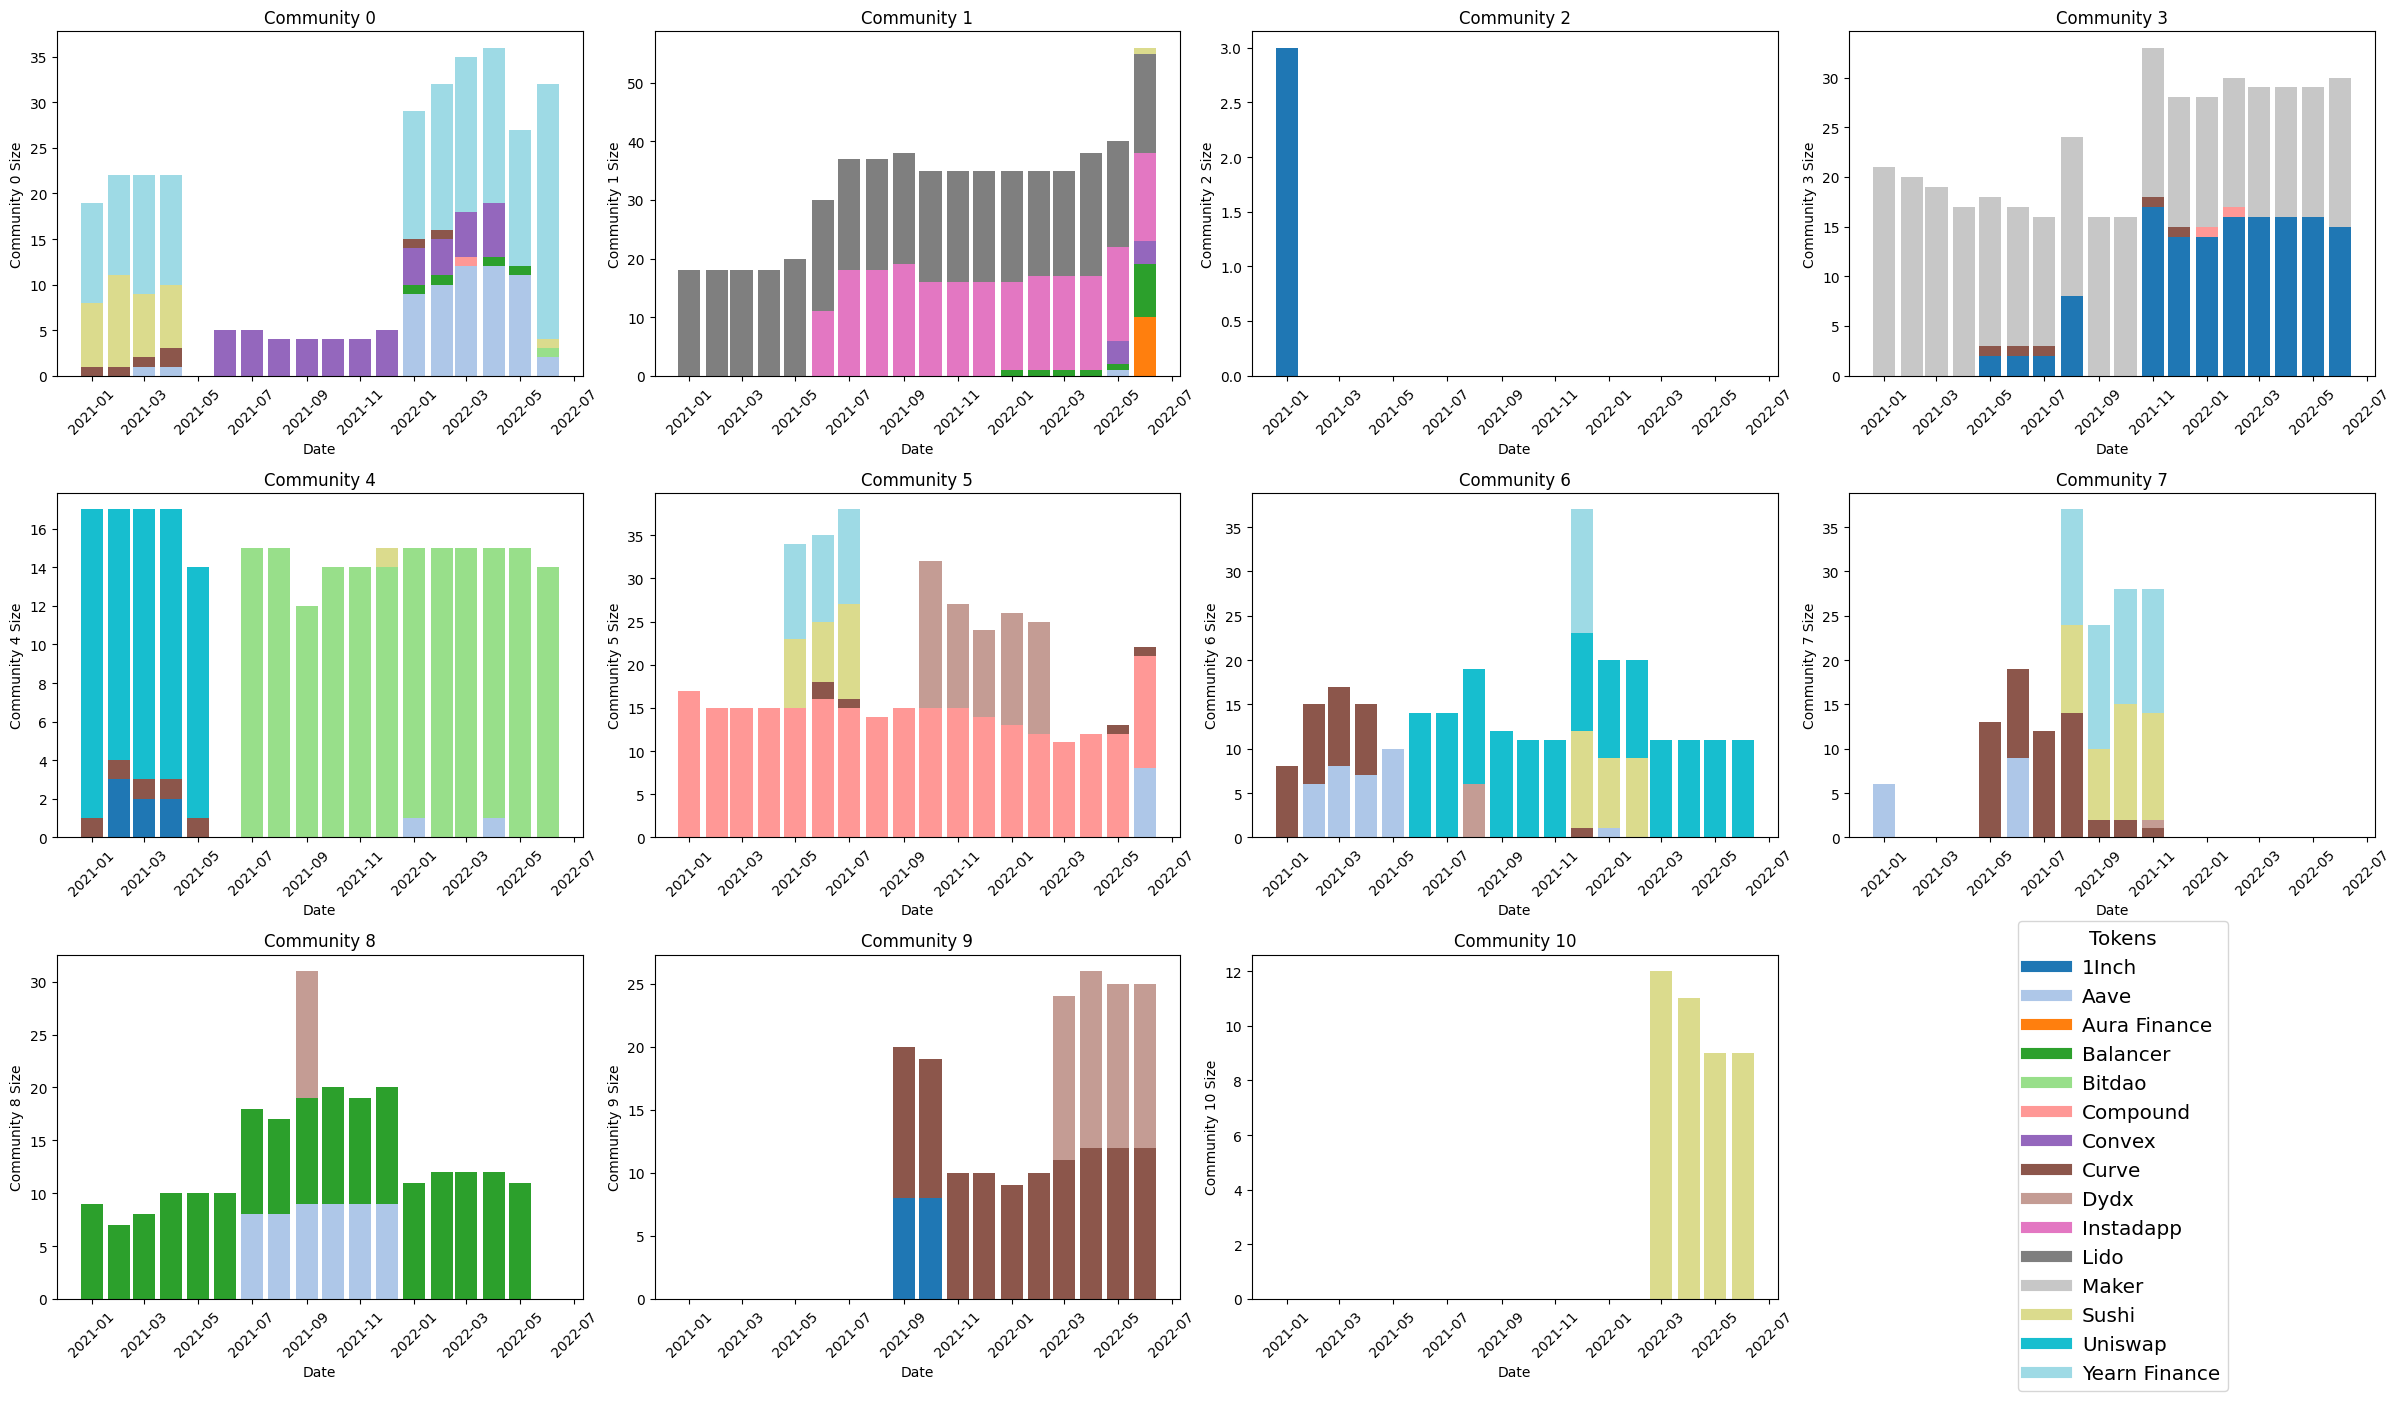

In [235]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community and token
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates):
    """Analyze how tokens are distributed within each community across snapshots."""
    token_distribution_over_time = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    all_dates = set(snapshot_dates.values())

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Analyze token distribution within communities
        for node, data in G.nodes(data=True):
            community = str(data.get('community', 'Unknown'))  # Convert community IDs to strings
            token = data.get('token', 'Unknown Token')
            snapshot_date = snapshot_dates[snapshot_id]
            token_distribution_over_time[community][token][snapshot_date] += 1

        # Ensure every token has an entry for each date, even if it's 0
        for community in token_distribution_over_time:
            for token in token_distribution_over_time[community]:
                for date in all_dates:
                    if date not in token_distribution_over_time[community][token]:
                        token_distribution_over_time[community][token][date] = 0

    return token_distribution_over_time

def plot_token_distribution_grid(token_distribution_over_time, community_ids):
    """Plot a grid of token distribution over time for multiple communities with a single legend in the bottom right corner."""
    # Set up the grid for plotting
    fig, axes = plt.subplots(3, 4, figsize=(28, 14))  # Make the figure larger
    axes = axes.flatten()  # Flatten to easily iterate over a 1D array of axes

    # Sort the community IDs to ensure they are plotted in order
    community_ids_sorted = sorted(community_ids, key=lambda x: int(x))

    # Collect all tokens to create a consistent color palette
    all_tokens = sorted(set(token for community_data in token_distribution_over_time.values() for token in community_data.keys()))
    color_map = plt.get_cmap('tab20', len(all_tokens))  # Use plt.get_cmap instead of plt.cm.get_cmap
    token_colors = {token: color_map(i) for i, token in enumerate(all_tokens)}

    for i, community_id in enumerate(community_ids_sorted):
        if i >= len(axes):  # Prevent index error if there are more communities than axes
            break

        community_data = token_distribution_over_time.get(community_id, {})
        
        if not community_data:
            print(f"No token distribution data available for Community {community_id}.")
            continue

        # Extract dates and tokens for plotting
        all_dates = sorted(set(date for token in community_data.values() for date in token.keys()), key=pd.to_datetime)
        all_dates = [date for date in all_dates if date <= '2022-06']  # Limit x-axis to end at 2022-06
        tokens = sorted(community_data.keys())

        # Prepare data for plotting
        data = {token: [] for token in tokens}
        for date in all_dates:
            for token in tokens:
                data[token].append(community_data[token].get(date, 0))

        # Convert dates to a datetime format for plotting
        all_dates = pd.to_datetime(all_dates)

        # Plot each subplot
        bottom = [0] * len(all_dates)
        bar_width = 25  # Width for bars to be visible
        for token in tokens:
            axes[i].bar(all_dates, data[token], bottom=bottom, width=bar_width, color=token_colors[token], align='center')
            bottom = [i + j for i, j in zip(bottom, data[token])]

        axes[i].set_xlabel("Date")
        axes[i].set_ylabel(f"Community {community_id} Size")
        axes[i].set_title(f"Community {community_id}")
        axes[i].tick_params(axis='x', rotation=45)

    # Hide the last subplot (bottom right corner) to place the legend there
    axes[-1].axis('off')  # Turn off the 12th subplot

    # Create a single, larger legend for all tokens in the bottom right corner
    handles = [plt.Line2D([0], [0], color=token_colors[token], linewidth=8) for token in all_tokens]
    labels = all_tokens
    fig.legend(handles, labels, title="Tokens", loc='center', bbox_to_anchor=(0.76, 0.17), fontsize='x-large', title_fontsize='x-large')

    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # Adjust right margin to fit the legend
    plt.show()

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Analyze token distribution in communities
token_distribution_over_time = analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates)

# Check available communities before plotting
available_communities = list(token_distribution_over_time.keys())
print("Available Communities:", available_communities)

# Plot the grid of token distributions for all 11 communities
plot_token_distribution_grid(token_distribution_over_time, community_ids=available_communities[:11])


# Final token graph

Available Communities: ['3', '5', '0', '6', '7', '4', '8', '2', '1', '9', '10']


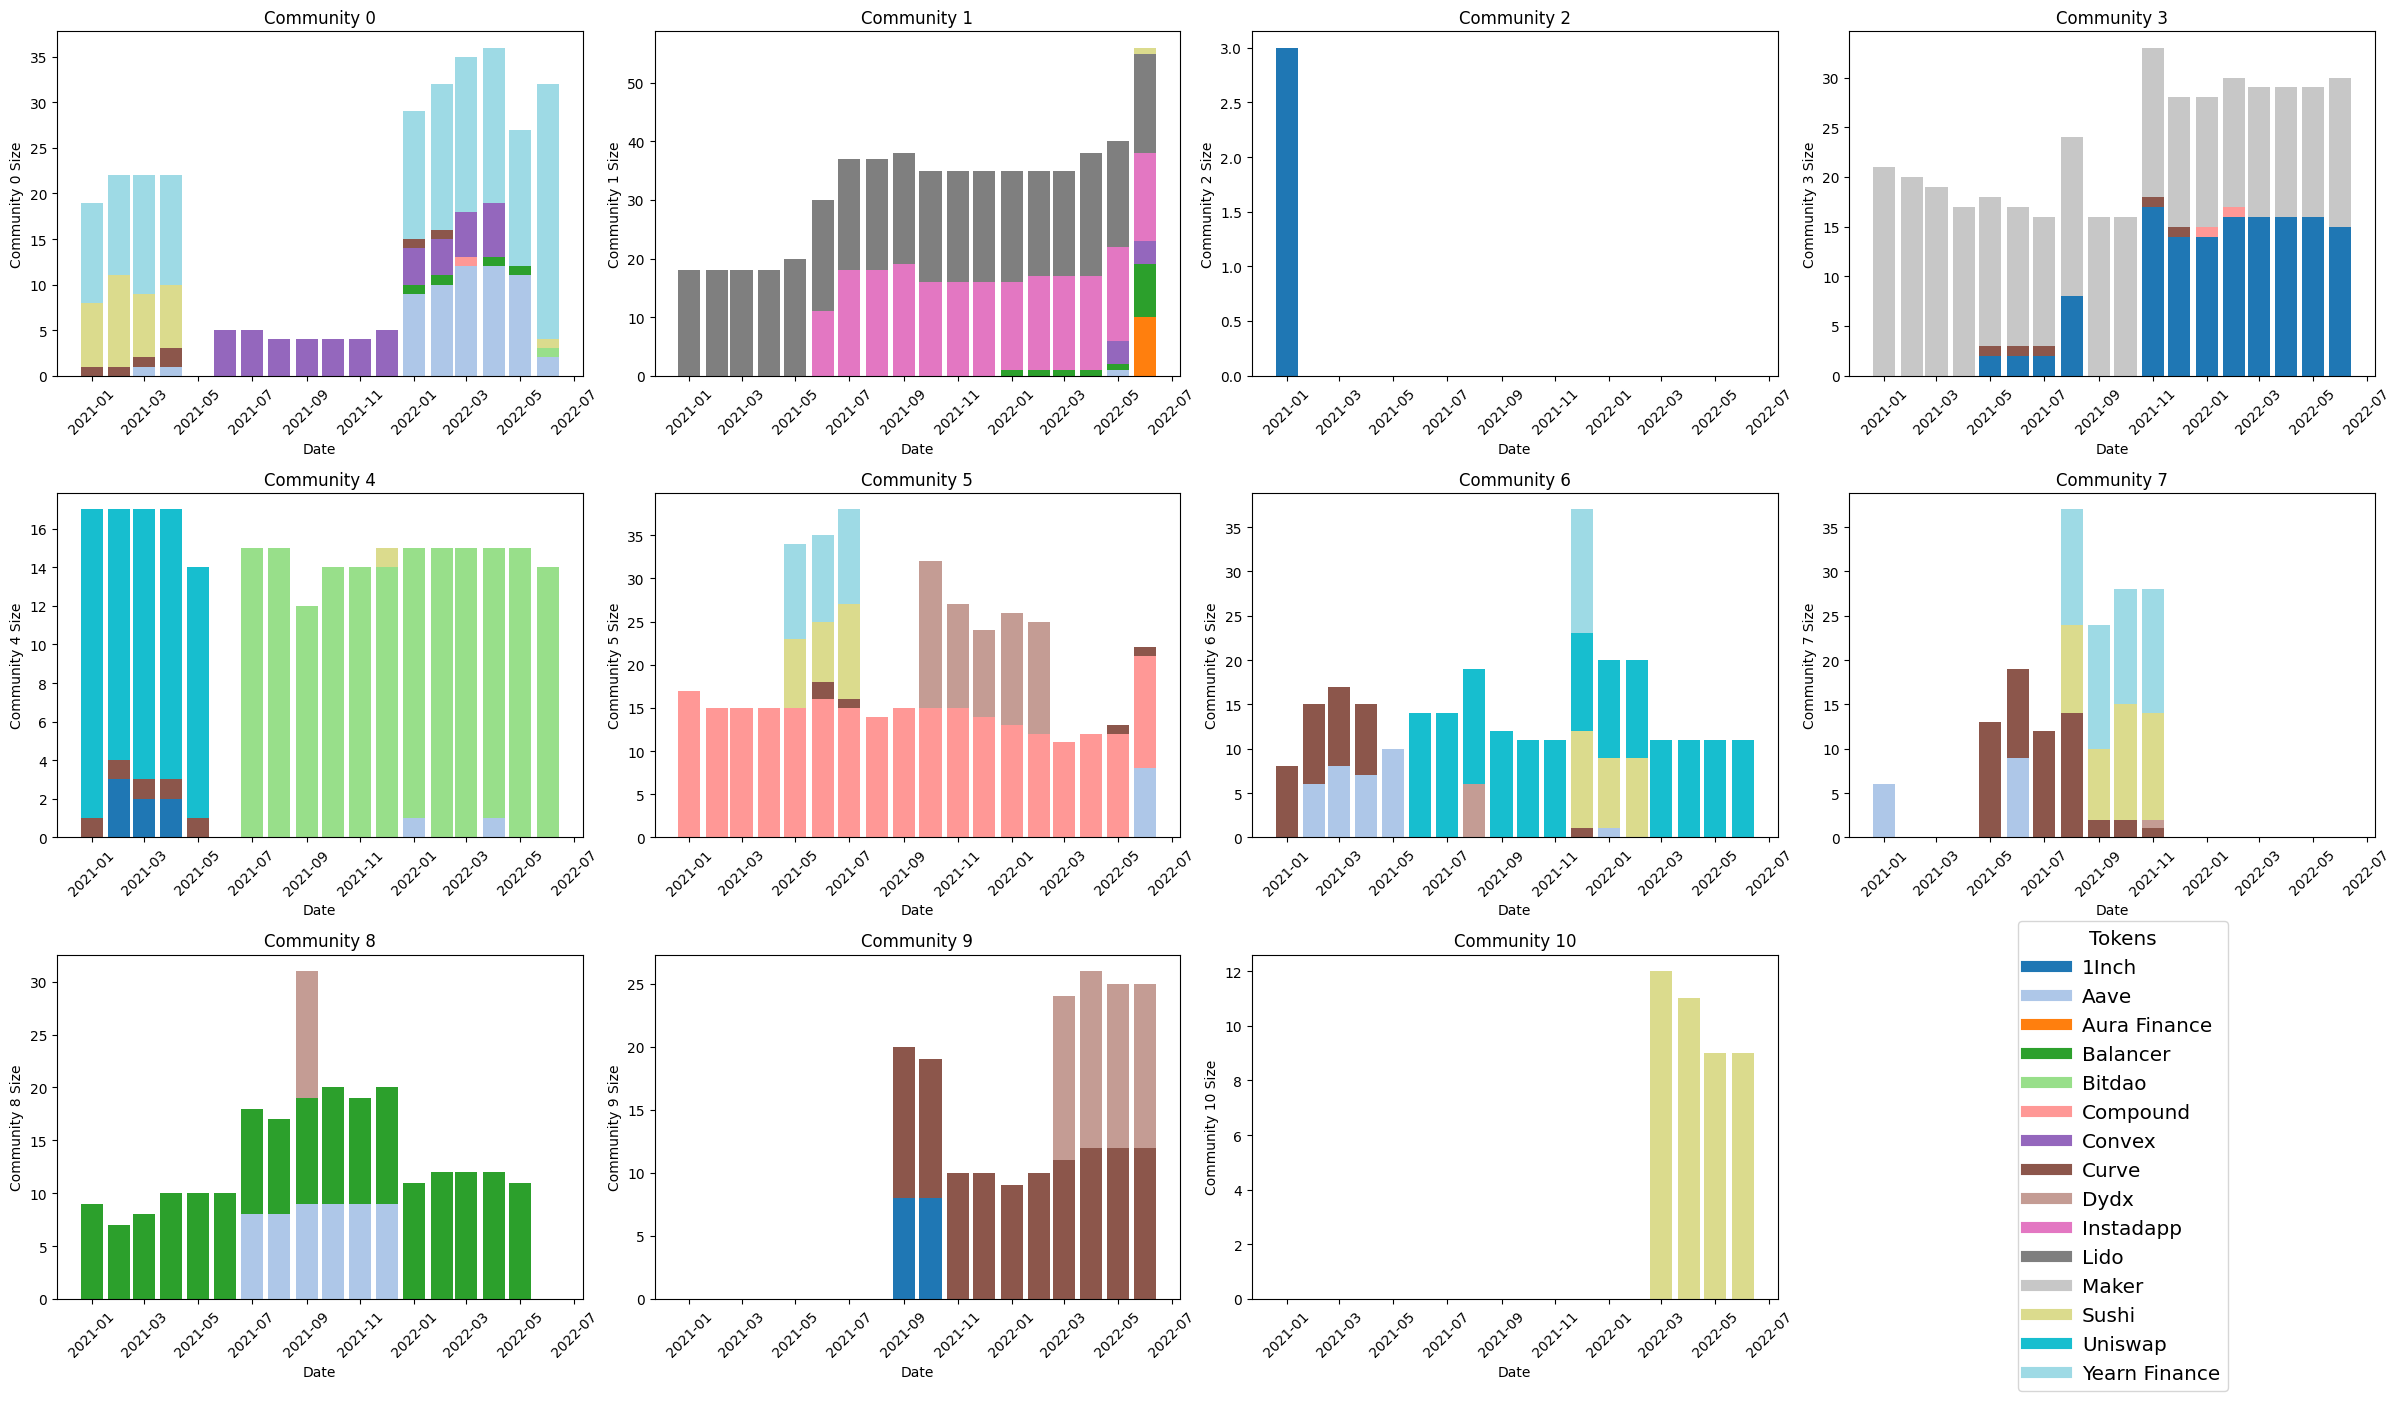

In [236]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community and token
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates):
    """Analyze how tokens are distributed within each community across snapshots."""
    token_distribution_over_time = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    all_dates = set(snapshot_dates.values())

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Analyze token distribution within communities
        for node, data in G.nodes(data=True):
            community = str(data.get('community', 'Unknown'))  # Convert community IDs to strings
            token = data.get('token', 'Unknown Token')
            snapshot_date = snapshot_dates[snapshot_id]
            token_distribution_over_time[community][token][snapshot_date] += 1

        # Ensure every token has an entry for each date, even if it's 0
        for community in token_distribution_over_time:
            for token in token_distribution_over_time[community]:
                for date in all_dates:
                    if date not in token_distribution_over_time[community][token]:
                        token_distribution_over_time[community][token][date] = 0

    return token_distribution_over_time

def plot_token_distribution_grid(token_distribution_over_time, community_ids):
    """Plot a grid of token distribution over time for multiple communities with a single legend in the bottom right corner."""
    # Set up the grid for plotting
    fig, axes = plt.subplots(3, 4, figsize=(28, 14))  # Make the figure larger
    axes = axes.flatten()  # Flatten to easily iterate over a 1D array of axes

    # Sort the community IDs to ensure they are plotted in order
    community_ids_sorted = sorted(community_ids, key=lambda x: int(x))

    # Collect all tokens to create a consistent color palette
    all_tokens = sorted(set(token for community_data in token_distribution_over_time.values() for token in community_data.keys()))
    color_map = plt.get_cmap('tab20', len(all_tokens))  # Use plt.get_cmap instead of plt.cm.get_cmap
    token_colors = {token: color_map(i) for i, token in enumerate(all_tokens)}

    for i, community_id in enumerate(community_ids_sorted):
        if i >= len(axes):  # Prevent index error if there are more communities than axes
            break

        community_data = token_distribution_over_time.get(community_id, {})
        
        if not community_data:
            print(f"No token distribution data available for Community {community_id}.")
            continue

        # Extract dates and tokens for plotting
        all_dates = sorted(set(date for token in community_data.values() for date in token.keys()), key=pd.to_datetime)
        all_dates = [date for date in all_dates if date <= '2022-06']  # Limit x-axis to end at 2022-06
        tokens = sorted(community_data.keys())

        # Prepare data for plotting
        data = {token: [] for token in tokens}
        for date in all_dates:
            for token in tokens:
                data[token].append(community_data[token].get(date, 0))

        # Convert dates to a datetime format for plotting
        all_dates = pd.to_datetime(all_dates)

        # Plot each subplot
        bottom = [0] * len(all_dates)
        bar_width = 25  # Width for bars to be visible
        for token in tokens:
            axes[i].bar(all_dates, data[token], bottom=bottom, width=bar_width, color=token_colors[token], align='center')
            bottom = [i + j for i, j in zip(bottom, data[token])]

        axes[i].set_xlabel("Date")
        axes[i].set_ylabel(f"Community {community_id} Size")
        axes[i].set_title(f"Community {community_id}")
        axes[i].tick_params(axis='x', rotation=45)

    # Hide the last subplot (bottom right corner) to place the legend there
    axes[-1].axis('off')  # Turn off the 12th subplot

    # Create a single, larger legend for all tokens in the bottom right corner
    handles = [plt.Line2D([0], [0], color=token_colors[token], linewidth=8) for token in all_tokens]
    labels = all_tokens
    fig.legend(handles, labels, title="Tokens", loc='center', bbox_to_anchor=(0.76, 0.17), fontsize='x-large', title_fontsize='x-large')

    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # Adjust right margin to fit the legend
    plt.show()

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Analyze token distribution in communities
token_distribution_over_time = analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates)

# Check available communities before plotting
available_communities = list(token_distribution_over_time.keys())
print("Available Communities:", available_communities)

# Plot the grid of token distributions for all 11 communities
plot_token_distribution_grid(token_distribution_over_time, community_ids=available_communities[:11])

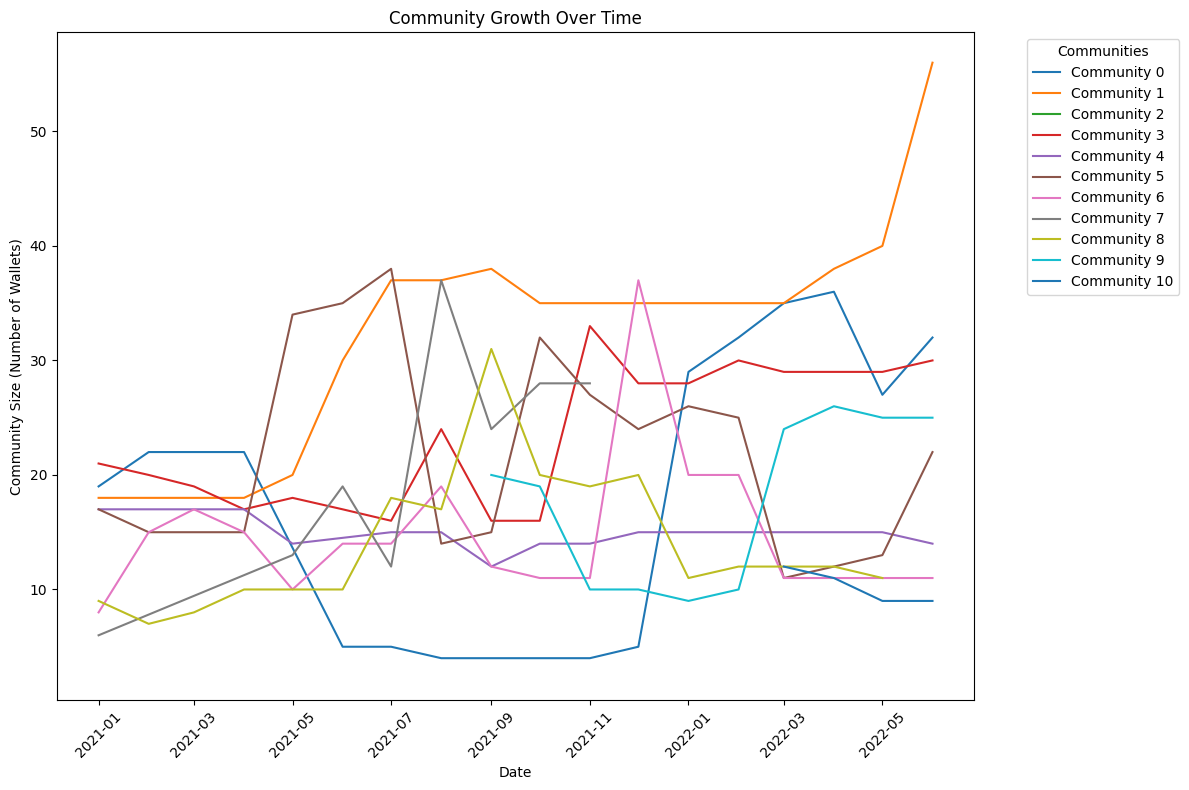

In [178]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots."""
    community_size_over_time = defaultdict(lambda: defaultdict(int))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community sizes for this snapshot
        community_sizes = calculate_community_sizes(G)

        # Store the community sizes with respect to the snapshot date
        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  # Convert to datetime
        for community, size in community_sizes.items():
            community_size_over_time[community][snapshot_date] = size

    return community_size_over_time

def plot_community_growth_over_time(community_size_over_time):
    """Plot the community growth over time."""
    plt.figure(figsize=(12, 8))

    # Sort the community labels numerically to ensure order from 0 to 11
    sorted_communities = sorted(community_size_over_time.keys(), key=lambda x: int(x) if x.isdigit() else float('inf'))

    for community in sorted_communities:
        if community != 'Unknown':  # Exclude 'Unknown' communities from plotting
            sizes = community_size_over_time[community]
            dates = sorted(sizes.keys())  # Ensure dates are sorted
            sizes_over_time = [sizes[date] for date in dates]
            plt.plot(dates, sizes_over_time, label=f'Community {community}')

    plt.xlabel("Date")
    plt.ylabel("Community Size (Number of Wallets)")
    plt.title("Community Growth Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth over the entire period
community_size_over_time = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Plot the community growth over time
plot_community_growth_over_time(community_size_over_time)



# Size ratio of each community

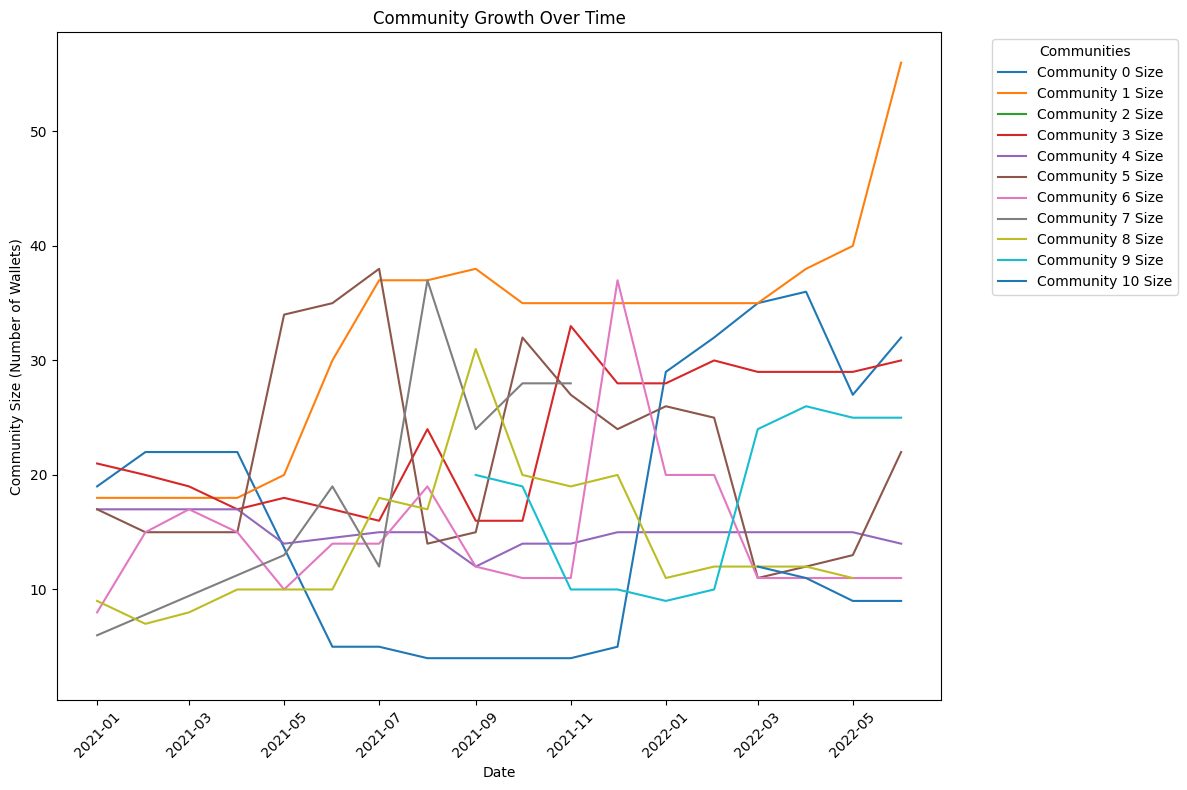

In [133]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def calculate_community_size_ratios(community_sizes, total_nodes):
    """Calculate the ratio of each community size to the total number of nodes."""
    community_ratios = {}
    for community, size in community_sizes.items():
        community_ratios[community] = (size / total_nodes) * 100  # Calculate ratio as a percentage
    return community_ratios

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots."""
    community_size_over_time = defaultdict(lambda: defaultdict(int))
    community_ratios_over_time = defaultdict(lambda: defaultdict(float))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community sizes for this snapshot
        community_sizes = calculate_community_sizes(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Calculate the community size ratios for this snapshot
        community_ratios = calculate_community_size_ratios(community_sizes, total_nodes)

        # Store the community sizes and ratios with respect to the snapshot date
        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  # Convert to datetime
        for community, size in community_sizes.items():
            community_size_over_time[community][snapshot_date] = size
        for community, ratio in community_ratios.items():
            community_ratios_over_time[community][snapshot_date] = ratio

    return community_size_over_time, community_ratios_over_time

def plot_community_growth_over_time(community_size_over_time, community_ratios_over_time):
    """Plot the community growth over time."""
    plt.figure(figsize=(12, 8))

    # Sort the community labels numerically to ensure order from 0 to 11
    sorted_communities = sorted(community_size_over_time.keys(), key=lambda x: int(x) if x.isdigit() else float('inf'))

    for community in sorted_communities:
        if community != 'Unknown':  # Exclude 'Unknown' communities from plotting
            sizes = community_size_over_time[community]
            dates = sorted(sizes.keys())  # Ensure dates are sorted
            sizes_over_time = [sizes[date] for date in dates]
            plt.plot(dates, sizes_over_time, label=f'Community {community} Size')

    plt.xlabel("Date")
    plt.ylabel("Community Size (Number of Wallets)")
    plt.title("Community Growth Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot community size ratios over time
    plt.figure(figsize=(12, 8))
    for community in sorted_communities:
        if community != 'Unknown':
            ratios = community_ratios_over_time[community]
            dates = sorted(ratios.keys())
            ratios_over_time = [ratios[date] for date in dates]
            plt.plot(dates, ratios_over_time, label=f'Community {community} Ratio')

    plt.xlabel("Date")
    plt.ylabel("Community Size Ratio (%)")
    plt.title("Community Size Ratios Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth over the entire period
community_size_over_time, community_ratios_over_time = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Plot the community growth and ratios over time
plot_community_growth_over_time(community_size_over_time, community_ratios_over_time)


In [ ]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def calculate_community_size_ratios(community_sizes, total_nodes):
    """Calculate the ratio of each community size to the total number of nodes."""
    community_ratios = {}
    for community, size in community_sizes.items():
        community_ratios[community] = (size / total_nodes) * 100  # Calculate ratio as a percentage
    return community_ratios

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots and store it in a table."""
    results = []

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community sizes for this snapshot
        community_sizes = calculate_community_sizes(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Calculate the community size ratios for this snapshot
        community_ratios = calculate_community_size_ratios(community_sizes, total_nodes)

        # Store the results in a structured format
        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  # Convert to datetime
        for community, size in community_sizes.items():
            results.append({
                'Snapshot Date': snapshot_date,
                'Community': community,
                'Size': size,
                'Total Nodes': total_nodes,
                'Ratio (%)': community_ratios[community]
            })

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth and size ratios over the entire period
results_df = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Display the DataFrame to the user using standard Python
print(results_df)

# Optionally save the DataFrame to a CSV file
# output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/community_size_ratios_over_time.csv'
# results_df.to_csv(output_file, index=False)


In [ ]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def calculate_community_size_ratios(community_sizes, total_nodes):
    """Calculate the ratio of each community size to the total number of nodes."""
    community_ratios = {}
    for community, size in community_sizes.items():
        community_ratios[community] = (size / total_nodes) * 100  # Calculate ratio as a percentage
    return community_ratios

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots and store it in a table."""
    results = []

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community sizes for this snapshot
        community_sizes = calculate_community_sizes(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Calculate the community size ratios for this snapshot
        community_ratios = calculate_community_size_ratios(community_sizes, total_nodes)

        # Store the results in a structured format
        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  # Convert to datetime
        for community, size in community_sizes.items():
            results.append({
                'Snapshot Date': snapshot_date,
                'Community': community,
                'Size': size,
                'Total Nodes': total_nodes,
                'Ratio (%)': community_ratios[community]
            })

    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

def calculate_average_ratio(results_df):
    """Calculate the average ratio of each community over the entire period."""
    # Group by 'Community' and calculate the mean of 'Ratio (%)'
    average_ratios = results_df.groupby('Community')['Ratio (%)'].mean().reset_index()
    average_ratios.rename(columns={'Ratio (%)': 'Average Ratio (%)'}, inplace=True)
    
    # Convert 'Community' to numeric and sort by it
    average_ratios['Community'] = pd.to_numeric(average_ratios['Community'], errors='coerce')
    average_ratios = average_ratios.sort_values(by='Community').reset_index(drop=True)
    
    return average_ratios

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth and size ratios over the entire period
results_df = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Calculate the average ratio for each community
average_ratios_df = calculate_average_ratio(results_df)

# Display the DataFrame to the user in order
print(average_ratios_df)

# Optionally save the DataFrame to a CSV file
# output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/community_average_ratios_over_time.csv'
# average_ratios_df.to_csv(output_file, index=False)


In [ ]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': set(), 'density': 0.0})

    # Collect the tokens for each community and calculate the size
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'].add(token)

    # Calculate density for each community
    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  # Density is zero for a single-node community

    return community_metrics

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, and density of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': set(), 'density': []})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community metrics for this snapshot
        community_metrics = calculate_community_metrics(G)

        # Store the metrics over time
        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['tokens'].update(metrics['tokens'])
            community_metrics_over_time[community]['density'].append(metrics['density'])

    return community_metrics_over_time

def calculate_average_metrics_and_list_tokens(community_metrics_over_time):
    """Calculate the average size, token diversity, density, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = sum(metrics['size']) / len(metrics['size'])
        avg_density = sum(metrics['density']) / len(metrics['density'])
        token_list = ', '.join(sorted(metrics['tokens']))  # List all unique tokens
        
        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Density': avg_density,
            'Tokens': token_list
        })

    return average_metrics

# Paths and snapshot dates
normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Track community metrics over the entire period
community_metrics_over_time = track_community_metrics_over_time(normal_graph_path, enriched_graph_path, community_file, token_map, snapshot_dates)

# Calculate average metrics and list all tokens for each community
average_metrics = calculate_average_metrics_and_list_tokens(community_metrics_over_time)

# Convert to DataFrame for analysis and export
average_metrics_df = pd.DataFrame(average_metrics)

# Save the DataFrame to a CSV file
#output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/average_community_metrics.csv'
#average_metrics_df.to_csv(output_file, index=False)

# Display the DataFrame
print(average_metrics_df)


In [ ]:
def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': set(), 'density': [], 'presence': 0})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community metrics for this snapshot
        community_metrics = calculate_community_metrics(G)

        # Store the metrics over time
        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['tokens'].update(metrics['tokens'])
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    return community_metrics_over_time


# Gini

In [ ]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import numpy as np

def gini_coefficient(x):
    """Calculate the Gini coefficient of a numpy array."""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x) ** 2 * np.mean(x))

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community metrics for this snapshot
        community_metrics = calculate_community_metrics(G)

        # Store the metrics over time
        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            for token in metrics['tokens']:
                community_metrics_over_time[community]['tokens'][token] += metrics['tokens'][token]
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    return community_metrics_over_time

def calculate_average_metrics_and_list_tokens(community_metrics_over_time):
    """Calculate the average size, token diversity, density, community age, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = sum(metrics['size']) / len(metrics['size'])
        avg_density = sum(metrics['density']) / len(metrics['density'])
        
        # Calculate the Gini coefficient for token concentration
        token_counts = np.array(list(metrics['tokens'].values()))
        gini = gini_coefficient(token_counts)
        
        token_list = ', '.join([f"{token} ({count})" for token, count in sorted(metrics['tokens'].items())])
        community_age = metrics['presence']  # The number of snapshots the community was present

        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Density': avg_density,
            'Tokens': token_list,
            'Gini Coefficient': gini,
            'Community Age': community_age  # Add community age to the metrics
        })

    return average_metrics

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    for node in normal_graph.nodes():
        token_address = enriched_graph.nodes[node].get('token_address', '').lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]
    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})

    # Collect the tokens for each community and calculate the size
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1

    # Calculate density for each community
    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  # Density is zero for a single-node community

    return community_metrics

# Paths and snapshot information
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Track community metrics over the entire period
community_metrics_over_time = track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

# Calculate average metrics, including community age, and list all tokens for each community
average_metrics = calculate_average_metrics_and_list_tokens(community_metrics_over_time)

# Convert to DataFrame for analysis
average_metrics_df = pd.DataFrame(average_metrics)

# Ensure the 'Community' column is treated as a numeric type, and sort the DataFrame by it
average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

# Display the DataFrame to confirm the correct calculation
print(average_metrics_df)

# Save the DataFrame to a CSV file if needed
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/average_community_metrics_with_gini.csv'
average_metrics_df.to_csv(output_file, index=False)


In [ ]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import numpy as np

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})
    total_tokens = defaultdict(int)

    # Collect the tokens for each community and calculate the size
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1
        total_tokens[token] += 1

    # Calculate density for each community
    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  # Density is zero for a single-node community

    return community_metrics, total_tokens

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0, 'size_ratio': []})
    total_tokens_over_time = defaultdict(int)
    total_tokens_held_all_snapshots = defaultdict(lambda: defaultdict(int))  # New dict to hold total tokens held

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community metrics for this snapshot
        community_metrics, total_tokens = calculate_community_metrics(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Store the metrics over time
        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['size_ratio'].append((metrics['size'] / total_nodes) * 100)  # Calculate size ratio
            for token, count in metrics['tokens'].items():
                community_metrics_over_time[community]['tokens'][token] += count
                total_tokens_over_time[token] += count
                total_tokens_held_all_snapshots[community][token] += count  # Track total tokens held throughout all snapshots
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    print("Total Tokens Over Time:", total_tokens_over_time)
    return community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots

def calculate_average_metrics_and_list_tokens(community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots):
    """Calculate the average size, size ratio, token diversity, density, community age, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = round(sum(metrics['size']) / len(metrics['size']), 4)
        avg_size_ratio = round(sum(metrics['size_ratio']) / len(metrics['size_ratio']), 4)  # Calculate average size ratio
        avg_density = round(sum(metrics['density']) / len(metrics['density']), 4)
        
        # Calculate token percentages within the community portfolio
        token_counts = sum(metrics['tokens'].values())  # Total tokens held by the community
        token_percentages = {token: (count / token_counts) * 100 
                             for token, count in metrics['tokens'].items()}
        sorted_tokens = sorted(token_percentages.items(), key=lambda x: x[1], reverse=True)
        token_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens])

        # Calculate token percentages as a percentage of the whole supply
        tokens_whole_supply_percent = {token: (metrics['tokens'][token] / total_tokens_over_time[token]) * 100
                                       for token in metrics['tokens']}
        sorted_tokens_whole_supply = sorted(tokens_whole_supply_percent.items(), key=lambda x: x[1], reverse=True)
        tokens_whole_supply_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens_whole_supply])
        
        community_age = metrics['presence']  # The number of snapshots the community was present

        # Calculate the total number of tokens held by the community over all snapshots
        total_tokens_held = ', '.join([f"{token} ({count})" for token, count in total_tokens_held_all_snapshots[community].items()])

        print(f"Community {community} - Tokens in Portfolio: {token_list}")
        print(f"Community {community} - Tokens as Percentage of Whole Supply: {tokens_whole_supply_list}")

        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Size Ratio (%)': avg_size_ratio,  # Include average size ratio
            'Average Density': avg_density,
            'Total Tokens Held Throughout All Snapshots': total_tokens_held,  # Total tokens held throughout all snapshots
            'Portfolio (%)': token_list,  # Tokens in portfolio as percentages
            'Tokens as a Percentage of Whole Supply': tokens_whole_supply_list  # Tokens as percentage of total supply
        })

    return average_metrics

# Paths and snapshot information
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()

# Track community metrics over the entire period
community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots = track_community_metrics_over_time(
    graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates
)

# Calculate average metrics, including community age, and list all tokens for each community
average_metrics = calculate_average_metrics_and_list_tokens(
    community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots
)

# Convert to DataFrame for analysis
average_metrics_df = pd.DataFrame(average_metrics)

# Ensure the 'Community' column is treated as a numeric type, and sort the DataFrame by it
average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

# Display the DataFrame to confirm the correct calculation
print(average_metrics_df)

# Save the DataFrame to a CSV file if needed
# output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/average_community_metrics_Final.csv'
# average_metrics_df.to_csv(output_file, index=False)


# Final table community structure

In [264]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import numpy as np

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})
    total_tokens = defaultdict(int)

    # Collect the tokens for each community and calculate the size
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1
        total_tokens[token] += 1

    # Calculate density for each community
    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  # Density is zero for a single-node community

    return community_metrics, total_tokens

def calculate_inter_community_density(graph):
    """Calculate the inter-community density."""
    total_edges = 0
    possible_edges = 0
    nodes_by_community = defaultdict(set)

    # Group nodes by community
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        nodes_by_community[community].add(node)

    # Calculate edges between different communities
    for comm1, nodes1 in nodes_by_community.items():
        for comm2, nodes2 in nodes_by_community.items():
            if comm1 != comm2:
                inter_edges = len([1 for u, v in graph.edges(nodes1) if v in nodes2])
                total_edges += inter_edges
                possible_edges += len(nodes1) * len(nodes2)

    # Calculate inter-community density
    inter_community_density = total_edges / possible_edges if possible_edges > 0 else 0
    return inter_community_density

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0, 'size_ratio': []})
    total_tokens_over_time = defaultdict(int)
    inter_community_density_over_time = []

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community metrics for this snapshot
        community_metrics, total_tokens = calculate_community_metrics(G)
        inter_community_density = calculate_inter_community_density(G)
        inter_community_density_over_time.append(inter_community_density)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Store the metrics over time
        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['size_ratio'].append((metrics['size'] / total_nodes) * 100)  # Calculate size ratio
            for token, count in metrics['tokens'].items():
                community_metrics_over_time[community]['tokens'][token] += count
                total_tokens_over_time[token] += count
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    return community_metrics_over_time, total_tokens_over_time, inter_community_density_over_time

def calculate_average_metrics_and_list_tokens(community_metrics_over_time, inter_community_density_over_time):
    """Calculate the average size, size ratio, density, community age, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = round(sum(metrics['size']) / len(metrics['size']), 4)
        avg_size_ratio = round(sum(metrics['size_ratio']) / len(metrics['size_ratio']), 4)
        avg_density = round(sum(metrics['density']) / len(metrics['density']), 4)
        avg_inter_community_density = round(np.mean(inter_community_density_over_time), 4)
        community_age = metrics['presence']

        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Size Ratio (%)': avg_size_ratio,
            'Average Density': avg_density,
            'Inter-community density': avg_inter_community_density,
            'Age': community_age
        })

    return average_metrics

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Track community metrics over the entire period
community_metrics_over_time, total_tokens_over_time, inter_community_density_over_time = track_community_metrics_over_time(
    graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates
)

# Calculate average metrics
average_metrics = calculate_average_metrics_and_list_tokens(community_metrics_over_time, inter_community_density_over_time)

# Convert to DataFrame for analysis
average_metrics_df = pd.DataFrame(average_metrics)

# Ensure the 'Community' column is treated as a numeric type, and sort the DataFrame by it
average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

# Display the DataFrame to confirm the correct calculation
print(average_metrics_df[['Community', 'Average Size', 'Average Size Ratio (%)', 'Average Density', 'Inter-community density', 'Age']])

# Save the DataFrame to a CSV file if needed
# output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/average_community_metrics_Final.csv'
# average_metrics_df.to_csv(output_file, index=False)


    Community  Average Size  Average Size Ratio (%)  Average Density  \
0           0       18.0588                 11.5567           0.7572   
1           1       32.1111                 19.9182           0.6134   
2           2        3.0000                  2.5424           1.0000   
3           3       23.3333                 14.8472           0.7116   
4           4       15.0588                  9.9371           0.9589   
5           5       21.6667                 14.2735           0.7300   
6           6       14.8333                  9.6632           0.7970   
7           7       20.8750                 13.1985           0.7191   
8           8       13.9412                  8.8543           0.8220   
9           9       17.8000                  9.7483           0.7037   
10         10       10.2500                  5.4585           1.0000   

    Inter-community density  Age  
0                    0.0103   17  
1                    0.0103   18  
2                    0.0103   

# Final table community token stat

In [135]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import numpy as np

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})
    total_tokens = defaultdict(int)

    # Collect the tokens for each community and calculate the size
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1
        total_tokens[token] += 1

    # Calculate density for each community
    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  # Density is zero for a single-node community

    return community_metrics, total_tokens

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0, 'size_ratio': []})
    total_tokens_over_time = defaultdict(int)
    total_tokens_held_all_snapshots = defaultdict(lambda: defaultdict(int))  # New dict to hold total tokens held

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community metrics for this snapshot
        community_metrics, total_tokens = calculate_community_metrics(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Store the metrics over time
        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['size_ratio'].append((metrics['size'] / total_nodes) * 100)  # Calculate size ratio
            for token, count in metrics['tokens'].items():
                community_metrics_over_time[community]['tokens'][token] += count
                total_tokens_over_time[token] += count
                total_tokens_held_all_snapshots[community][token] += count  # Track total tokens held throughout all snapshots
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    print("Total Tokens Over Time:", total_tokens_over_time)
    return community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots

def calculate_average_metrics_and_list_tokens(community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots):
    """Calculate the average size, size ratio, token diversity, density, community age, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = round(sum(metrics['size']) / len(metrics['size']), 4)
        avg_size_ratio = round(sum(metrics['size_ratio']) / len(metrics['size_ratio']), 4)  # Calculate average size ratio
        avg_density = round(sum(metrics['density']) / len(metrics['density']), 4)
        
        # Calculate token percentages within the community portfolio
        token_counts = sum(metrics['tokens'].values())  # Total tokens held by the community
        token_percentages = {token: (count / token_counts) * 100 
                             for token, count in metrics['tokens'].items()}
        sorted_tokens = sorted(token_percentages.items(), key=lambda x: x[1], reverse=True)
        token_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens])

        # Calculate token percentages as a percentage of the whole supply
        tokens_whole_supply_percent = {token: (metrics['tokens'][token] / total_tokens_over_time[token]) * 100
                                       for token in metrics['tokens']}
        sorted_tokens_whole_supply = sorted(tokens_whole_supply_percent.items(), key=lambda x: x[1], reverse=True)
        tokens_whole_supply_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens_whole_supply])
        
        community_age = metrics['presence']  # The number of snapshots the community was present

        # Calculate the total number of tokens held by the community over all snapshots
        total_tokens_held = ', '.join([f"{token} ({count})" for token, count in total_tokens_held_all_snapshots[community].items()])

        print(f"Community {community} - Tokens in Portfolio: {token_list}")
        print(f"Community {community} - Tokens as Percentage of Whole Supply: {tokens_whole_supply_list}")

        average_metrics.append({
            'Community': community,
            'Total Tokens Held Throughout All Snapshots': total_tokens_held,  # Total tokens held throughout all snapshots
            'Portfolio (%)': token_list,  # Tokens in portfolio as percentages
            'Tokens as a Percentage of Whole Supply': tokens_whole_supply_list  # Tokens as percentage of total supply
        })

    return average_metrics

# Paths and snapshot information
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Track community metrics over the entire period
community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots = track_community_metrics_over_time(
    graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates
)

# Calculate average metrics, including community age, and list all tokens for each community
average_metrics = calculate_average_metrics_and_list_tokens(
    community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots
)

# Convert to DataFrame for analysis
average_metrics_df = pd.DataFrame(average_metrics)

# Ensure the 'Community' column is treated as a numeric type, and sort the DataFrame by it
average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

# Filter to keep only the specified columns
filtered_df = average_metrics_df[['Community', 'Total Tokens Held Throughout All Snapshots', 'Portfolio (%)', 'Tokens as a Percentage of Whole Supply']]

# Display the filtered DataFrame
print(filtered_df)

# Save the filtered DataFrame to a CSV file if needed
# output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/filtered_community_metrics_Final.csv'
# filtered_df.to_csv(output_file, index=False)



Total Tokens Over Time: defaultdict(<class 'int'>, {'Maker': 275, 'Compound': 257, 'Sushi': 172, 'Yearn Finance': 254, 'Curve': 220, 'Aave': 168, 'Uniswap': 222, 'Balancer': 191, '1Inch': 164, 'Lido': 336, 'Instadapp': 208, 'Convex': 58, 'Bitdao': 172, 'Dydx': 137, 'Aura Finance': 10})
Community 3 - Tokens in Portfolio: Maker (65.476%), 1Inch (32.857%), Curve (1.190%), Compound (0.476%)
Community 3 - Tokens as Percentage of Whole Supply: Maker (100.000%), 1Inch (84.146%), Curve (2.273%), Compound (0.778%)
Community 5 - Tokens in Portfolio: Compound (65.128%), Dydx (16.667%), Yearn Finance (8.205%), Sushi (6.667%), Aave (2.051%), Curve (1.282%)
Community 5 - Tokens as Percentage of Whole Supply: Compound (98.833%), Dydx (47.445%), Sushi (15.116%), Yearn Finance (12.598%), Aave (4.762%), Curve (2.273%)
Community 0 - Tokens in Portfolio: Yearn Finance (50.163%), Aave (18.893%), Convex (16.287%), Sushi (10.423%), Curve (2.280%), Balancer (1.303%), Compound (0.326%), Bitdao (0.326%)
Communi

In [136]:
 import numpy as np

# Test Cases
test_case_1 = np.array([1, 1, 1, 1])  # Perfect equality
test_case_2 = np.array([0, 0, 0, 10])  # High inequality
test_case_3 = np.array([1, 2, 3, 4])  # Moderate inequality

# Calculate Gini coefficients
gini_1 = gini_coefficient(test_case_1)
gini_2 = gini_coefficient(test_case_2)
gini_3 = gini_coefficient(test_case_3)

print("Gini for test_case_1 (should be 0):", gini_1)
print("Gini for test_case_2 (should be close to 1):", gini_2)
print("Gini for test_case_3 (moderate inequality):", gini_3)


Gini for test_case_1 (should be 0): 0.0
Gini for test_case_2 (should be close to 1): 0.75
Gini for test_case_3 (moderate inequality): 0.25


# Inter vs Intra community density

In [137]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_intra_inter_density(graph):
    """Calculate the intra- and inter-community densities for the graph."""
    community_metrics = defaultdict(lambda: {'intra_density': 0.0, 'inter_density': 0.0})

    # Get communities and calculate intra-community density
    communities = set(nx.get_node_attributes(graph, 'community').values())
    for community in communities:
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            community_metrics[community]['intra_density'] = nx.density(subgraph)
        else:
            community_metrics[community]['intra_density'] = 0.0

    # Calculate inter-community density
    for community_1 in communities:
        inter_edges = 0
        total_possible_edges = 0
        community_1_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_1])
        for community_2 in communities:
            if community_1 != community_2:
                community_2_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_2])
                # Calculate actual inter-community edges
                inter_edges += len([1 for u, v in graph.edges() if (u in community_1_nodes and v in community_2_nodes) or (v in community_1_nodes and u in community_2_nodes)])
                # Calculate possible inter-community edges
                total_possible_edges += len(community_1_nodes) * len(community_2_nodes)

        if total_possible_edges > 0:
            community_metrics[community_1]['inter_density'] = inter_edges / total_possible_edges
        else:
            community_metrics[community_1]['inter_density'] = 0.0

    return community_metrics

def process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Process graphs over all snapshots and calculate densities."""
    all_community_metrics = {}

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate intra- and inter-community densities
        community_metrics = calculate_intra_inter_density(G)

        all_community_metrics[snapshot_id] = community_metrics

    return all_community_metrics

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Process graphs over all snapshots and calculate densities
all_community_metrics = process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

# Display results for intra- and inter-community densities
for snapshot_id, metrics in all_community_metrics.items():
    print(f"Snapshot ID: {snapshot_id}")
    for community, density_metrics in metrics.items():
        print(f"Community {community}: Intra-community density = {density_metrics['intra_density']:.4f}, Inter-community density = {density_metrics['inter_density']:.4f}")


Snapshot ID: 11659570
Community 8: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 4: Intra-community density = 1.0000, Inter-community density = 0.0146
Community 2: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 0: Intra-community density = 0.6140, Inter-community density = 0.0218
Community 3: Intra-community density = 1.0000, Inter-community density = 0.0083
Community 1: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 7: Intra-community density = 1.0000, Inter-community density = 0.0179
Community 5: Intra-community density = 1.0000, Inter-community density = 0.0064
Community 6: Intra-community density = 1.0000, Inter-community density = 0.0182
Snapshot ID: 11861210
Community 8: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 4: Intra-community density = 0.7132, Inter-community density = 0.0158
Community 0: Intra-community density = 0.5714, Inter-community density = 0.0

In [254]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_intra_inter_density(graph):
    """Calculate the intra- and inter-community densities for the graph."""
    community_metrics = defaultdict(lambda: {'intra_density': 0.0, 'inter_density': 0.0, 'intra_count': 0, 'inter_count': 0})

    # Get communities and calculate intra-community density
    communities = set(nx.get_node_attributes(graph, 'community').values())
    for community in communities:
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            community_metrics[community]['intra_density'] += nx.density(subgraph)
            community_metrics[community]['intra_count'] += 1

    # Calculate inter-community density
    for community_1 in communities:
        inter_edges = 0
        total_possible_edges = 0
        community_1_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_1])
        for community_2 in communities:
            if community_1 != community_2:
                community_2_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_2])
                # Calculate actual inter-community edges
                inter_edges += len([1 for u, v in graph.edges() if (u in community_1_nodes and v in community_2_nodes) or (v in community_1_nodes and u in community_2_nodes)])
                # Calculate possible inter-community edges
                total_possible_edges += len(community_1_nodes) * len(community_2_nodes)

        if total_possible_edges > 0:
            community_metrics[community_1]['inter_density'] += inter_edges / total_possible_edges
            community_metrics[community_1]['inter_count'] += 1

    return community_metrics

def process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Process graphs over all snapshots and calculate densities."""
    all_community_metrics = defaultdict(lambda: {'total_intra_density': 0.0, 'total_inter_density': 0.0, 'intra_count': 0, 'inter_count': 0})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate intra- and inter-community densities
        community_metrics = calculate_intra_inter_density(G)

        # Aggregate densities across all snapshots
        for community, metrics in community_metrics.items():
            all_community_metrics[community]['total_intra_density'] += metrics['intra_density']
            all_community_metrics[community]['intra_count'] += metrics['intra_count']
            all_community_metrics[community]['total_inter_density'] += metrics['inter_density']
            all_community_metrics[community]['inter_count'] += metrics['inter_count']

    # Calculate average densities for each community
    average_density_data = []
    for community, metrics in all_community_metrics.items():
        avg_intra_density = metrics['total_intra_density'] / metrics['intra_count'] if metrics['intra_count'] > 0 else 0
        avg_inter_density = metrics['total_inter_density'] / metrics['inter_count'] if metrics['inter_count'] > 0 else 0
        average_density_data.append({
            'Community': community,
            'Average Intra-Community Density': avg_intra_density,
            'Average Inter-Community Density': avg_inter_density
        })

    # Create a DataFrame for average densities comparison
    density_df = pd.DataFrame(average_density_data)

    # Sort the DataFrame by community number
    density_df['Community'] = pd.to_numeric(density_df['Community'])
    density_df = density_df.sort_values(by='Community').reset_index(drop=True)

    return all_community_metrics, density_df

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Process graphs over all snapshots and calculate densities
all_community_metrics, density_df = process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

# Display the DataFrame with average intra- and inter-community densities
print(density_df)

# Save the DataFrame to a CSV file in the correct order
#output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/average_density_comparison.csv'
#density_df.to_csv(output_file, index=False)


    Community  Average Intra-Community Density  \
0           0                         0.757178   
1           1                         0.613427   
2           2                         1.000000   
3           3                         0.711582   
4           4                         0.958910   
5           5                         0.730001   
6           6                         0.797041   
7           7                         0.719091   
8           8                         0.821956   
9           9                         0.703736   
10         10                         1.000000   

    Average Inter-Community Density  
0                          0.013362  
1                          0.001816  
2                          0.000000  
3                          0.009898  
4                          0.008504  
5                          0.011500  
6                          0.007837  
7                          0.018964  
8                          0.008848  
9                  

In [267]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_inter_community_density_per_community(graph):
    """
    Calculate inter-community density for each community in the graph based on the formula provided in the image.
    """
    inter_community_densities = {}

    # Get all communities from the graph
    communities = set(nx.get_node_attributes(graph, 'community').values())
    total_nodes = len(graph.nodes())

    # Calculate inter-community density for each community
    for community in communities:
        # Get nodes in the current community
        community_nodes = {node for node, data in graph.nodes(data=True) if data.get('community') == community}
        num_nodes_in_community = len(community_nodes)
        
        # Calculate external edges (edges from nodes in the community to nodes outside the community)
        external_edges = sum(1 for u, v in graph.edges() if (u in community_nodes and v not in community_nodes) or (v in community_nodes and u not in community_nodes))
        
        # Calculate possible external edges
        possible_external_edges = num_nodes_in_community * (total_nodes - num_nodes_in_community)

        # Calculate inter-community density for this community
        if possible_external_edges > 0:
            inter_density = external_edges / possible_external_edges
        else:
            inter_density = 0.0
        
        # Store the inter-community density
        inter_community_densities[community] = inter_density

    return inter_community_densities

def process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Process graphs over all snapshots and calculate densities."""
    all_community_metrics = {}

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate inter-community densities
        community_metrics = calculate_inter_community_density_per_community(G)

        all_community_metrics[snapshot_id] = community_metrics

    return all_community_metrics

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Process graphs over all snapshots and calculate densities
all_community_metrics = process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

# Print the inter-community density for each community across all snapshots
for snapshot_id, metrics in all_community_metrics.items():
    print(f"Snapshot ID: {snapshot_id}")
    for community, density in metrics.items():
        print(f"Community {community}: Inter-community density = {density:.4f}")


Snapshot ID: 11659570
Community 8: Inter-community density = 0.0000
Community 4: Inter-community density = 0.0146
Community 2: Inter-community density = 0.0000
Community 0: Inter-community density = 0.0218
Community 3: Inter-community density = 0.0083
Community 1: Inter-community density = 0.0000
Community 7: Inter-community density = 0.0179
Community 5: Inter-community density = 0.0064
Community 6: Inter-community density = 0.0182
Snapshot ID: 11861210
Community 8: Inter-community density = 0.0000
Community 4: Inter-community density = 0.0158
Community 0: Inter-community density = 0.0203
Community 3: Inter-community density = 0.0090
Community 1: Inter-community density = 0.0000
Community 5: Inter-community density = 0.0074
Community 6: Inter-community density = 0.0195
Snapshot ID: 12043054
Community 8: Inter-community density = 0.0000
Community 4: Inter-community density = 0.0261
Community 0: Inter-community density = 0.0377
Community 3: Inter-community density = 0.0071
Community 1: I

In [268]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_overall_inter_community_density(graph):
    """
    Calculate the overall inter-community density by summing densities for each pair of communities.
    """
    # Initialize the total inter-community density
    total_inter_community_density = 0.0

    # Get all communities from the graph
    communities = list(set(nx.get_node_attributes(graph, 'community').values()))
    total_nodes = len(graph.nodes())

    # Calculate inter-community density for each pair of communities
    for i in range(len(communities)):
        for j in range(i + 1, len(communities)):
            community_1 = communities[i]
            community_2 = communities[j]

            # Get nodes in each community
            community_1_nodes = {node for node, data in graph.nodes(data=True) if data.get('community') == community_1}
            community_2_nodes = {node for node, data in graph.nodes(data=True) if data.get('community') == community_2}

            # Calculate the number of edges between the two communities
            inter_edges = sum(1 for u, v in graph.edges() if (u in community_1_nodes and v in community_2_nodes) or (v in community_1_nodes and u in community_2_nodes))

            # Calculate possible edges between these two communities
            possible_edges = len(community_1_nodes) * len(community_2_nodes)

            # Calculate inter-community density for this pair
            if possible_edges > 0:
                pair_density = inter_edges / possible_edges
            else:
                pair_density = 0.0

            # Sum up the inter-community densities for all pairs
            total_inter_community_density += pair_density

    return total_inter_community_density

def process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Process graphs over all snapshots and calculate densities."""
    overall_densities = {}

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        # Apply token names
        apply_token_names(G, enriched_G, token_map)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate the overall inter-community density
        overall_density = calculate_overall_inter_community_density(G)

        overall_densities[snapshot_id] = overall_density

    return overall_densities

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Load the token information CSV
token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Process graphs over all snapshots and calculate densities
overall_densities = process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

# Print the overall inter-community density for each snapshot
for snapshot_id, density in overall_densities.items():
    print(f"Snapshot ID: {snapshot_id}: Overall Inter-Community Density = {density:.4f}")


Snapshot ID: 11659570: Overall Inter-Community Density = 0.3136
Snapshot ID: 11861210: Overall Inter-Community Density = 0.1908
Snapshot ID: 12043054: Overall Inter-Community Density = 0.2684
Snapshot ID: 12244515: Overall Inter-Community Density = 0.2583
Snapshot ID: 12438842: Overall Inter-Community Density = 0.3259
Snapshot ID: 12638919: Overall Inter-Community Density = 0.1663
Snapshot ID: 12831436: Overall Inter-Community Density = 0.2728
Snapshot ID: 13029639: Overall Inter-Community Density = 0.0344
Snapshot ID: 13230157: Overall Inter-Community Density = 0.0991
Snapshot ID: 13422506: Overall Inter-Community Density = 0.1372
Snapshot ID: 13620205: Overall Inter-Community Density = 0.1921
Snapshot ID: 13809597: Overall Inter-Community Density = 0.1994
Snapshot ID: 14009885: Overall Inter-Community Density = 0.3011
Snapshot ID: 14210564: Overall Inter-Community Density = 0.2553
Snapshot ID: 14391029: Overall Inter-Community Density = 0.3373
Snapshot ID: 14589816: Overall Inter-Com

# Stats

In [ ]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots."""
    community_size_over_time = defaultdict(lambda: defaultdict(int))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community sizes for this snapshot
        community_sizes = calculate_community_sizes(G)

        # Store the community sizes with respect to the snapshot date
        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  # Convert to datetime
        for community, size in community_sizes.items():
            community_size_over_time[community][snapshot_date] = size

    return community_size_over_time

def calculate_community_growth(community_size_over_time):
    """Calculate the growth of each community over the entire period."""
    community_growth = {}

    for community, sizes in community_size_over_time.items():
        sorted_dates = sorted(sizes.keys())
        initial_size = sizes[sorted_dates[0]]
        final_size = sizes[sorted_dates[-1]]
        growth = final_size - initial_size
        growth_percentage = (growth / initial_size) * 100 if initial_size > 0 else float('inf')
        community_growth[community] = {
            'Initial Size': initial_size,
            'Final Size': final_size,
            'Growth': growth,
            'Growth Percentage': growth_percentage
        }

    return community_growth

def print_community_growth_statistics(community_growth):
    """Print the growth statistics for each community."""
    print("Community Growth Statistics:")
    for community, stats in community_growth.items():
        print(f"\nCommunity {community}:")
        print(f"  Initial Size: {stats['Initial Size']}")
        print(f"  Final Size: {stats['Final Size']}")
        print(f"  Growth: {stats['Growth']}")
        print(f"  Growth Percentage: {stats['Growth Percentage']:.2f}%")

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track community growth over the entire period
community_size_over_time = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Calculate community growth statistics
community_growth = calculate_community_growth(community_size_over_time)

# Print the community growth statistics
print_community_growth_statistics(community_growth)


# Track node membership over time

In [140]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def track_node_membership_over_time(graph_directory, community_file, snapshot_dates):
    """Track each node's community membership across all snapshots."""
    node_communities_over_time = defaultdict(list)

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Apply saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Track community membership for each node
        for node, data in G.nodes(data=True):
            community = data.get('community', 'Unknown')
            node_communities_over_time[node].append(community)

    return node_communities_over_time

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Track node membership over time
node_communities_over_time = track_node_membership_over_time(graph_directory, community_file, snapshot_dates)

# Example output
for node, communities in list(node_communities_over_time.items())[:5]:
    print(f"Node: {node}, Communities over time: {communities}")


Node: 0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d, Communities over time: ['3', '3', '3', '3', '3', '3', '3', '3', '3', '3']
Node: 0xd6868b23905009d859cc232f7c008c13bc527702, Communities over time: ['3', '3', '3', '3', '3', '3', '3', '3']
Node: 0x2775b1c75658be0f640272ccb8c72ac986009e38, Communities over time: ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5']
Node: 0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7, Communities over time: ['5', '5', '5', '5']
Node: 0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10, Communities over time: ['3', '3', '3']


In [141]:
def calculate_community_stability(node_communities_over_time):
    """Calculate the stability of each community across snapshots."""
    stability_counts = defaultdict(int)
    transition_counts = defaultdict(int)

    for node, communities in node_communities_over_time.items():
        for i in range(len(communities) - 1):
            if communities[i] == communities[i + 1]:
                stability_counts[communities[i]] += 1
            else:
                transition_counts[(communities[i], communities[i + 1])] += 1

    return stability_counts, transition_counts

# Calculate community stability
stability_counts, transition_counts = calculate_community_stability(node_communities_over_time)

# Display stability results
print("Community Stability Counts:")
for community, count in stability_counts.items():
    print(f"Community {community}: {count} stable nodes")

print("\nCommunity Transition Counts:")
for (community_from, community_to), count in transition_counts.items():
    print(f"Transition from Community {community_from} to Community {community_to}: {count} nodes")


Community Stability Counts:
Community 3: 355 stable nodes
Community 5: 309 stable nodes
Community 0: 209 stable nodes
Community 7: 103 stable nodes
Community 6: 198 stable nodes
Community 10: 28 stable nodes
Community 4: 208 stable nodes
Community 9: 134 stable nodes
Community 8: 190 stable nodes
Community 1: 508 stable nodes

Community Transition Counts:
Transition from Community 0 to Community 7: 1 nodes
Transition from Community 7 to Community 6: 29 nodes
Transition from Community 6 to Community 10: 9 nodes
Transition from Community 10 to Community 0: 1 nodes
Transition from Community 0 to Community 5: 28 nodes
Transition from Community 5 to Community 7: 25 nodes
Transition from Community 3 to Community 0: 1 nodes
Transition from Community 6 to Community 0: 18 nodes
Transition from Community 7 to Community 4: 1 nodes
Transition from Community 4 to Community 0: 1 nodes
Transition from Community 6 to Community 7: 17 nodes
Transition from Community 7 to Community 9: 13 nodes
Transition

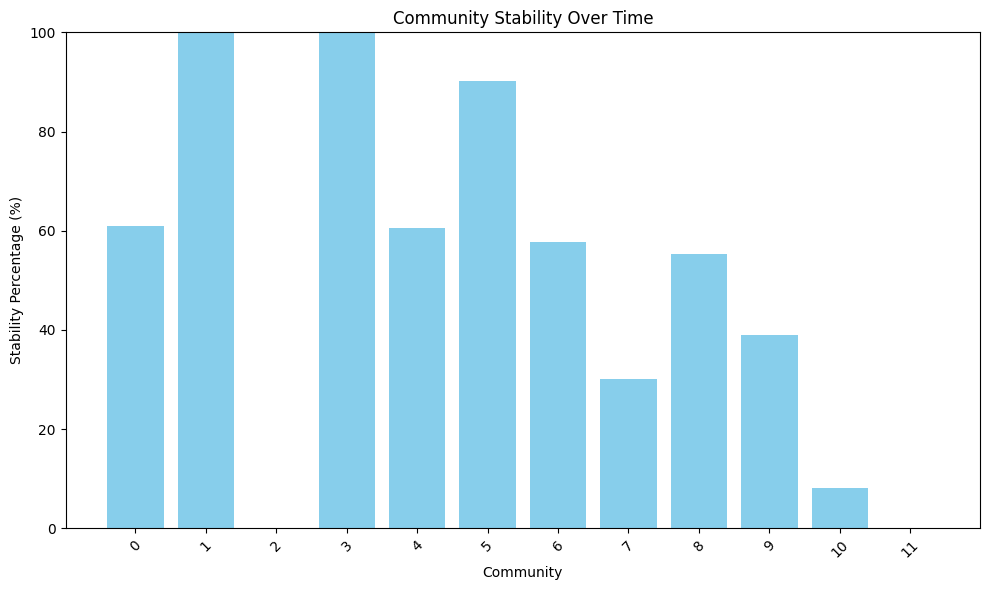

In [142]:
import matplotlib.pyplot as plt

def plot_community_stability(stability_counts, total_nodes):
    """Plot the stability of each community as a percentage of stable nodes, ensuring the x-axis goes from 0 to 11."""
    communities = list(range(12))  # Ensure communities from 0 to 11 are included
    stability_percentages = [(stability_counts.get(str(community), 0) / total_nodes) * 100 for community in communities]

    plt.figure(figsize=(10, 6))
    plt.bar(communities, stability_percentages, color='skyblue')
    plt.xlabel("Community")
    plt.ylabel("Stability Percentage (%)")
    plt.title("Community Stability Over Time")
    plt.xticks(communities, rotation=45)
    plt.ylim(0, 100)  # Assuming we want to show the percentage from 0% to 100%
    plt.tight_layout()
    plt.show()

# Assuming total_nodes is the number of unique nodes in the dataset
total_nodes = len(node_communities_over_time)

# Plot community stability
plot_community_stability(stability_counts, total_nodes)


In [143]:
def calculate_community_stability(node_communities_over_time, snapshot_dates):
    """Calculate the stability of each community across snapshots as a percentage."""
    stability_percentages = defaultdict(float)
    community_sizes = defaultdict(lambda: defaultdict(int))

    snapshots = list(snapshot_dates.values())

    # Initialize stability and community size trackers
    community_stability = defaultdict(lambda: defaultdict(int))  # community_stability[community][snapshot] = stable nodes
    total_nodes_in_community = defaultdict(lambda: defaultdict(int))  # total nodes per community per snapshot

    # Track node stability and community sizes over time
    for node, communities in node_communities_over_time.items():
        for i in range(len(communities) - 1):
            snapshot_current = snapshots[i]
            snapshot_next = snapshots[i + 1]
            current_community = communities[i]
            next_community = communities[i + 1]

            total_nodes_in_community[current_community][snapshot_current] += 1
            if current_community == next_community:
                community_stability[current_community][snapshot_current] += 1

    # Calculate stability percentages
    for community in community_stability.keys():
        for snapshot in community_stability[community].keys():
            if total_nodes_in_community[community][snapshot] > 0:
                stability_percentages[community] += (community_stability[community][snapshot] / total_nodes_in_community[community][snapshot])

    # Average stability percentage over all snapshots
    for community in stability_percentages.keys():
        stability_percentages[community] = (stability_percentages[community] / (len(snapshots) - 1)) * 100

    return stability_percentages

def plot_community_stability(stability_percentages):
    """Plot the stability of each community as a percentage of stable nodes."""
    communities = list(range(12))  # Ensure communities from 0 to 11 are included
    stability_values = [stability_percentages.get(str(community), 0) for community in communities]

    plt.figure(figsize=(10, 6))
    plt.bar(communities, stability_values, color='skyblue')
    plt.xlabel("Community")
    plt.ylabel("Average Stability Percentage (%)")
    plt.title("Average Community Stability Over Time")
    plt.xticks(communities, rotation=45)
    plt.ylim(0, 100)  # Correctly constrained to 0-100%
    plt.tight_layout()
    plt.show()

# Calculate community stability correctly
stability_percentages = calculate_community_stability(node_communities_over_time, snapshot_dates)

# Plot community stability
plot_community_stability(stability_percentages)


# Community evolution

In [144]:
import networkx as nx
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def visualize_communities(graph, snapshot_id, title=None):
    """Visualize the network with nodes color-coded by community."""
    pos = nx.spring_layout(graph, seed=42)  # Position nodes using a force-directed layout
    communities = set(nx.get_node_attributes(graph, 'community').values())
    community_colors = {community: plt.cm.get_cmap('tab10')(i) for i, community in enumerate(communities)}

    # Draw nodes, color-coded by community
    node_colors = [community_colors[data['community']] for node, data in graph.nodes(data=True)]
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=50, alpha=0.8)
    
    # Draw edges
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    
    # Add labels if desired
    if title:
        plt.title(title)
    
    plt.show()

# Example usage for a single snapshot
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_id = '11659570'  # Example snapshot ID

# Load the graph and apply community assignments
graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
G = nx.read_graphml(graph_file)
load_and_apply_saved_communities(G, community_file, snapshot_id)

# Visualize the network
visualize_communities(G, snapshot_id, title=f"Community Structure - Snapshot {snapshot_id}")


AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

In [145]:
def visualize_community_evolution(graph_directory, community_file, snapshot_dates):
    """Visualize community evolution over time."""
    for snapshot_id, snapshot_date in snapshot_dates.items():
        # Load the graph and apply community assignments
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)
        load_and_apply_saved_communities(G, community_file, snapshot_id)
        
        # Visualize the network for this snapshot
        title = f"Community Structure - {snapshot_date}"
        visualize_communities(G, snapshot_id, title=title)

# Example usage to visualize evolution across all snapshots
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

# Visualize community evolution across all snapshots
visualize_community_evolution(graph_directory, community_file, snapshot_dates)


AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

In [146]:
import networkx as nx
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def visualize_communities(graph, snapshot_id, community_colors, title=None):
    """Visualize the network with nodes color-coded by community."""
    pos = nx.spring_layout(graph, seed=42)  # Position nodes using a force-directed layout

    # Draw nodes, color-coded by community
    node_communities = nx.get_node_attributes(graph, 'community')
    node_colors = [community_colors.get(node_communities[node], '#808080') for node in graph.nodes()]
    
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=50, alpha=0.8)
    
    # Draw edges
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    
    # Add title
    if title:
        plt.title(title)
    
    # Sort communities for legend
    sorted_communities = sorted(set(node_communities.values()), key=lambda x: int(x))
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=community_colors[com], markersize=10) for com in sorted_communities]
    plt.legend(legend_handles, sorted_communities, title="Communities", loc="best", bbox_to_anchor=(1, 1))
    
    # Adjust layout to reduce empty space
    plt.tight_layout()
    plt.show()

def visualize_community_evolution(graph_directory, community_file, snapshot_dates, community_colors):
    """Visualize community evolution over time."""
    for snapshot_id, snapshot_date in snapshot_dates.items():
        # Load the graph and apply community assignments
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)
        load_and_apply_saved_communities(G, community_file, snapshot_id)
        
        # Visualize the network for this snapshot
        title = f"Community Structure - {snapshot_date}"
        visualize_communities(G, snapshot_id, community_colors, title=title)

# Example usage to visualize evolution across all snapshots
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Assign consistent colors for each community
# You can expand this colormap if you have more than 10 communities
communities = [str(i) for i in range(12)]  # Assuming up to 12 communities
community_colors = {community: plt.cm.get_cmap('tab10')(i) for i, community in enumerate(communities)}

# Visualize community evolution across all snapshots
visualize_community_evolution('/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs',
                              '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv',
                              snapshot_dates, community_colors)


AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

# Comparing communities accross time 

In [147]:
import pandas as pd
import networkx as nx
from collections import defaultdict
from os.path import join

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Convert community IDs to strings to ensure consistency
    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def track_community_membership_over_time(graph_directory, community_file, snapshot_dates):
    """Track community membership for each node across all snapshots."""
    node_communities_over_time = defaultdict(list)
    community_sizes_over_time = defaultdict(lambda: defaultdict(int))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)
        
        # Apply the saved community assignments
        load_and_apply_saved_communities(G, community_file, snapshot_id)

        for node, data in G.nodes(data=True):
            community = data.get('community', 'Unknown')  # Get the community assignment for each node
            node_communities_over_time[node].append((snapshot_id, community))
            community_sizes_over_time[snapshot_id][community] += 1

    return node_communities_over_time, community_sizes_over_time

# Example usage
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'

# Track community membership and sizes over time
node_communities_over_time, community_sizes_over_time = track_community_membership_over_time(graph_directory, community_file, snapshot_dates)



In [148]:
# Print out the community sizes over time for inspection
for snapshot_id, sizes in community_sizes_over_time.items():
    print(f"Snapshot {snapshot_id} ({snapshot_dates[snapshot_id]}):")
    total_nodes = sum(sizes.values())
    print(f"  Total nodes: {total_nodes}")
    for community, size in sizes.items():
        print(f"    Community {community}: {size} nodes")
    print("-" * 50)


Snapshot 11659570 (2021-01):
  Total nodes: 118
    Community 3: 21 nodes
    Community 5: 17 nodes
    Community 0: 19 nodes
    Community 6: 8 nodes
    Community 7: 6 nodes
    Community 4: 17 nodes
    Community 8: 9 nodes
    Community 2: 3 nodes
    Community 1: 18 nodes
--------------------------------------------------
Snapshot 11861210 (2021-02):
  Total nodes: 114
    Community 4: 17 nodes
    Community 5: 15 nodes
    Community 0: 22 nodes
    Community 3: 20 nodes
    Community 6: 15 nodes
    Community 1: 18 nodes
    Community 8: 7 nodes
--------------------------------------------------
Snapshot 12043054 (2021-03):
  Total nodes: 116
    Community 3: 19 nodes
    Community 4: 17 nodes
    Community 1: 18 nodes
    Community 0: 22 nodes
    Community 5: 15 nodes
    Community 6: 17 nodes
    Community 8: 8 nodes
--------------------------------------------------
Snapshot 12244515 (2021-04):
  Total nodes: 114
    Community 3: 17 nodes
    Community 0: 22 nodes
    Communi

In [149]:
# Print a summary of the community sizes over time
print("Summary of community_sizes_over_time:")
print(f"Total snapshots: {len(community_sizes_over_time)}")
for snapshot_id, sizes in community_sizes_over_time.items():
    print(f"Snapshot {snapshot_id} ({snapshot_dates[snapshot_id]}): {len(sizes)} communities")

# Print a detailed view of community sizes for each snapshot
for snapshot_id, sizes in community_sizes_over_time.items():
    print(f"\nSnapshot {snapshot_id} ({snapshot_dates[snapshot_id]}):")
    total_nodes = sum(sizes.values())
    print(f"  Total nodes: {total_nodes}")
    for community, size in sizes.items():
        print(f"    Community {community}: {size} nodes")
    print("-" * 50)


Summary of community_sizes_over_time:
Total snapshots: 18
Snapshot 11659570 (2021-01): 9 communities
Snapshot 11861210 (2021-02): 7 communities
Snapshot 12043054 (2021-03): 7 communities
Snapshot 12244515 (2021-04): 7 communities
Snapshot 12438842 (2021-05): 7 communities
Snapshot 12638919 (2021-06): 7 communities
Snapshot 12831436 (2021-07): 8 communities
Snapshot 13029639 (2021-08): 8 communities
Snapshot 13230157 (2021-09): 9 communities
Snapshot 13422506 (2021-10): 9 communities
Snapshot 13620205 (2021-11): 9 communities
Snapshot 13809597 (2021-12): 8 communities
Snapshot 14009885 (2022-01): 8 communities
Snapshot 14210564 (2022-02): 8 communities
Snapshot 14391029 (2022-03): 9 communities
Snapshot 14589816 (2022-04): 9 communities
Snapshot 14779829 (2022-05): 9 communities
Snapshot 14967365 (2022-06): 8 communities

Snapshot 11659570 (2021-01):
  Total nodes: 118
    Community 3: 21 nodes
    Community 5: 17 nodes
    Community 0: 19 nodes
    Community 6: 8 nodes
    Community 7:

In [150]:
# Check consistency across multiple snapshots
print("\nChecking consistency across snapshots:")
for snapshot_id in ['11659570', '11861210', '12043054']:  # 2021-06, 2021-07, 2021-08
    if snapshot_id in community_sizes_over_time:
        sizes = community_sizes_over_time[snapshot_id]
        total_nodes = sum(sizes.values())
        print(f"Snapshot {snapshot_id} ({snapshot_dates[snapshot_id]}): Total nodes = {total_nodes}")
        for community, size in sizes.items():
            print(f"    Community {community}: {size} nodes")
    else:
        print(f"Snapshot {snapshot_id} not found in community_sizes_over_time")
    print("-" * 50)



Checking consistency across snapshots:
Snapshot 11659570 (2021-01): Total nodes = 118
    Community 3: 21 nodes
    Community 5: 17 nodes
    Community 0: 19 nodes
    Community 6: 8 nodes
    Community 7: 6 nodes
    Community 4: 17 nodes
    Community 8: 9 nodes
    Community 2: 3 nodes
    Community 1: 18 nodes
--------------------------------------------------
Snapshot 11861210 (2021-02): Total nodes = 114
    Community 4: 17 nodes
    Community 5: 15 nodes
    Community 0: 22 nodes
    Community 3: 20 nodes
    Community 6: 15 nodes
    Community 1: 18 nodes
    Community 8: 7 nodes
--------------------------------------------------
Snapshot 12043054 (2021-03): Total nodes = 116
    Community 3: 19 nodes
    Community 4: 17 nodes
    Community 1: 18 nodes
    Community 0: 22 nodes
    Community 5: 15 nodes
    Community 6: 17 nodes
    Community 8: 8 nodes
--------------------------------------------------


# Alluvial map

In [151]:
import plotly.graph_objects as go
import pandas as pd

def prepare_alluvial_data(node_communities_over_time, snapshot_dates):
    """Prepare data for an alluvial plot showing community transitions over time."""
    snapshots = list(snapshot_dates.keys())
    communities = sorted({community for memberships in node_communities_over_time.values() for _, community in memberships}, key=int)

    # Initialize variables to hold source, target, and values (flows)
    source = []
    target = []
    value = []
    labels = []
    color_links = []
    node_map = {}
    current_index = 0

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)  # Ensure community is an integer
                if snap == end_snapshot:
                    end_community = int(comm)  # Ensure community is an integer
            if start_community is not None and end_community is not None:
                start_label = f"Comm {start_community} ({snapshot_dates[start_snapshot]})"
                end_label = f"Comm {end_community} ({snapshot_dates[end_snapshot]})"
                
                if start_label not in node_map:
                    node_map[start_label] = current_index
                    labels.append(start_label)
                    current_index += 1

                if end_label not in node_map:
                    node_map[end_label] = current_index
                    labels.append(end_label)
                    current_index += 1

                source.append(node_map[start_label])
                target.append(node_map[end_label])
                value.append(1)  # Each node is one flow unit

                # Use consistent colors for links based on the starting community
                color_links.append(f"rgba({(start_community * 37) % 256}, {(start_community * 97) % 256}, {(start_community * 157) % 256}, 0.7)")

    return source, target, value, labels, color_links

# Prepare data for the alluvial plot
source, target, value, labels, color_links = prepare_alluvial_data(node_communities_over_time, snapshot_dates)



ModuleNotFoundError: No module named 'plotly'

In [152]:
def plot_enhanced_alluvial(source, target, value, labels, color_links):
    """Plot an enhanced alluvial diagram showing community transitions over time with smoother flows."""
    fig = go.Figure(go.Sankey(
        arrangement='snap',  # Align nodes as tightly as possible
        node=dict(
            pad=15,
            thickness=15,
            line=dict(color="black", width=0.5),
            label=labels,
            color="rgba(31, 119, 180, 0.8)",  # Set a semi-transparent base color for nodes
            hovertemplate='%{label}<extra></extra>',
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=color_links,  # Apply the custom colors for each link
            hovertemplate='<b>Flow:</b> %{value}<br><b>From:</b> %{source.label}<br><b>To:</b> %{target.label}<extra></extra>',
        )
    ))

    fig.update_layout(
        title_text="Time Evolution of Community Structure",
        font_size=12,
        hovermode='x',
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=0, r=0, t=50, b=0)
    )

    fig.show()

# Example usage to plot the enhanced alluvial diagram
plot_enhanced_alluvial(source, target, value, labels, color_links)


NameError: name 'source' is not defined

In [153]:
import os
import networkx as nx
import pandas as pd
from os.path import join
import plotly.graph_objects as go

def prepare_alluvial_data(node_communities_over_time, snapshot_dates):
    """Prepare data for an alluvial plot showing community transitions over time."""
    snapshots = list(snapshot_dates.keys())
    communities = sorted({community for memberships in node_communities_over_time.values() for _, community in memberships}, key=int)

    # Initialize variables to hold source, target, and values (flows)
    source = []
    target = []
    value = []
    labels = []
    color_links = []
    node_map = {}
    current_index = 0

    # Maintain a consistent community mapping across snapshots
    community_mapping = {}  # Maps old community labels to new unique ones

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]

        # Prepare a mapping of current communities to unique identifiers
        community_mapping[start_snapshot] = {}
        community_mapping[end_snapshot] = {}

        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)  # Ensure community is an integer
                if snap == end_snapshot:
                    end_community = int(comm)  # Ensure community is an integer
            
            # Check and map community transitions
            if start_community is not None and end_community is not None:
                # Assign unique IDs to communities across snapshots
                if start_community not in community_mapping[start_snapshot]:
                    community_mapping[start_snapshot][start_community] = len(community_mapping[start_snapshot])
                if end_community not in community_mapping[end_snapshot]:
                    community_mapping[end_snapshot][end_community] = len(community_mapping[end_snapshot])

                # Create unique labels using the new mappings
                start_label = f"Comm {community_mapping[start_snapshot][start_community]} ({snapshot_dates[start_snapshot]})"
                end_label = f"Comm {community_mapping[end_snapshot][end_community]} ({snapshot_dates[end_snapshot]})"

                if start_label not in node_map:
                    node_map[start_label] = current_index
                    labels.append(start_label)
                    current_index += 1

                if end_label not in node_map:
                    node_map[end_label] = current_index
                    labels.append(end_label)
                    current_index += 1

                source.append(node_map[start_label])
                target.append(node_map[end_label])
                value.append(1)  # Each node is one flow unit

                # Use consistent colors for links based on the starting community
                color_links.append(f"rgba({(start_community * 37) % 256}, {(start_community * 97) % 256}, {(start_community * 157) % 256}, 0.7)")

    # Debugging: Print data mappings
    print("Data prepared for alluvial plot:")
    print("Labels:", labels)
    print("Node Map:", node_map)

    return source, target, value, labels, color_links

def plot_enhanced_alluvial(source, target, value, labels, color_links, snapshot_dates):
    """Plot an enhanced alluvial diagram showing community transitions over time with improved readability."""
    # Create a color list for the community legend
    community_colors = [
        f"rgba({(i * 37) % 256}, {(i * 97) % 256}, {(i * 157) % 256}, 0.7)" for i in range(12)
    ]
    
    # Create the figure
    fig = go.Figure(go.Sankey(
        arrangement='snap',  # Align nodes as tightly as possible
        node=dict(
            pad=15,
            thickness=15,
            line=dict(color="black", width=0.5),
            label=[""] * len(labels),  # Remove all labels for readability
            color="rgba(31, 119, 180, 0.8)",  # Set a semi-transparent base color for nodes
            hovertemplate='%{label}<extra></extra>',
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=color_links,  # Apply the custom colors for each link
            hovertemplate='<b>Flow:</b> %{value}<br><b>From:</b> %{source.label}<br><b>To:</b> %{target.label}<extra></extra>',
        )
    ))

    # Add a color-coded legend for the communities
    fig.update_layout(
        title_text="Time Evolution of Community Structure",
        font_size=12,
        hovermode='x',
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=0, r=0, t=50, b=0),
        showlegend=True,
        legend=dict(
            title="Communities",
            itemsizing="constant",
            traceorder="normal",
        )
    )

    # Add community legend
    for i in range(12):
        fig.add_trace(go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=community_colors[i]),
            legendgroup=f"Community {i}",
            showlegend=True,
            name=f"Community {i}"
        ))

    # Add x-axis with date labels
    fig.update_xaxes(
        title_text="Date",
        type="category",
        categoryorder="array",
        categoryarray=[snapshot_dates[key] for key in sorted(snapshot_dates.keys())]
    )

    fig.show()

# Example usage to plot the enhanced alluvial diagram
plot_enhanced_alluvial(source, target, value, labels, color_links, snapshot_dates)


ModuleNotFoundError: No module named 'plotly'

In [154]:
import plotly.graph_objects as go
import pandas as pd

def prepare_alluvial_data(node_communities_over_time, snapshot_dates):
    """Prepare data for an alluvial plot showing community transitions over time."""
    snapshots = list(snapshot_dates.keys())
    communities = sorted({community for memberships in node_communities_over_time.values() for _, community in memberships}, key=int)

    # Initialize variables to hold source, target, and values (flows)
    source = []
    target = []
    value = []
    labels = []
    color_links = []
    node_map = {}
    current_index = 0

    # Debugging: Print initial state
    print("Preparing data for alluvial plot...")
    
    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)  # Ensure community is an integer
                if snap == end_snapshot:
                    end_community = int(comm)  # Ensure community is an integer

            if start_community is not None and end_community is not None:
                # Make unique labels by combining community number with the snapshot date
                start_label = f"Comm {start_community} ({snapshot_dates[start_snapshot]})"
                end_label = f"Comm {end_community} ({snapshot_dates[end_snapshot]})"
                
                if start_label not in node_map:
                    node_map[start_label] = current_index
                    labels.append(start_label)
                    current_index += 1

                if end_label not in node_map:
                    node_map[end_label] = current_index
                    labels.append(end_label)
                    current_index += 1

                source.append(node_map[start_label])
                target.append(node_map[end_label])
                value.append(1)  # Each node is one flow unit

                # Use consistent colors for links based on the starting community
                color_links.append(f"rgba({(start_community * 37) % 256}, {(start_community * 97) % 256}, {(start_community * 157) % 256}, 0.7)")

    # Debugging: Print data mappings
    print("Data prepared for alluvial plot:")
    print("Labels:", labels)
    print("Node Map:", node_map)

    return source, target, value, labels, color_links

# Prepare data for the alluvial plot
source, target, value, labels, color_links = prepare_alluvial_data(node_communities_over_time, snapshot_dates)

def plot_enhanced_alluvial(source, target, value, labels, color_links, snapshot_dates):
    """Plot an enhanced alluvial diagram showing community transitions over time with improved readability."""
    # Create a color list for the community legend
    community_colors = [
        f"rgba({(i * 37) % 256}, {(i * 97) % 256}, {(i * 157) % 256}, 0.7)" for i in range(12)
    ]
    
    # Create the figure
    fig = go.Figure(go.Sankey(
        arrangement='snap',  # Align nodes as tightly as possible
        node=dict(
            pad=15,
            thickness=15,
            line=dict(color="black", width=0.5),
            label=[""] * len(labels),  # Remove all labels for readability
            color="rgba(31, 119, 180, 0.8)",  # Set a semi-transparent base color for nodes
            hovertemplate='%{label}<extra></extra>',
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=color_links,  # Apply the custom colors for each link
            hovertemplate='<b>Flow:</b> %{value}<br><b>From:</b> %{source.label}<br><b>To:</b> %{target.label}<extra></extra>',
        )
    ))

    # Add a color-coded legend for the communities
    fig.update_layout(
        title_text="Time Evolution of Community Structure",
        font_size=12,
        hovermode='x',
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=0, r=0, t=50, b=0),
        showlegend=True,
        legend=dict(
            title="Communities",
            itemsizing="constant",
            traceorder="normal",
        )
    )

    # Add community legend
    for i in range(12):
        fig.add_trace(go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=community_colors[i]),
            legendgroup=f"Community {i}",
            showlegend=True,
            name=f"Community {i}"
        ))

    # Add x-axis with date labels
    fig.update_xaxes(
        title_text="Date",
        type="category",
        categoryorder="array",
        categoryarray=[snapshot_dates[key] for key in sorted(snapshot_dates.keys())]
    )

    fig.show()

# Example usage to plot the enhanced alluvial diagram
plot_enhanced_alluvial(source, target, value, labels, color_links, snapshot_dates)


ModuleNotFoundError: No module named 'plotly'

In [155]:
import plotly.graph_objects as go
import pandas as pd

def prepare_alluvial_data(node_communities_over_time, snapshot_dates):
    """Prepare data for an alluvial plot showing community transitions over time."""
    snapshots = list(snapshot_dates.keys())
    communities = sorted({community for memberships in node_communities_over_time.values() for _, community in memberships}, key=int)

    # Initialize variables to hold source, target, and values (flows)
    source = []
    target = []
    value = []
    labels = []
    color_links = []
    node_map = {}
    current_index = 0

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)  # Ensure community is an integer
                if snap == end_snapshot:
                    end_community = int(comm)  # Ensure community is an integer
            if start_community is not None and end_community is not None:
                start_label = f"Comm {start_community} ({snapshot_dates[start_snapshot]})"
                end_label = f"Comm {end_community} ({snapshot_dates[end_snapshot]})"
                
                if start_label not in node_map:
                    node_map[start_label] = current_index
                    labels.append(start_label)
                    current_index += 1

                if end_label not in node_map:
                    node_map[end_label] = current_index
                    labels.append(end_label)
                    current_index += 1

                source.append(node_map[start_label])
                target.append(node_map[end_label])
                value.append(1)  # Each node is one flow unit

                # Use consistent colors for links based on the starting community
                color_links.append(f"rgba({(start_community * 37) % 256}, {(start_community * 97) % 256}, {(start_community * 157) % 256}, 0.7)")

    return source, target, value, labels, color_links

# Prepare data for the alluvial plot
source, target, value, labels, color_links = prepare_alluvial_data(node_communities_over_time, snapshot_dates)

def plot_enhanced_alluvial(source, target, value, labels, color_links, snapshot_dates):
    """Plot an enhanced alluvial diagram showing community transitions over time with improved readability."""
    # Create a color list for the community legend
    community_colors = [
        f"rgba({(i * 37) % 256}, {(i * 97) % 256}, {(i * 157) % 256}, 0.7)" for i in range(12)
    ]
    
    # Create the figure
    fig = go.Figure(go.Sankey(
        arrangement='snap',  # Align nodes as tightly as possible
        node=dict(
            pad=15,
            thickness=15,
            line=dict(color="black", width=0.5),
            label=[""] * len(labels),  # Remove all labels for readability
            color="rgba(31, 119, 180, 0.8)",  # Set a semi-transparent base color for nodes
            hovertemplate='%{label}<extra></extra>',
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=color_links,  # Apply the custom colors for each link
            hovertemplate='<b>Flow:</b> %{value}<br><b>From:</b> %{source.label}<br><b>To:</b> %{target.label}<extra></extra>',
        )
    ))

    # Add a color-coded legend for the communities
    fig.update_layout(
        title_text="Time Evolution of Community Structure",
        font_size=12,
        hovermode='x',
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=0, r=0, t=50, b=0),
        showlegend=True,
        legend=dict(
            title="Communities",
            itemsizing="constant",
            traceorder="normal",
        )
    )

    # Add community legend
    for i in range(12):
        fig.add_trace(go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=community_colors[i]),
            legendgroup=f"Community {i}",
            showlegend=True,
            name=f"Community {i}"
        ))

    # Add x-axis with date labels
    fig.update_xaxes(
        title_text="Date",
        type="category",
        categoryorder="array",
        categoryarray=[snapshot_dates[key] for key in sorted(snapshot_dates.keys())]
    )

    fig.show()

# Example usage to plot the enhanced alluvial diagram
plot_enhanced_alluvial(source, target, value, labels, color_links, snapshot_dates)



ModuleNotFoundError: No module named 'plotly'

In [156]:
# Persistence

# This

In [157]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next, along with nodes added and left."""
    flow_counts = defaultdict(int)
    nodes_left = 0
    nodes_added = 0
    
    current_snapshot_nodes = {}
    next_snapshot_nodes = {}

    # Organize nodes by community for both snapshots
    for node, memberships in node_communities_over_time.items():
        for snap, comm in memberships:
            if snap == snapshot_id:
                current_snapshot_nodes[node] = int(comm)
            elif snap == next_snapshot_id:
                next_snapshot_nodes[node] = int(comm)
    
    # Identify flows and nodes that left
    for node, start_community in current_snapshot_nodes.items():
        end_community = next_snapshot_nodes.get(node)
        if end_community is not None:
            flow_counts[(start_community, end_community)] += 1
        else:
            nodes_left += 1  # Node was present in the current snapshot but not in the next

    # Identify new nodes that joined a community in the next snapshot
    for node, end_community in next_snapshot_nodes.items():
        if node not in current_snapshot_nodes:
            nodes_added += 1  # Node was not present in the current snapshot but appeared in the next

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows, nodes_left, nodes_added, len(current_snapshot_nodes), len(next_snapshot_nodes)

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    """Calculate and display flows and percentages for each pair of consecutive snapshots, along with nodes added and left."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        flow_counts, total_flows, nodes_left, nodes_added, num_current_nodes, num_next_nodes = calculate_flows_for_snapshot(
            node_communities_over_time, snapshot_id, next_snapshot_id
        )
        flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

        print(f"\nSnapshot {snapshot_id} to {next_snapshot_id}:")
        print(f"Total Flows: {total_flows}")
        print(f"Nodes Added: {nodes_added}, Nodes Left: {nodes_left}")
        print(f"Number of Nodes in Current Snapshot: {num_current_nodes}, Number of Nodes in Next Snapshot: {num_next_nodes}")
        print(f"Sum of Nodes Accounted For: {total_flows + nodes_left + nodes_added}")
        print(f"Expected Total Nodes in Next Snapshot: {num_next_nodes}")

        print("\nFlow Counts between Communities:")
        for (start, end), count in flow_counts.items():
            print(f"Community {start} -> Community {end}: {count} flows")

        print("\nPercentage of Each Flow:")
        for (start, end), percentage in flow_percentages.items():
            print(f"Community {start} -> Community {end}: {percentage:.2f}%")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and display flows for all snapshot pairs
calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)



Snapshot 11659570 to 11861210:
Total Flows: 105
Nodes Added: 9, Nodes Left: 13
Number of Nodes in Current Snapshot: 118, Number of Nodes in Next Snapshot: 114
Sum of Nodes Accounted For: 127
Expected Total Nodes in Next Snapshot: 114

Flow Counts between Communities:
Community 3 -> Community 3: 19 flows
Community 5 -> Community 5: 15 flows
Community 0 -> Community 0: 16 flows
Community 6 -> Community 6: 8 flows
Community 7 -> Community 6: 4 flows
Community 4 -> Community 4: 14 flows
Community 8 -> Community 8: 7 flows
Community 2 -> Community 4: 3 flows
Community 1 -> Community 1: 18 flows
Community 0 -> Community 6: 1 flows

Percentage of Each Flow:
Community 3 -> Community 3: 18.10%
Community 5 -> Community 5: 14.29%
Community 0 -> Community 0: 15.24%
Community 6 -> Community 6: 7.62%
Community 7 -> Community 6: 3.81%
Community 4 -> Community 4: 13.33%
Community 8 -> Community 8: 6.67%
Community 2 -> Community 4: 2.86%
Community 1 -> Community 1: 17.14%
Community 0 -> Community 6: 0

In [158]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next, along with nodes added and left."""
    flow_counts = defaultdict(int)
    nodes_left = 0
    nodes_added = 0
    
    current_snapshot_nodes = {}
    next_snapshot_nodes = {}

    # Organize nodes by community for both snapshots
    for node, memberships in node_communities_over_time.items():
        for snap, comm in memberships:
            if snap == snapshot_id:
                current_snapshot_nodes[node] = int(comm)
            elif snap == next_snapshot_id:
                next_snapshot_nodes[node] = int(comm)
    
    # Identify flows and nodes that left
    for node, start_community in current_snapshot_nodes.items():
        end_community = next_snapshot_nodes.get(node)
        if end_community is not None:
            flow_counts[(start_community, end_community)] += 1
        else:
            nodes_left += 1  # Node was present in the current snapshot but not in the next

    # Identify new nodes that joined a community in the next snapshot
    for node, end_community in next_snapshot_nodes.items():
        if node not in current_snapshot_nodes:
            nodes_added += 1  # Node was not present in the current snapshot but appeared in the next

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows, nodes_left, nodes_added

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_summarize_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    """Calculate and summarize flows, nodes added, and nodes left across all snapshots."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    total_flows_summary = 0
    total_nodes_added_summary = 0
    total_nodes_left_summary = 0

    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        flow_counts, total_flows, nodes_left, nodes_added = calculate_flows_for_snapshot(
            node_communities_over_time, snapshot_id, next_snapshot_id
        )

        # Aggregate the totals
        total_flows_summary += total_flows
        total_nodes_added_summary += nodes_added
        total_nodes_left_summary += nodes_left

    # Print the summary
    print(f"Total Flows Across All Snapshots: {total_flows_summary}")
    print(f"Total Nodes Added Across All Snapshots: {total_nodes_added_summary}")
    print(f"Total Nodes Left Across All Snapshots: {total_nodes_left_summary}")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and summarize flows, nodes added, and nodes left across all snapshot pairs
calculate_and_summarize_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)


Total Flows Across All Snapshots: 2458
Total Nodes Added Across All Snapshots: 268
Total Nodes Left Across All Snapshots: 187


In [159]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next, along with nodes added and left."""
    flow_counts = defaultdict(int)
    same_community_flows = 0
    different_community_flows = 0
    nodes_left = 0
    nodes_added = 0
    
    current_snapshot_nodes = {}
    next_snapshot_nodes = {}

    # Organize nodes by community for both snapshots
    for node, memberships in node_communities_over_time.items():
        for snap, comm in memberships:
            if snap == snapshot_id:
                current_snapshot_nodes[node] = int(comm)
            elif snap == next_snapshot_id:
                next_snapshot_nodes[node] = int(comm)
    
    # Identify flows and nodes that left
    for node, start_community in current_snapshot_nodes.items():
        end_community = next_snapshot_nodes.get(node)
        if end_community is not None:
            flow_counts[(start_community, end_community)] += 1
            if start_community == end_community:
                same_community_flows += 1  # Node stayed in the same community
            else:
                different_community_flows += 1  # Node moved to a different community
        else:
            nodes_left += 1  # Node was present in the current snapshot but not in the next

    # Identify new nodes that joined a community in the next snapshot
    for node, end_community in next_snapshot_nodes.items():
        if node not in current_snapshot_nodes:
            nodes_added += 1  # Node was not present in the current snapshot but appeared in the next

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows, nodes_left, nodes_added, same_community_flows, different_community_flows

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_summarize_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    """Calculate and summarize flows, nodes added, and nodes left across all snapshots."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    total_flows_summary = 0
    total_nodes_added_summary = 0
    total_nodes_left_summary = 0
    total_same_community_flows = 0
    total_different_community_flows = 0

    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        flow_counts, total_flows, nodes_left, nodes_added, same_community_flows, different_community_flows = calculate_flows_for_snapshot(
            node_communities_over_time, snapshot_id, next_snapshot_id
        )

        # Aggregate the totals
        total_flows_summary += total_flows
        total_nodes_added_summary += nodes_added
        total_nodes_left_summary += nodes_left
        total_same_community_flows += same_community_flows
        total_different_community_flows += different_community_flows

    # Calculate percentages
    same_community_percentage = (total_same_community_flows / total_flows_summary) * 100 if total_flows_summary > 0 else 0
    different_community_percentage = (total_different_community_flows / total_flows_summary) * 100 if total_flows_summary > 0 else 0

    # Print the summary
    print(f"Total Flows Across All Snapshots: {total_flows_summary}")
    print(f"Total Nodes Added Across All Snapshots: {total_nodes_added_summary}")
    print(f"Total Nodes Left Across All Snapshots: {total_nodes_left_summary}")
    print(f"Total Same Community Flows: {total_same_community_flows} ({same_community_percentage:.2f}%)")
    print(f"Total Different Community Flows: {total_different_community_flows} ({different_community_percentage:.2f}%)")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and summarize flows, nodes added, and nodes left across all snapshot pairs
calculate_and_summarize_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)


Total Flows Across All Snapshots: 2458
Total Nodes Added Across All Snapshots: 268
Total Nodes Left Across All Snapshots: 187
Total Same Community Flows: 2221 (90.36%)
Total Different Community Flows: 237 (9.64%)


In [160]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next."""
    flow_counts = defaultdict(int)
    same_community_flows = 0
    different_community_flows = 0

    for node, memberships in node_communities_over_time.items():
        start_community = None
        end_community = None
        for snap, comm in memberships:
            if snap == snapshot_id:
                start_community = int(comm)
            if snap == next_snapshot_id:
                end_community = int(comm)
        if start_community is not None and end_community is not None:
            flow_counts[(start_community, end_community)] += 1
            if start_community == end_community:
                same_community_flows += 1
            else:
                different_community_flows += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows, same_community_flows, different_community_flows

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    """Calculate and display flows, percentages, and summaries for all snapshots."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    total_same_community_flows = 0
    total_different_community_flows = 0
    total_flows_across_snapshots = 0
    
    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        flow_counts, total_flows, same_community_flows, different_community_flows = calculate_flows_for_snapshot(
            node_communities_over_time, snapshot_id, next_snapshot_id
        )
        flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

        total_same_community_flows += same_community_flows
        total_different_community_flows += different_community_flows
        total_flows_across_snapshots += total_flows

        print(f"\nTotal Flows between {snapshot_dates[snapshot_id]} and {snapshot_dates[next_snapshot_id]}: {total_flows}")
        print("\nFlow Counts between Communities:")
        for (start, end), count in flow_counts.items():
            print(f"Community {start} -> Community {end}: {count} flows")

        print("\nPercentage of Each Flow:")
        for (start, end), percentage in flow_percentages.items():
            print(f"Community {start} -> Community {end}: {percentage:.2f}%")

    # Summary of total flows across all snapshots
    total_percentage_same = (total_same_community_flows / total_flows_across_snapshots) * 100
    total_percentage_different = (total_different_community_flows / total_flows_across_snapshots) * 100

    print(f"\nSummary of Flows Across All Snapshots:")
    print(f"Total Same Community Flows: {total_same_community_flows} ({total_percentage_same:.2f}%)")
    print(f"Total Different Community Flows: {total_different_community_flows} ({total_percentage_different:.2f}%)")
    print(f"Total Flows Across All Snapshots: {total_flows_across_snapshots}")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and display flows for all snapshot pairs
calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)



Total Flows between 2021-01 and 2021-02: 105

Flow Counts between Communities:
Community 3 -> Community 3: 19 flows
Community 5 -> Community 5: 15 flows
Community 0 -> Community 0: 16 flows
Community 6 -> Community 6: 8 flows
Community 7 -> Community 6: 4 flows
Community 4 -> Community 4: 14 flows
Community 8 -> Community 8: 7 flows
Community 2 -> Community 4: 3 flows
Community 1 -> Community 1: 18 flows
Community 0 -> Community 6: 1 flows

Percentage of Each Flow:
Community 3 -> Community 3: 18.10%
Community 5 -> Community 5: 14.29%
Community 0 -> Community 0: 15.24%
Community 6 -> Community 6: 7.62%
Community 7 -> Community 6: 3.81%
Community 4 -> Community 4: 13.33%
Community 8 -> Community 8: 6.67%
Community 2 -> Community 4: 2.86%
Community 1 -> Community 1: 17.14%
Community 0 -> Community 6: 0.95%

Total Flows between 2021-02 and 2021-03: 98

Flow Counts between Communities:
Community 3 -> Community 3: 17 flows
Community 5 -> Community 5: 15 flows
Community 0 -> Community 0: 18 

In [161]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next."""
    flow_counts = defaultdict(int)
    same_community_flows = 0
    different_community_flows = 0

    for node, memberships in node_communities_over_time.items():
        start_community = None
        end_community = None
        for snap, comm in memberships:
            if snap == snapshot_id:
                start_community = int(comm)
            if snap == next_snapshot_id:
                end_community = int(comm)
        if start_community is not None and end_community is not None:
            flow_counts[(start_community, end_community)] += 1
            if start_community == end_community:
                same_community_flows += 1
            else:
                different_community_flows += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows, same_community_flows, different_community_flows

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_node_changes(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the number of nodes added and nodes that left between snapshots."""
    current_snapshot_nodes = set()
    next_snapshot_nodes = set()

    for node, memberships in node_communities_over_time.items():
        for snap, _ in memberships:
            if snap == snapshot_id:
                current_snapshot_nodes.add(node)
            if snap == next_snapshot_id:
                next_snapshot_nodes.add(node)
    
    nodes_added = len(next_snapshot_nodes - current_snapshot_nodes)
    nodes_left = len(current_snapshot_nodes - next_snapshot_nodes)
    
    return nodes_added, nodes_left

def calculate_overall_summary(node_communities_over_time, snapshot_dates):
    """Calculate and display an overall summary of flows and node changes across all snapshots."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    total_same_community_flows = 0
    total_different_community_flows = 0
    total_flows_across_snapshots = 0
    total_nodes_added = 0
    total_nodes_left = 0
    
    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        # Calculate flows
        flow_counts, total_flows, same_community_flows, different_community_flows = calculate_flows_for_snapshot(
            node_communities_over_time, snapshot_id, next_snapshot_id
        )
        total_same_community_flows += same_community_flows
        total_different_community_flows += different_community_flows
        total_flows_across_snapshots += total_flows

        # Calculate node changes
        nodes_added, nodes_left = calculate_node_changes(node_communities_over_time, snapshot_id, next_snapshot_id)
        total_nodes_added += nodes_added
        total_nodes_left += nodes_left

    # Calculate percentages for same and different community flows
    total_percentage_same = (total_same_community_flows / total_flows_across_snapshots) * 100 if total_flows_across_snapshots > 0 else 0
    total_percentage_different = (total_different_community_flows / total_flows_across_snapshots) * 100 if total_flows_across_snapshots > 0 else 0

    # Overall Summary
    print(f"\nOverall Summary Across All Snapshots:")
    print(f"Total Flows: {total_flows_across_snapshots}")
    print(f"Total Nodes Added: {total_nodes_added}")
    print(f"Total Nodes Left: {total_nodes_left}")
    print(f"Total Same Community Flows: {total_same_community_flows} ({total_percentage_same:.2f}%)")
    print(f"Total Different Community Flows: {total_different_community_flows} ({total_percentage_different:.2f}%)")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and display the overall summary
calculate_overall_summary(node_communities_over_time, snapshot_dates)



Overall Summary Across All Snapshots:
Total Flows: 2458
Total Nodes Added: 268
Total Nodes Left: 187
Total Same Community Flows: 2221 (90.36%)
Total Different Community Flows: 237 (9.64%)


In [162]:
import pandas as pd
from collections import defaultdict

# Example node_communities_over_time and snapshot_dates from previous code (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Step 1: Calculate total flows between all communities
def calculate_total_flows(node_communities_over_time, snapshot_dates):
    flow_counts = defaultdict(int)

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)
            if start_community is not None and end_community is not None:
                flow_counts[(start_community, end_community)] += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows

# Step 2: Calculate the percentage of each flow
def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

# Example Usage:
flow_counts, total_flows = calculate_total_flows(node_communities_over_time, snapshot_dates)
flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

# Display the results
print("Total Flows:", total_flows)
print("\nFlow Counts between Communities:")
for (start, end), count in flow_counts.items():
    print(f"Community {start} -> Community {end}: {count} flows")

print("\nPercentage of Each Flow:")
for (start, end), percentage in flow_percentages.items():
    print(f"Community {start} -> Community {end}: {percentage:.2f}%")


Total Flows: 2458

Flow Counts between Communities:
Community 3 -> Community 3: 351 flows
Community 5 -> Community 5: 305 flows
Community 0 -> Community 0: 205 flows
Community 6 -> Community 6: 197 flows
Community 7 -> Community 6: 27 flows
Community 4 -> Community 4: 208 flows
Community 8 -> Community 8: 186 flows
Community 2 -> Community 4: 3 flows
Community 1 -> Community 1: 508 flows
Community 0 -> Community 6: 1 flows
Community 3 -> Community 0: 1 flows
Community 6 -> Community 0: 16 flows
Community 0 -> Community 5: 24 flows
Community 6 -> Community 7: 17 flows
Community 4 -> Community 3: 2 flows
Community 0 -> Community 4: 1 flows
Community 4 -> Community 7: 1 flows
Community 0 -> Community 3: 1 flows
Community 7 -> Community 7: 101 flows
Community 4 -> Community 6: 13 flows
Community 4 -> Community 5: 1 flows
Community 7 -> Community 8: 9 flows
Community 5 -> Community 7: 23 flows
Community 3 -> Community 7: 1 flows
Community 7 -> Community 9: 11 flows
Community 3 -> Community 

In [163]:
import pandas as pd
from collections import defaultdict

# Step 1: Calculate total flows between all communities and categorize them
def calculate_total_flows(node_communities_over_time, snapshot_dates):
    same_community_flow_counts = defaultdict(int)
    inter_community_flow_counts = defaultdict(int)

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)
            if start_community is not None and end_community is not None:
                if start_community == end_community:
                    same_community_flow_counts[(start_community, end_community)] += 1
                else:
                    inter_community_flow_counts[(start_community, end_community)] += 1

    total_same_community_flows = sum(same_community_flow_counts.values())
    total_inter_community_flows = sum(inter_community_flow_counts.values())
    total_flows = total_same_community_flows + total_inter_community_flows

    return same_community_flow_counts, inter_community_flow_counts, total_flows

# Step 2: Calculate the percentage of each flow
def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

# Example Usage:
same_community_flows, inter_community_flows, total_flows = calculate_total_flows(node_communities_over_time, snapshot_dates)

# Calculate percentages
same_community_percentages = calculate_flow_percentages(same_community_flows, total_flows)
inter_community_percentages = calculate_flow_percentages(inter_community_flows, total_flows)

# Display the results
print("Total Flows:", total_flows)

print("\nSame Community Flows:")
for (start, end), count in same_community_flows.items():
    print(f"Community {start} -> Community {end}: {count} flows")

print("\nPercentage of Same Community Flows:")
for (start, end), percentage in same_community_percentages.items():
    print(f"Community {start} -> Community {end}: {percentage:.2f}%")

print("\nInter-Community Flows:")
for (start, end), count in inter_community_flows.items():
    print(f"Community {start} -> Community {end}: {count} flows")

print("\nPercentage of Inter-Community Flows:")
for (start, end), percentage in inter_community_percentages.items():
    print(f"Community {start} -> Community {end}: {percentage:.2f}%")


Total Flows: 2458

Same Community Flows:
Community 3 -> Community 3: 351 flows
Community 5 -> Community 5: 305 flows
Community 0 -> Community 0: 205 flows
Community 6 -> Community 6: 197 flows
Community 4 -> Community 4: 208 flows
Community 8 -> Community 8: 186 flows
Community 1 -> Community 1: 508 flows
Community 7 -> Community 7: 101 flows
Community 9 -> Community 9: 133 flows
Community 10 -> Community 10: 27 flows

Percentage of Same Community Flows:
Community 3 -> Community 3: 14.28%
Community 5 -> Community 5: 12.41%
Community 0 -> Community 0: 8.34%
Community 6 -> Community 6: 8.01%
Community 4 -> Community 4: 8.46%
Community 8 -> Community 8: 7.57%
Community 1 -> Community 1: 20.67%
Community 7 -> Community 7: 4.11%
Community 9 -> Community 9: 5.41%
Community 10 -> Community 10: 1.10%

Inter-Community Flows:
Community 7 -> Community 6: 27 flows
Community 2 -> Community 4: 3 flows
Community 0 -> Community 6: 1 flows
Community 3 -> Community 0: 1 flows
Community 6 -> Community 0:

In [164]:
import pandas as pd
from collections import defaultdict

# Step 1: Calculate total flows between all communities and categorize them
def calculate_total_flows(node_communities_over_time, snapshot_dates):
    same_community_flow_counts = defaultdict(int)
    inter_community_flow_counts = defaultdict(int)

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)
            if start_community is not None and end_community is not None:
                if start_community == end_community:
                    same_community_flow_counts[(start_community, end_community)] += 1
                else:
                    inter_community_flow_counts[(start_community, end_community)] += 1

    total_same_community_flows = sum(same_community_flow_counts.values())
    total_inter_community_flows = sum(inter_community_flow_counts.values())
    total_flows = total_same_community_flows + total_inter_community_flows

    return same_community_flow_counts, inter_community_flow_counts, total_flows

# Step 2: Calculate the percentage of each flow
def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

# Example Usage:
same_community_flows, inter_community_flows, total_flows = calculate_total_flows(node_communities_over_time, snapshot_dates)

# Calculate percentages
same_community_percentages = calculate_flow_percentages(same_community_flows, total_flows)
inter_community_percentages = calculate_flow_percentages(inter_community_flows, total_flows)

# Sort the flow counts by magnitude (descending order)
sorted_same_community_flows = sorted(same_community_flows.items(), key=lambda x: x[1], reverse=True)
sorted_inter_community_flows = sorted(inter_community_flows.items(), key=lambda x: x[1], reverse=True)

# Display the results
print("Total Flows:", total_flows)

print("\nSame Community Flows (sorted by magnitude):")
for (start, end), count in sorted_same_community_flows:
    percentage = same_community_percentages[(start, end)]
    print(f"Community {start} -> Community {end}: {count} flows ({percentage:.2f}%)")

print("\nInter-Community Flows (sorted by magnitude):")
for (start, end), count in sorted_inter_community_flows:
    percentage = inter_community_percentages[(start, end)]
    print(f"Community {start} -> Community {end}: {count} flows ({percentage:.2f}%)")


Total Flows: 2458

Same Community Flows (sorted by magnitude):
Community 1 -> Community 1: 508 flows (20.67%)
Community 3 -> Community 3: 351 flows (14.28%)
Community 5 -> Community 5: 305 flows (12.41%)
Community 4 -> Community 4: 208 flows (8.46%)
Community 0 -> Community 0: 205 flows (8.34%)
Community 6 -> Community 6: 197 flows (8.01%)
Community 8 -> Community 8: 186 flows (7.57%)
Community 9 -> Community 9: 133 flows (5.41%)
Community 7 -> Community 7: 101 flows (4.11%)
Community 10 -> Community 10: 27 flows (1.10%)

Inter-Community Flows (sorted by magnitude):
Community 7 -> Community 6: 27 flows (1.10%)
Community 0 -> Community 5: 24 flows (0.98%)
Community 5 -> Community 7: 23 flows (0.94%)
Community 6 -> Community 7: 17 flows (0.69%)
Community 6 -> Community 0: 16 flows (0.65%)
Community 4 -> Community 6: 13 flows (0.53%)
Community 5 -> Community 9: 13 flows (0.53%)
Community 7 -> Community 9: 11 flows (0.45%)
Community 8 -> Community 5: 10 flows (0.41%)
Community 7 -> Communi

In [ ]:
import pandas as pd
from collections import defaultdict

# Step 1: Calculate total flows between all communities and categorize them
def calculate_total_flows(node_communities_over_time, snapshot_dates):
    same_community_flow_counts = defaultdict(int)
    inter_community_flow_counts = defaultdict(int)

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)
            if start_community is not None and end_community is not None:
                if start_community == end_community:
                    same_community_flow_counts[(start_community, end_community)] += 1
                else:
                    inter_community_flow_counts[(start_community, end_community)] += 1

    total_same_community_flows = sum(same_community_flow_counts.values())
    total_inter_community_flows = sum(inter_community_flow_counts.values())
    total_flows = total_same_community_flows + total_inter_community_flows

    return same_community_flow_counts, inter_community_flow_counts, total_flows

# Step 2: Calculate the percentage of each flow
def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

# Example Usage:
same_community_flows, inter_community_flows, total_flows = calculate_total_flows(node_communities_over_time, snapshot_dates)

# Calculate percentages
same_community_percentages = calculate_flow_percentages(same_community_flows, total_flows)
inter_community_percentages = calculate_flow_percentages(inter_community_flows, total_flows)

# Sort the flow counts by magnitude (descending order)
sorted_same_community_flows = sorted(same_community_flows.items(), key=lambda x: x[1], reverse=True)
sorted_inter_community_flows = sorted(inter_community_flows.items(), key=lambda x: x[1], reverse=True)

# Prepare data for saving
data = []

# Same Community Flows
for (start, end), count in sorted_same_community_flows:
    percentage = same_community_percentages[(start, end)]
    data.append({
        "Flow Type": "Same Community",
        "Start Community": start,
        "End Community": end,
        "Flow Count": count,
        "Percentage": percentage
    })

# Inter-Community Flows
for (start, end), count in sorted_inter_community_flows:
    percentage = inter_community_percentages[(start, end)]
    data.append({
        "Flow Type": "Inter-Community",
        "Start Community": start,
        "End Community": end,
        "Flow Count": count,
        "Percentage": percentage
    })

# Convert to DataFrame
df_flows = pd.DataFrame(data)

# Define the output path
#output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/flow_summary.csv'

# Save to CSV
#df_flows.to_csv(output_file, index=False)

#print(f"Flow summary saved to {output_file}")


# BEFORE YOU DO ANYTHING READ BELOW THIS IS GOOD

In [ ]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next."""
    flow_counts = defaultdict(int)
    stayed_counts = defaultdict(int)
    new_counts = defaultdict(int)
    
    current_snapshot_nodes = {}
    next_snapshot_nodes = {}

    # Organize nodes by community for both snapshots
    for node, memberships in node_communities_over_time.items():
        for snap, comm in memberships:
            if snap == snapshot_id:
                current_snapshot_nodes[node] = int(comm)
            elif snap == next_snapshot_id:
                next_snapshot_nodes[node] = int(comm)
    
    # Identify flows
    for node, start_community in current_snapshot_nodes.items():
        end_community = next_snapshot_nodes.get(node)
        if end_community is not None:
            flow_counts[(start_community, end_community)] += 1
            if start_community == end_community:
                stayed_counts[start_community] += 1

    # Identify new nodes that joined a community in the next snapshot
    for node, end_community in next_snapshot_nodes.items():
        if node not in current_snapshot_nodes:
            new_counts[end_community] += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, stayed_counts, new_counts, total_flows

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    """Calculate and display flows and percentages for each pair of consecutive snapshots."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        flow_counts, stayed_counts, new_counts, total_flows = calculate_flows_for_snapshot(
            node_communities_over_time, snapshot_id, next_snapshot_id
        )
        flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

        print(f"\nTotal Flows between {snapshot_dates[snapshot_id]} and {snapshot_dates[next_snapshot_id]}: {total_flows}")
        print("\nFlow Counts between Communities:")
        for (start, end), count in flow_counts.items():
            print(f"Community {start} -> Community {end}: {count} flows")

        print("\nPercentage of Each Flow:")
        for (start, end), percentage in flow_percentages.items():
            print(f"Community {start} -> Community {end}: {percentage:.2f}%")

        print("\nStayed in the Same Community:")
        for community, count in stayed_counts.items():
            print(f"Community {community}: {count} nodes stayed")

        print("\nNew Nodes in Each Community:")
        for community, count in new_counts.items():
            print(f"Community {community}: {count} new nodes")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and display flows for all snapshot pairs
calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)


In [ ]:
import pandas as pd
from collections import defaultdict

def calculate_total_flows_over_period(node_communities_over_time, snapshot_dates):
    """Calculate the total flow counts between communities over the entire period."""
    flow_counts = defaultdict(int)
    stayed_counts = defaultdict(int)
    new_counts = defaultdict(int)

    first_snapshot_nodes = {}
    last_snapshot_nodes = {}

    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    first_snapshot_id = sorted_snapshots[0]
    last_snapshot_id = sorted_snapshots[-1]

    # Organize nodes by community for the first and last snapshots
    for node, memberships in node_communities_over_time.items():
        for snap, comm in memberships:
            if snap == first_snapshot_id:
                first_snapshot_nodes[node] = int(comm)
            elif snap == last_snapshot_id:
                last_snapshot_nodes[node] = int(comm)
    
    # Identify flows over the entire period
    for node, start_community in first_snapshot_nodes.items():
        end_community = last_snapshot_nodes.get(node)
        if end_community is not None:
            flow_counts[(start_community, end_community)] += 1
            if start_community == end_community:
                stayed_counts[start_community] += 1

    # Identify new nodes that joined a community in the last snapshot
    for node, end_community in last_snapshot_nodes.items():
        if node not in first_snapshot_nodes:
            new_counts[end_community] += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, stayed_counts, new_counts, total_flows

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_display_total_flows(node_communities_over_time, snapshot_dates):
    """Calculate and display the total flows, stayed nodes, and new nodes over the entire period."""
    flow_counts, stayed_counts, new_counts, total_flows = calculate_total_flows_over_period(
        node_communities_over_time, snapshot_dates
    )
    flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

    print(f"\nTotal Flows over the entire period:")
    print("\nFlow Counts between Communities:")
    for (start, end), count in flow_counts.items():
        print(f"Community {start} -> Community {end}: {count} flows")

    print("\nPercentage of Each Flow:")
    for (start, end), percentage in flow_percentages.items():
        print(f"Community {start} -> Community {end}: {percentage:.2f}%")

    print("\nStayed in the Same Community:")
    for community, count in stayed_counts.items():
        print(f"Community {community}: {count} nodes stayed")

    print("\nNew Nodes in Each Community:")
    for community, count in new_counts.items():
        print(f"Community {community}: {count} new nodes")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and display total flows over the entire period
calculate_and_display_total_flows(node_communities_over_time, snapshot_dates)


In [ ]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next."""
    flow_counts = defaultdict(int)

    for node, memberships in node_communities_over_time.items():
        start_community = None
        end_community = None
        for snap, comm in memberships:
            if snap == snapshot_id:
                start_community = int(comm)
            if snap == next_snapshot_id:
                end_community = int(comm)
        if start_community is not None and end_community is not None:
            flow_counts[(start_community, end_community)] += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    """Calculate and display flows and percentages for each pair of consecutive snapshots."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        flow_counts, total_flows = calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id)
        flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

        print(f"\nTotal Flows between {snapshot_dates[snapshot_id]} and {snapshot_dates[next_snapshot_id]}: {total_flows}")
        print("\nFlow Counts between Communities:")
        for (start, end), count in flow_counts.items():
            print(f"Community {start} -> Community {end}: {count} flows")

        print("\nPercentage of Each Flow:")
        for (start, end), percentage in flow_percentages.items():
            print(f"Community {start} -> Community {end}: {percentage:.2f}%")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and display flows for all snapshot pairs
calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)


In [ ]:
import pandas as pd
from collections import defaultdict

def calculate_flows_for_snapshot(node_communities_over_time, snapshot_id, next_snapshot_id):
    """Calculate the flow counts between communities from one snapshot to the next, along with nodes added and left."""
    flow_counts = defaultdict(int)
    nodes_left = 0
    nodes_added = 0
    
    current_snapshot_nodes = {}
    next_snapshot_nodes = {}

    # Organize nodes by community for both snapshots
    for node, memberships in node_communities_over_time.items():
        for snap, comm in memberships:
            if snap == snapshot_id:
                current_snapshot_nodes[node] = int(comm)
            elif snap == next_snapshot_id:
                next_snapshot_nodes[node] = int(comm)
    
    # Identify flows
    for node, start_community in current_snapshot_nodes.items():
        end_community = next_snapshot_nodes.get(node)
        if end_community is not None:
            flow_counts[(start_community, end_community)] += 1
        else:
            nodes_left += 1  # Node was present in the current snapshot but not in the next

    # Identify new nodes that joined a community in the next snapshot
    for node, end_community in next_snapshot_nodes.items():
        if node not in current_snapshot_nodes:
            nodes_added += 1  # Node was not present in the current snapshot but appeared in the next

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows, nodes_left, nodes_added

def calculate_flow_percentages(flow_counts, total_flows):
    """Calculate the percentage of each flow relative to the total flows."""
    if total_flows == 0:
        return {key: 0 for key in flow_counts}  # Avoid division by zero
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    """Calculate and display flows and percentages for each pair of consecutive snapshots, along with nodes added and left."""
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])
    
    for i in range(len(sorted_snapshots) - 1):
        snapshot_id = sorted_snapshots[i]
        next_snapshot_id = sorted_snapshots[i + 1]

        flow_counts, total_flows, nodes_left, nodes_added = calculate_flows_for_snapshot(
            node_communities_over_time, snapshot_id, next_snapshot_id
        )
        flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

        print(f"\nTotal Flows between {snapshot_dates[snapshot_id]} and {snapshot_dates[next_snapshot_id]}: {total_flows}")
        print(f"Nodes Added: {nodes_added}, Nodes Left: {nodes_left}")

        print("\nFlow Counts between Communities:")
        for (start, end), count in flow_counts.items():
            print(f"Community {start} -> Community {end}: {count} flows")

        print("\nPercentage of Each Flow:")
        for (start, end), percentage in flow_percentages.items():
            print(f"Community {start} -> Community {end}: {percentage:.2f}%")

# Example data and paths (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Call the function to calculate and display flows for all snapshot pairs
calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)


In [ ]:
import pandas as pd
from collections import defaultdict

# Example node_communities_over_time and snapshot_dates from previous code (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Step 1: Calculate total flows between all communities
def calculate_total_flows(node_communities_over_time, snapshot_dates):
    flow_counts = defaultdict(int)

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)
            if start_community is not None and end_community is not None:
                flow_counts[(start_community, end_community)] += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows

# Step 2: Calculate the percentage of each flow
def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

# Example Usage:
flow_counts, total_flows = calculate_total_flows(node_communities_over_time, snapshot_dates)
flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

# Display the results
print("Total Flows:", total_flows)
print("\nFlow Counts between Communities:")
for (start, end), count in flow_counts.items():
    print(f"Community {start} -> Community {end}: {count} flows")

print("\nPercentage of Each Flow:")
for (start, end), percentage in flow_percentages.items():
    print(f"Community {start} -> Community {end}: {percentage:.2f}%")


In [ ]:
import pandas as pd
from collections import defaultdict

def calculate_total_flows(node_communities_over_time, snapshot_dates):
    flow_counts = defaultdict(int)
    stayed_counts = defaultdict(int)
    new_counts = defaultdict(int)
    disappeared_counts = defaultdict(int)
    unclassified_counts = defaultdict(int)

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        current_snapshot_nodes = {}
        next_snapshot_nodes = {}

        # Organize nodes by community for both snapshots
        for node, memberships in node_communities_over_time.items():
            for snap, comm in memberships:
                if snap == start_snapshot:
                    current_snapshot_nodes[node] = int(comm) if pd.notna(comm) else "Unclassified"
                elif snap == end_snapshot:
                    next_snapshot_nodes[node] = int(comm) if pd.notna(comm) else "Unclassified"

        # Track node disappearance and unclassified nodes
        for node, start_community in current_snapshot_nodes.items():
            end_community = next_snapshot_nodes.get(node)
            if end_community is not None:
                flow_counts[(start_community, end_community)] += 1
                if start_community == end_community:
                    stayed_counts[start_community] += 1
            else:
                disappeared_counts[start_community] += 1

            if start_community == "Unclassified":
                unclassified_counts[start_community] += 1

        # Track new nodes that joined the network in the next snapshot
        for node, end_community in next_snapshot_nodes.items():
            if node not in current_snapshot_nodes:
                new_counts[end_community] += 1
                if end_community == "Unclassified":
                    unclassified_counts[end_community] += 1

    total_flows = sum(flow_counts.values())
    total_disappeared = sum(disappeared_counts.values())
    total_unclassified = sum(unclassified_counts.values())

    return flow_counts, stayed_counts, new_counts, disappeared_counts, unclassified_counts, total_flows, total_disappeared, total_unclassified

def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

def calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates):
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])

    flow_counts, stayed_counts, new_counts, disappeared_counts, unclassified_counts, total_flows, total_disappeared, total_unclassified = calculate_total_flows(
        node_communities_over_time, snapshot_dates
    )
    flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

    print(f"Total Flows: {total_flows}, Total Nodes Disappeared: {total_disappeared}, Total Unclassified Nodes: {total_unclassified}")
    print("\nFlow Counts between Communities:")
    for (start, end), count in flow_counts.items():
        print(f"Community {start} -> Community {end}: {count} flows")

    print("\nPercentage of Each Flow:")
    for (start, end), percentage in flow_percentages.items():
        print(f"Community {start} -> Community {end}: {percentage:.2f}%")

    print("\nStayed in the Same Community:")
    for community, count in stayed_counts.items():
        print(f"Community {community}: {count} nodes stayed")

    print("\nNew Nodes in Each Community:")
    for community, count in new_counts.items():
        print(f"Community {community}: {count} new nodes")

    print("\nNodes that Disappeared:")
    for community, count in disappeared_counts.items():
        print(f"Community {community}: {count} nodes disappeared")

    print("\nUnclassified Nodes:")
    for community, count in unclassified_counts.items():
        print(f"Community {community}: {count} unclassified nodes")

# Assuming node_communities_over_time and snapshot_dates are already defined
calculate_and_display_flows_for_all_snapshots(node_communities_over_time, snapshot_dates)


# HERE

In [ ]:
import pandas as pd
from collections import defaultdict

# Example node_communities_over_time and snapshot_dates from previous code (these should already be defined in your environment)
# node_communities_over_time = {...}
# snapshot_dates = {...}

# Step 1: Calculate total flows between all communities and count new nodes
def calculate_total_flows(node_communities_over_time, snapshot_dates):
    flow_counts = defaultdict(int)
    new_node_count = 0
    all_nodes_in_first_snapshot = set()

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        nodes_in_current_snapshot = set()
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                    nodes_in_current_snapshot.add(node)
                if snap == end_snapshot:
                    end_community = int(comm)
            if start_community is not None and end_community is not None:
                flow_counts[(start_community, end_community)] += 1

        if i == 0:
            all_nodes_in_first_snapshot = nodes_in_current_snapshot
        else:
            new_nodes_in_this_snapshot = nodes_in_current_snapshot - all_nodes_in_first_snapshot
            new_node_count += len(new_nodes_in_this_snapshot)
            all_nodes_in_first_snapshot.update(nodes_in_current_snapshot)

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows, new_node_count

# Step 2: Calculate the percentage of each flow
def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

# Example Usage:
flow_counts, total_flows, new_node_count = calculate_total_flows(node_communities_over_time, snapshot_dates)
flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

# Display the results
print(f"Total Flows: {total_flows} (New Nodes: {new_node_count})")
print("\nFlow Counts between Communities:")
for (start, end), count in flow_counts.items():
    print(f"Community {start} -> Community {end}: {count} flows")

print("\nPercentage of Each Flow:")
for (start, end), percentage in flow_percentages.items():
    print(f"Community {start} -> Community {end}: {percentage:.2f}%")


In [ ]:
import pandas as pd
from collections import defaultdict

# Step 1: Calculate total flows between all communities
def calculate_total_flows(node_communities_over_time, snapshot_dates):
    flow_counts = defaultdict(int)

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)
            if start_community is not None and end_community is not None:
                flow_counts[(start_community, end_community)] += 1

    total_flows = sum(flow_counts.values())
    return flow_counts, total_flows

# Step 2: Calculate the percentage of each flow
def calculate_flow_percentages(flow_counts, total_flows):
    flow_percentages = {key: (count / total_flows) * 100 for key, count in flow_counts.items()}
    return flow_percentages

# Step 3: Convert flow data to a DataFrame and save as CSV
def save_flows_to_csv(flow_counts, flow_percentages, file_name="community_flows.csv"):
    data = []
    for (start, end), count in flow_counts.items():
        percentage = flow_percentages[(start, end)]
        data.append({
            'Start Community': start,
            'End Community': end,
            'Flow Count': count,
            'Flow Percentage': percentage
        })
    
    df = pd.DataFrame(data)
    df.to_csv(file_name, index=False)
    print(f"Flow data saved to {file_name}")

# Example Usage:
# Assuming node_communities_over_time and snapshot_dates are already defined
flow_counts, total_flows = calculate_total_flows(node_communities_over_time, snapshot_dates)
flow_percentages = calculate_flow_percentages(flow_counts, total_flows)

# Save the results to a CSV file
#save_flows_to_csv(flow_counts, flow_percentages, "community_flows.csv")


In [ ]:
from collections import defaultdict

def analyze_community_dynamics(node_communities_over_time, snapshot_dates):
    """Analyze the flow, persistence, and emergence of communities over time."""
    
    snapshots = list(snapshot_dates.keys())
    community_flow = defaultdict(lambda: defaultdict(int))
    persistent_communities = defaultdict(lambda: defaultdict(list))
    new_communities = defaultdict(list)
    community_appearance = defaultdict(set)

    # Iterate over the snapshots
    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]

        # Track the flow of wallets between communities
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = comm
                if snap == end_snapshot:
                    end_community = comm
            
            if start_community and end_community:
                community_flow[(start_snapshot, start_community)][(end_snapshot, end_community)] += 1
                community_appearance[start_community].add(start_snapshot)
                community_appearance[end_community].add(end_snapshot)

    # Identify persistent communities (appear in multiple snapshots with minimal transitions)
    for comm, snapshots_set in community_appearance.items():
        if len(snapshots_set) > 1:
            persistence_count = len(snapshots_set)
            persistent_communities[comm] = persistence_count
    
    # Identify new communities
    for end_snapshot, community in community_appearance.items():
        for comm in community:
            if comm not in community_appearance:
                new_communities[end_snapshot].append(comm)
    
    return community_flow, persistent_communities, new_communities

# Example usage to analyze the community dynamics
community_flow, persistent_communities, new_communities = analyze_community_dynamics(node_communities_over_time, snapshot_dates)

# Print results
print("Community Flow:")
for (start_snapshot, start_community), flows in community_flow.items():
    for (end_snapshot, end_community), count in flows.items():
        print(f"From {start_community} ({start_snapshot}) to {end_community} ({end_snapshot}): {count} wallets")

print("\nPersistent Communities:")
for community, persistence_count in persistent_communities.items():
    print(f"Community {community} persisted over {persistence_count} snapshots")

print("\nNew Communities:")
for snapshot, communities in new_communities.items():
    print(f"New communities in snapshot {snapshot}: {', '.join(map(str, communities))}")



In [ ]:
import pandas as pd
from collections import defaultdict

def calculate_overall_node_retention(node_communities_over_time, snapshot_dates):
    """Calculate the overall retention of nodes within the same community across the entire period."""
    community_retention_counts = defaultdict(lambda: defaultdict(int))
    community_total_counts = defaultdict(lambda: defaultdict(int))

    snapshots = list(snapshot_dates.keys())

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]

        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)

            if start_community is not None and end_community is not None:
                community_total_counts[start_community][start_snapshot] += 1
                if start_community == end_community:
                    community_retention_counts[start_community][start_snapshot] += 1

    # Calculate overall retention rates
    overall_retention_rates = {}
    all_communities = set()

    # Gather all communities that appeared in any snapshot
    for node, memberships in node_communities_over_time.items():
        for _, comm in memberships:
            all_communities.add(int(comm))

    # Calculate retention rates for all communities
    for community in all_communities:
        total_retained = sum(community_retention_counts[community].values())
        total_possible = sum(community_total_counts[community].values())
        if total_possible > 0:
            overall_retention_rates[community] = total_retained / total_possible
        else:
            overall_retention_rates[community] = 0.0  # Zero retention for communities with no nodes across snapshots

    return overall_retention_rates

# Example Usage:
overall_retention_rates = calculate_overall_node_retention(node_communities_over_time, snapshot_dates)

# Display the results
print("Overall Community Retention Rates:")
for community in sorted(overall_retention_rates.keys()):
    print(f"Community {community}: {overall_retention_rates[community]:.2%} retention over the entire period")


In [ ]:
import plotly.graph_objects as go
import pandas as pd

def prepare_alluvial_data(node_communities_over_time, snapshot_dates):
    """Prepare data for an alluvial plot showing community transitions over time."""
    snapshots = list(snapshot_dates.keys())
    communities = sorted({community for memberships in node_communities_over_time.values() for _, community in memberships}, key=int)

    # Initialize variables to hold source, target, and values (flows)
    source = []
    target = []
    value = []
    labels = []
    color_links = []
    node_map = {}
    current_index = 0

    for i in range(len(snapshots) - 1):
        start_snapshot = snapshots[i]
        end_snapshot = snapshots[i + 1]
        
        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None
            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)  # Ensure community is an integer
                if snap == end_snapshot:
                    end_community = int(comm)  # Ensure community is an integer
            if start_community is not None and end_community is not None:
                start_label = f"Comm {start_community} ({snapshot_dates[start_snapshot]})"
                end_label = f"Comm {end_community} ({snapshot_dates[end_snapshot]})"
                
                if start_label not in node_map:
                    node_map[start_label] = current_index
                    labels.append(start_label)
                    current_index += 1

                if end_label not in node_map:
                    node_map[end_label] = current_index
                    labels.append(end_label)
                    current_index += 1

                source.append(node_map[start_label])
                target.append(node_map[end_label])
                value.append(1)  # Each node is one flow unit

                # Use consistent colors for links based on the starting community
                color_links.append(f"rgba({(start_community * 37) % 256}, {(start_community * 97) % 256}, {(start_community * 157) % 256}, 0.7)")

    return source, target, value, labels, color_links

# Prepare data for the alluvial plot
source, target, value, labels, color_links = prepare_alluvial_data(node_communities_over_time, snapshot_dates)

def plot_enhanced_alluvial(source, target, value, labels, color_links):
    """Plot an enhanced alluvial diagram showing community transitions over time with smoother flows."""
    fig = go.Figure(go.Sankey(
        arrangement='snap',  # Align nodes as tightly as possible
        node=dict(
            pad=15,
            thickness=15,
            line=dict(color="black", width=0.5),
            label=labels,
            color="rgba(31, 119, 180, 0.8)",  # Set a semi-transparent base color for nodes
            hovertemplate='%{label}<extra></extra>',
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            color=color_links,  # Apply the custom colors for each link
            hovertemplate='<b>Flow:</b> %{value}<br><b>From:</b> %{source.label}<br><b>To:</b> %{target.label}<extra></extra>',
        )
    ))

    fig.update_layout(
        title_text="Time Evolution of Community Structure",
        font_size=12,
        hovermode='x',
        plot_bgcolor='white',
        paper_bgcolor='white',
        margin=dict(l=0, r=0, t=50, b=0)
    )

    fig.show()

# Example usage to plot the enhanced alluvial diagram
plot_enhanced_alluvial(source, target, value, labels, color_links)


In [ ]:
import pandas as pd
from collections import defaultdict

def calculate_magnitude_of_flows(node_communities_over_time, snapshot_dates):
    """Calculate the magnitude of flows between communities over time."""
    flow_data = defaultdict(lambda: defaultdict(int))  # flow_data[start_comm][end_comm] = count

    # Sort the snapshots by date
    sorted_snapshots = sorted(snapshot_dates.keys(), key=lambda x: snapshot_dates[x])

    # Analyze flows between consecutive snapshots
    for i in range(len(sorted_snapshots) - 1):
        start_snapshot = sorted_snapshots[i]
        end_snapshot = sorted_snapshots[i + 1]

        # Temporary storage for the current and next snapshot's communities
        current_communities = defaultdict(set)
        next_communities = defaultdict(set)

        for node, memberships in node_communities_over_time.items():
            start_community = None
            end_community = None

            for snap, comm in memberships:
                if snap == start_snapshot:
                    start_community = int(comm)
                if snap == end_snapshot:
                    end_community = int(comm)

            if start_community is not None and end_community is not None:
                current_communities[start_community].add(node)
                next_communities[end_community].add(node)

                # Record the flow between the communities
                flow_data[start_community][end_community] += 1

    return flow_data, sorted_snapshots

def format_flow_data_table(flow_data, sorted_snapshots):
    """Format the flow data into a table."""
    table_data = []

    for start_community, end_communities in flow_data.items():
        for end_community, count in end_communities.items():
            table_data.append({
                'Start Community': start_community,
                'End Community': end_community,
                'Flow Magnitude': count
            })

    return pd.DataFrame(table_data)

# Example Usage
# Assuming you have node_communities_over_time and snapshot_dates defined

flow_data, sorted_snapshots = calculate_magnitude_of_flows(node_communities_over_time, snapshot_dates)
flow_df = format_flow_data_table(flow_data, sorted_snapshots)

# Display the table
print(flow_df)
